## Import lib


In [1]:
# 기본 데이터 조작을 위한 라이브러리 불러오기
import pandas as pd  # 데이터프레임을 다루기 위한 Pandas 라이브러리
import numpy as np  # 배열 및 수치 연산을 위한 NumPy 라이브러리

# 이미지 처리를 위한 라이브러리 불러오기
from PIL import Image  # 이미지 처리를 위한 Python Imaging Library (PIL)
import matplotlib.pyplot as plt  # 그래프 및 이미지 시각화를 위한 Matplotlib 라이브러리

# 파일 경로 다루기 위한 라이브러리 불러오기
import time  # 시간 관련 작업을 위한 Time 라이브러리

# PyTorch 관련 라이브러리 불러오기
import torch  # 딥 러닝 프레임워크인 PyTorch
import torch.nn as nn  # 신경망 모델을 정의하기 위한 PyTorch 라이브러리
import torch.nn.functional as F  # 신경망 함수 및 연산을 위한 라이브러리
import torch.optim as optim  # 최적화 알고리즘을 위한 PyTorch 라이브러리
from torch.optim import lr_scheduler  # 학습률 스케줄러를 위한 PyTorch 라이브러리
from torchvision import models  # 사전 훈련된 모델 아키텍처를 포함하는 torchvision 라이브러리
from torchvision.datasets import ImageFolder  # 이미지 폴더 데이터셋을 다루기 위한 torchvision 라이브러리
! pip install torchsummary  # 모델 요약 정보를 보기 위한 torchsummary 라이브러리
import torchsummary

# PyTorch 데이터셋을 위한 필수 라이브러리
from torch.utils.data.sampler import SubsetRandomSampler  # 무작위로 샘플을 선택하는 PyTorch 라이브러리
from torch.utils.data import Dataset  # 사용자 정의 데이터셋을 위한 PyTorch 라이브러리
from torch.utils.data import DataLoader  # 데이터 로더를 위한 PyTorch 라이브러리

# PyTorch에서 데이터 증강을 위한 라이브러리
import torchvision  # PyTorch에서 제공하는 Computer Vision 관련 라이브러리
from torchvision import datasets, models, transforms, utils  # 데이터셋 및 데이터 변환을 위한 torchvision 라이브러리
from torchvision.transforms import v2  # 데이터 변환을 위한 torchvision.transforms 라이브러리의 v2 모듈

import cv2  # OpenCV 라이브러리를 활용한 이미지 처리
import os  # 파일 및 디렉토리 경로 관리를 위한 라이브러리
from glob import glob  # 파일 경로 패턴 검색을 위한 glob 라이브러리
from tqdm import tqdm  # 반복 작업 진행 상태 표시를 위한 tqdm 라이브러리
import shutil  # 파일 및 디렉토리 조작을 위한 shutil 라이브러리
from sklearn.model_selection import train_test_split, KFold  # 데이터 분할 및 교차 검증을 위한 scikit-learn 라이브러리
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # 모델 평가를 위한 scikit-learn 라이브러리
import seaborn as sns  # 시각화를 위한 seaborn 라이브러리

## Create dataframe


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 빈 데이터프레임 생성
df = pd.DataFrame({"path":[],"label":[], "class_id":[]})

# 데이터가 저장된 루트 경로 설정
root_path = '/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish-types'

# 라벨 목록 정의
label_list = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
    ]

# 각 라벨별 이미지 파일 경로를 탐색하고 데이터프레임에 추가
for i, label in enumerate(label_list):
    img_path = os.path.join(root_path, label)  # 라벨에 해당하는 이미지 폴더 경로
    jpg_list = glob(img_path+'/*.jpg')  # jpg 확장자를 가진 이미지 파일 리스트 가져오기

    # 각 이미지 파일에 대한 데이터를 새로운 데이터프레임에 추가
    for jpg in jpg_list:
        new_data = pd.DataFrame({"path": jpg, "label": label, "class_id": i}, index=[1])
        df = pd.concat([df, new_data], ignore_index=True)  # 새로운 데이터프레임과 기존 데이터프레임 합치기

# 데이터 타입 변환
df[["path"]] = df[["path"]].astype(str)
df[["label"]] = df[["label"]].astype(str)
df[["class_id"]] = df[["class_id"]].astype(int)

In [4]:
df.head()

,path,label,class_id
0,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
1,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
2,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
3,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0
4,/content/drive/MyDrive/AIFFEL_QUESTs/jellyfish...,Moon_jellyfish,0


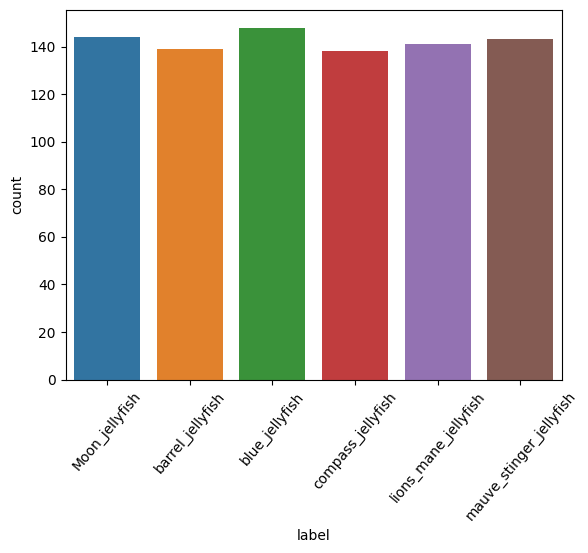

In [5]:
sns.countplot(x = df["label"])
plt.xticks(rotation = 50);

## Show images


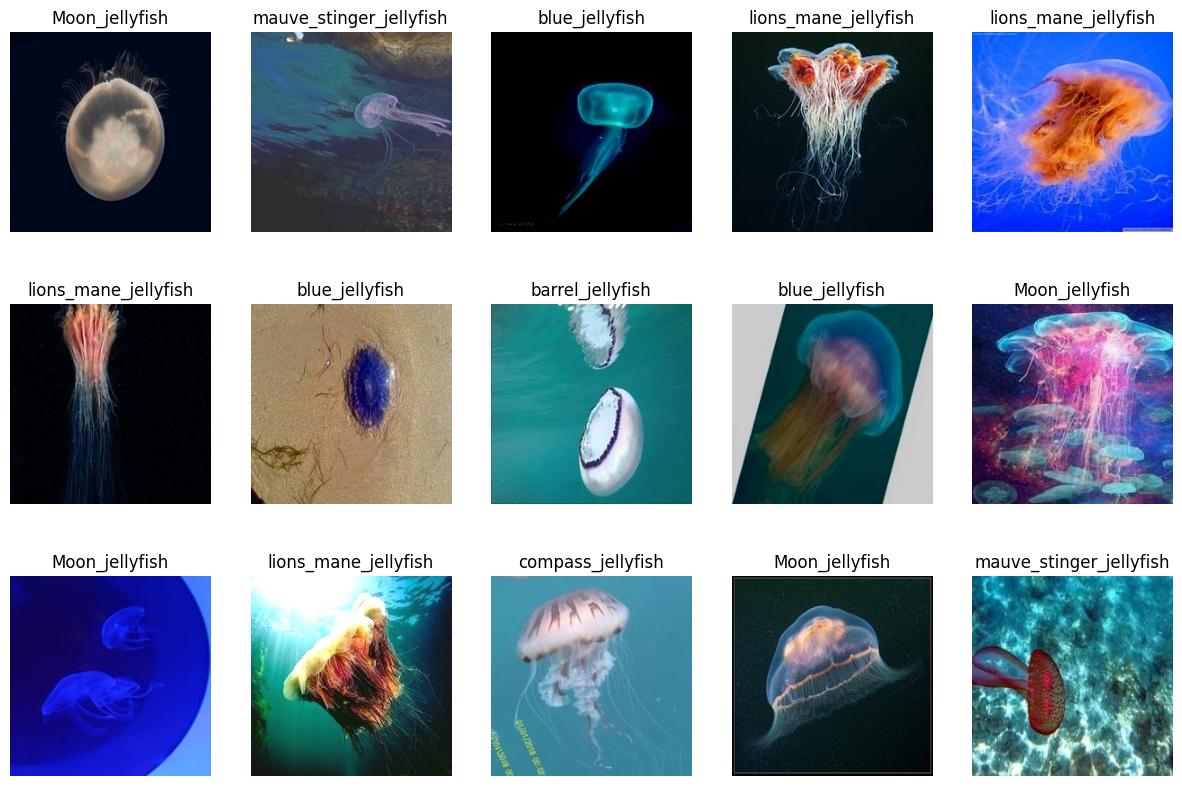

In [6]:
# 보여줄 이미지 수 설정
show_imgs = 15

# 데이터프레임에서 무작위 인덱스 선택
idx = np.random.randint(0, len(df), size=show_imgs)

# 이미지를 표시할 서브플롯 생성
fig, axes = plt.subplots(show_imgs // 5, 5, figsize=(15, 10))
axes = axes.flatten()

# 각 서브플롯에 이미지와 라벨을 시각화
for i, ax in enumerate(axes):
    full_path = df.loc[idx[i]]['path']  # 선택한 인덱스에 해당하는 이미지 파일 경로
    ax.imshow(plt.imread(full_path))  # 이미지를 읽어서 표시
    ax.set_title(df.loc[idx[i]]['label'])  # 이미지의 라벨을 서브플롯 제목으로 설정
    ax.set_axis_off()  # 축을 비활성화하여 이미지를 깔끔하게 표시

## Create datasets and dataloads


In [7]:
# 학습 데이터 변환 설정
train_transforms = v2.Compose([
    v2.Resize(256),  # 이미지 크기를 256x256으로 조절
    v2.RandomResizedCrop(size=(224, 224), antialias=True),  # 무작위로 잘라내어 크기를 224x224로 조절
    v2.RandomHorizontalFlip(p=0.5),  # 50% 확률로 좌우 반전
    v2.RandomVerticalFlip(p=0.5),  # 50% 확률로 상하 반전
    # v2.RandomRotation(degrees=(-20, 20)),  # -20도에서 20도 범위 내에서 무작위 회전 (주석 처리된 부분)
    v2.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),  # 무작위 아핀 변환 적용
    v2.RandomErasing(p=0.5, scale=(0.1, 0.15)),  # 50% 확률로 무작위로 일부 영역을 지웁니다.
    v2.PILToTensor(),  # PIL 이미지를 텐서로 변환
    v2.ToDtype(torch.float32),  # 데이터 타입을 float32로 변환
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # 이미지를 정규화
])

# 테스트 데이터 변환 설정
test_transforms = v2.Compose([
    v2.Resize((224, 224)),  # 이미지 크기를 224x224로 조절
    v2.PILToTensor(),  # PIL 이미지를 텐서로 변환
    v2.ToDtype(torch.float32),  # 데이터 타입을 float32로 변환
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 이미지를 정규화
])

In [8]:
#import torch.utils.data.Dataset

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transforms_):
        self.df = dataframe  # 데이터프레임을 저장하는 클래스 멤버 변수
        self.transforms_ = transforms_  # 데이터 변환을 위한 파이프라인을 저장하는 클래스 멤버 변수

    def __len__(self):
        return len(self.df)  # 데이터프레임의 길이를 반환하여 데이터셋의 크기를 정의

    def __getitem__(self, index):
        image_path = self.df.iloc[index]['path']  # 데이터프레임에서 이미지 파일 경로를 가져옴
        img = Image.open(image_path).convert("RGB")  # 이미지 파일을 열고 RGB로 변환하여 PIL 이미지 객체로 읽음
        transformed_img = self.transforms_(img)  # 이미지 변환 파이프라인을 적용하여 이미지를 변환
        class_id = self.df.iloc[index]['class_id']  # 데이터프레임에서 클래스 ID를 가져옴
        return transformed_img, class_id  # 변환된 이미지와 클래스 ID를 반환

In [9]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")  # GPU 사용 가능 여부에 따라 디바이스 선택
num_workers = 2 if device == 'cuda' else 4  # GPU를 사용할 경우 2개의 워커, 그렇지 않으면 4개의 워커 사용

# 데이터프레임을 학습 데이터와 검증 데이터로 나눔
train_df, val_df = train_test_split(df, test_size=0.2, random_state=9898)

# 학습 및 검증 데이터셋을 생성
train_dataset = MyDataset(train_df, train_transforms)  # 학습 데이터셋 생성
val_dataset = MyDataset(val_df, test_transforms)  # 검증 데이터셋 생성

BATCH_SIZE = 16  # 배치 크기 설정

# 데이터로더 설정
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  # 학습 데이터로더 설정
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)  # 검증 데이터로더 설정

In [10]:
print(f'train data:{len(train_df)}')
print(f'val data:{len(val_df)}')

train data:682
val data:171


## Create model


In [11]:
class_size = 6  # 클래스 수 설정

# EfficientNet 모델을 불러옵니다. 'DEFAULT' 가중치를 사용합니다.
model = models.efficientnet_v2_s(weights='DEFAULT')

# 모델의 출력 레이어를 클래스 수에 맞게 수정합니다.
model.classifier[1] = torch.nn.Linear(1280, class_size)

# 모델에 임의의 입력 데이터를 주입하여 출력의 형태를 확인합니다.
output_shape = model(torch.randn((16, 3, 224, 224))).shape

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 44.9MB/s]


## Training and validation


In [12]:
def train(dataloader, model, loss_fn, optimizer, lr_scheduler):
    size = len(dataloader.dataset)  # 데이터셋의 샘플 수
    num_batches = len(dataloader)  # 에폭당 배치 수
    model.train()  # 모델을 학습 모드로 설정
    epoch_loss = 0.0  # 에폭별 손실 초기화
    epoch_correct = 0  # 에폭별 정확도 초기화

    for (data_, target_) in dataloader:
        target_ = target_.type(torch.LongTensor)  # 타겟 데이터 타입을 LongTensor로 변환
        data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 지정한 디바이스로 이동

        # 옵티마이저의 캐시를 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(data_)

        # 손실 계산
        loss = loss_fn(outputs, target_)

        # 역전파
        loss.backward()

        # 모델 최적화
        optimizer.step()

        # 통계량 계산
        epoch_loss += loss.item()
        _, pred = torch.max(outputs, dim=1)
        epoch_correct += torch.sum(pred == target_).item()

    lr_scheduler.step()  # 학습률 스케줄러 업데이트
    return epoch_correct / size, epoch_loss / num_batches  # 정확도와 손실 반환


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)  # 데이터셋의 샘플 수
    num_batches = len(dataloader)  # 에폭당 배치 수
    epoch_loss = 0.0  # 에폭별 손실 초기화
    epoch_correct = 0  # 에폭별 정확도 초기화

    with torch.no_grad():
        # 이 설정은 역전파를 비활성화합니다.
        model.eval()  # 모델을 평가 모드로 설정
        for (data_, target_) in dataloader:
            target_ = target_.type(torch.LongTensor)  # 타겟 데이터 타입을 LongTensor로 변환
            data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 지정한 디바이스로 이동

            # 순전파
            outputs = model(data_)

            # 손실 계산
            loss = loss_fn(outputs, target_)

            # 통계량 계산
            epoch_loss += loss.item()
            _, pred = torch.max(outputs, dim=1)
            epoch_correct += torch.sum(pred == target_).item()

    return epoch_correct / size, epoch_loss / num_batches  # 정확도와 손실 반환

In [13]:
model.to(device)  # 모델을 지정한 디바이스로 이동
EPOCHS = 50  # 에폭 수 설정

logs = {
    'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []
}

if os.path.exists('checkpoints') == False:
    os.mkdir("checkpoints")  # 체크포인트 디렉토리 생성

criterion = nn.CrossEntropyLoss()  # 손실 함수 설정

# 옵티마이저 설정
learning_rate = 0.0001
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # AdamW 옵티마이저 설정

# 학습률 스케줄러 설정
lr_milestones = [7, 14, 21, 28, 35]  # 학습률 변경 마일스톤 설정
multi_step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=lr_milestones, gamma=0.1)

# 조기 종료 설정
patience = 5  # 조기 종료를 위한 기다릴 에폭 수 설정
counter = 0
best_loss = np.inf

for epoch in tqdm(range(EPOCHS)):
    # 학습 및 검증 수행
    train_acc, train_loss = train(train_loader, model, criterion, optimizer, multi_step_lr_scheduler)
    val_acc, val_loss = test(val_loader, model, criterion)

    # 에폭별 결과 출력
    print(f'EPOCH: {epoch} \
    train_loss: {train_loss:.4f}, train_acc: {train_acc:.3f} \
    val_loss: {val_loss:.4f}, val_acc: {val_acc:.3f} \
    lr: {optimizer.param_groups[0]["lr"]}')

    # 로그 기록
    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)

    torch.save(model.state_dict(), "checkpoints/last.pth")  # 마지막 모델 가중치 저장

    # 모델 성능 개선 확인
    if val_loss < best_loss:
        counter = 0
        best_loss = val_loss
        torch.save(model.state_dict(), "checkpoints/best.pth")  # 최적 모델 가중치 저장
    else:
        counter += 1

    # 조기 종료 검사
    if counter >= patience:
        print("Earlystop!")
        break

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 0     train_loss: 1.5885, train_acc: 0.427     val_loss: 1.1463, val_acc: 0.702     lr: 0.0001


  2%|▏         | 1/50 [04:03<3:18:41, 243.30s/it]

EPOCH: 1     train_loss: 0.9026, train_acc: 0.727     val_loss: 0.4847, val_acc: 0.865     lr: 0.0001


  4%|▍         | 2/50 [04:17<1:26:57, 108.70s/it]

EPOCH: 2     train_loss: 0.4861, train_acc: 0.836     val_loss: 0.2762, val_acc: 0.918     lr: 0.0001


  6%|▌         | 3/50 [04:32<51:25, 65.65s/it]   

EPOCH: 3     train_loss: 0.3999, train_acc: 0.875     val_loss: 0.2615, val_acc: 0.924     lr: 0.0001


  8%|▊         | 4/50 [04:46<34:49, 45.43s/it]

EPOCH: 4     train_loss: 0.2861, train_acc: 0.897     val_loss: 0.2041, val_acc: 0.936     lr: 0.0001


 10%|█         | 5/50 [05:00<25:39, 34.21s/it]

EPOCH: 5     train_loss: 0.2551, train_acc: 0.918     val_loss: 0.1944, val_acc: 0.947     lr: 0.0001


 12%|█▏        | 6/50 [05:15<20:10, 27.50s/it]

EPOCH: 6     train_loss: 0.2442, train_acc: 0.912     val_loss: 0.1574, val_acc: 0.959     lr: 1e-05


 14%|█▍        | 7/50 [05:29<16:40, 23.26s/it]

EPOCH: 7     train_loss: 0.2382, train_acc: 0.918     val_loss: 0.1574, val_acc: 0.959     lr: 1e-05


 16%|█▌        | 8/50 [05:44<14:18, 20.45s/it]

EPOCH: 8     train_loss: 0.1980, train_acc: 0.943     val_loss: 0.1618, val_acc: 0.953     lr: 1e-05


 18%|█▊        | 9/50 [05:58<12:37, 18.48s/it]

EPOCH: 9     train_loss: 0.1892, train_acc: 0.937     val_loss: 0.1465, val_acc: 0.959     lr: 1e-05


 20%|██        | 10/50 [06:12<11:28, 17.22s/it]

EPOCH: 10     train_loss: 0.2110, train_acc: 0.930     val_loss: 0.1422, val_acc: 0.965     lr: 1e-05


 22%|██▏       | 11/50 [06:27<10:37, 16.35s/it]

EPOCH: 11     train_loss: 0.2524, train_acc: 0.919     val_loss: 0.1396, val_acc: 0.965     lr: 1e-05


 24%|██▍       | 12/50 [06:41<10:00, 15.80s/it]

EPOCH: 12     train_loss: 0.2066, train_acc: 0.940     val_loss: 0.1357, val_acc: 0.965     lr: 1e-05


 26%|██▌       | 13/50 [06:56<09:29, 15.40s/it]

EPOCH: 13     train_loss: 0.2045, train_acc: 0.937     val_loss: 0.1398, val_acc: 0.965     lr: 1.0000000000000002e-06


 28%|██▊       | 14/50 [07:10<09:01, 15.05s/it]

EPOCH: 14     train_loss: 0.1514, train_acc: 0.955     val_loss: 0.1320, val_acc: 0.965     lr: 1.0000000000000002e-06


 30%|███       | 15/50 [07:25<08:45, 15.01s/it]

EPOCH: 15     train_loss: 0.1443, train_acc: 0.956     val_loss: 0.1304, val_acc: 0.965     lr: 1.0000000000000002e-06


 32%|███▏      | 16/50 [07:40<08:25, 14.86s/it]

EPOCH: 16     train_loss: 0.1913, train_acc: 0.946     val_loss: 0.1413, val_acc: 0.965     lr: 1.0000000000000002e-06


 34%|███▍      | 17/50 [07:54<08:03, 14.65s/it]

EPOCH: 17     train_loss: 0.1669, train_acc: 0.947     val_loss: 0.1472, val_acc: 0.965     lr: 1.0000000000000002e-06


 36%|███▌      | 18/50 [08:08<07:45, 14.54s/it]

EPOCH: 18     train_loss: 0.1578, train_acc: 0.949     val_loss: 0.1373, val_acc: 0.971     lr: 1.0000000000000002e-06


 38%|███▊      | 19/50 [08:22<07:26, 14.41s/it]

EPOCH: 19     train_loss: 0.1617, train_acc: 0.953     val_loss: 0.1355, val_acc: 0.965     lr: 1.0000000000000002e-06


 40%|████      | 20/50 [08:36<07:09, 14.33s/it]

EPOCH: 20     train_loss: 0.1587, train_acc: 0.953     val_loss: 0.1362, val_acc: 0.971     lr: 1.0000000000000002e-07


 40%|████      | 20/50 [08:50<13:16, 26.55s/it]

Earlystop!


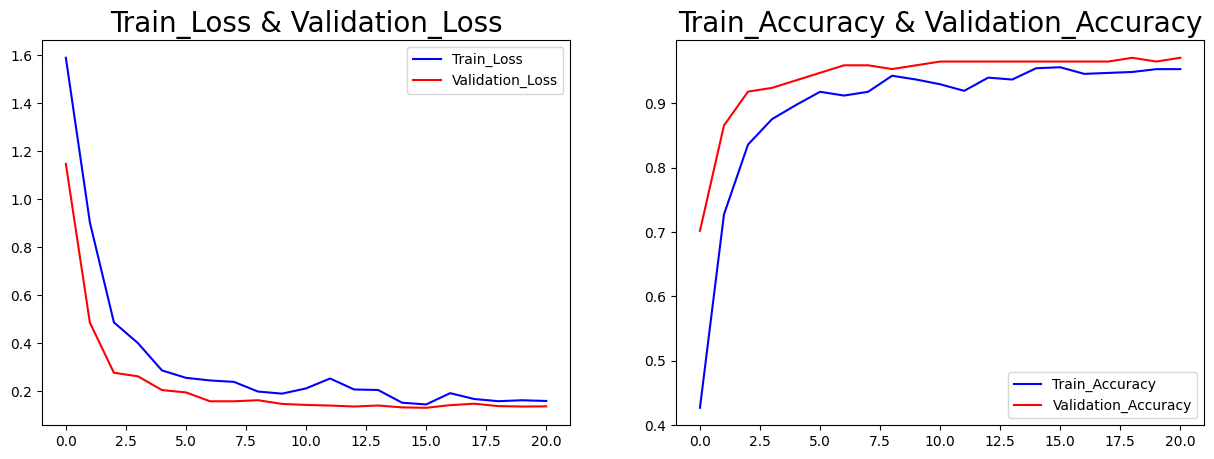

In [14]:
plt.figure(figsize=(15,5))  # 그래프 크기 설정

# 첫 번째 서브플롯: 학습 손실 및 검증 손실 그래프
plt.subplot(1,2,1)  # 1x2 그리드에서 첫 번째 서브플롯
plt.plot(logs['train_loss'], label='Train_Loss', color='blue')  # 학습 손실 그래프
plt.plot(logs['val_loss'], label='Validation_Loss', color='red')  # 검증 손실 그래프
plt.title('Train_Loss & Validation_Loss', fontsize=20)  # 그래프 제목 설정
plt.legend()  # 범례 표시

# 두 번째 서브플롯: 학습 정확도 및 검증 정확도 그래프
plt.subplot(1,2,2)  # 1x2 그리드에서 두 번째 서브플롯
plt.plot(logs['train_acc'], label='Train_Accuracy', color='blue')  # 학습 정확도 그래프
plt.plot(logs['val_acc'], label='Validation_Accuracy', color='red')  # 검증 정확도 그래프
plt.title('Train_Accuracy & Validation_Accuracy', fontsize=20)  # 그래프 제목 설정
plt.legend()  # 범례 표시

# 그래프 출력

## Metrics


In [15]:
# 저장된 모델 가중치를 로드하고 평가 모드로 설정합니다.
model.load_state_dict(torch.load('checkpoints/best.pth'))
model.eval()

# 정답과 예측 결과를 저장할 리스트를 초기화합니다.
y_true, y_pred = [], []

# torch.no_grad() 내에서 평가를 진행합니다.
with torch.no_grad():
    for (data_, target_) in tqdm(val_loader):  # val_loader에서 데이터를 가져옵니다.
        target_ = target_.type(torch.LongTensor)  # 타겟을 LongTensor 타입으로 변환합니다.
        data_, target_ = data_.to(device), target_.to(device)  # 데이터와 타겟을 GPU로 이동합니다.
        outputs = model(data_)  # 모델을 통해 데이터를 전달하여 출력을 얻습니다.
        _, pred = torch.max(outputs, dim=1)  # 출력 중 가장 큰 값의 인덱스를 예측으로 선택합니다.
        y_true.extend(target_.cpu().numpy())  # 실제 정답을 리스트에 추가합니다.
        y_pred.extend(pred.cpu().numpy())  # 예측 결과를 리스트에 추가합니다.

# 예측 결과를 NumPy 배열로 변환합니다.
y_pred = np.array(y_pred)
y_true = np.array(y_true)

100%|██████████| 11/11 [00:01<00:00,  8.46it/s]


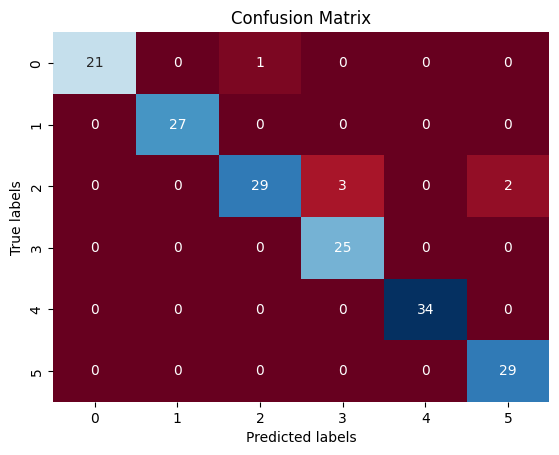

In [16]:
ax = plt.subplot()  # 서브플롯 생성

# 혼동 행렬 생성 및 시각화
CM = confusion_matrix(y_true, y_pred)  # 혼동 행렬 계산
sns.heatmap(CM, annot=True, fmt='g', ax=ax, cbar=False, cmap='RdBu')  # 히트맵으로 혼동 행렬 시각화
ax.set_xlabel('Predicted labels')  # x축 레이블 설정
ax.set_ylabel('True labels')  # y축 레이블 설정
ax.set_title('Confusion Matrix')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [17]:
clf_report = classification_report(y_true, y_pred, target_names = label_list)
print(clf_report)

                         precision    recall  f1-score   support

         Moon_jellyfish       1.00      0.95      0.98        22
       barrel_jellyfish       1.00      1.00      1.00        27
         blue_jellyfish       0.97      0.85      0.91        34
      compass_jellyfish       0.89      1.00      0.94        25
   lions_mane_jellyfish       1.00      1.00      1.00        34
mauve_stinger_jellyfish       0.94      1.00      0.97        29

               accuracy                           0.96       171
              macro avg       0.97      0.97      0.97       171
           weighted avg       0.97      0.96      0.96       171



In [18]:
Acc = accuracy_score(y_true,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 96.491%


# 최종모델로 추가 데이터 분류하기

- 정확도 96.491%의 모델을 사용해서 추가확보한 jellyfish의 이미지들의 클래스를 분류하고 폴더별로 저장해 라벨링합니다.
- 정확도가 100%인 모델이 아니므로 임계값을 95%로 설정해서 모델이 클래스를 예측한 확률이 95%이상인 경우만 분류를 수행합니다.
  - 정확도 90%이상이지만 임계값 미만인 이미지들은 별도로 분류해 2차 분류를 시도합니다.
- 일부 데이터는 잘못된 분류로 라벨링이 될 수 있으나(산술적으로 5%정도) 현재 데이터셋의 볼륨이 너무 작기때문에 일부 오류를 감수해서라도 추가데이터를 확보하는 것이 더 중요하다 판단하여 진행함.
- 분류된 데이터에 대해 해당 모델로 분류를 재시도하여 2중으로 검증을 할 예정


In [ ]:
import torch
import torchvision.transforms.functional as v2
from torchvision import datasets
from torch.utils.data import DataLoader
import shutil
import os
from tqdm import tqdm

# 데이터셋 로드 경로
#base_path = '/content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish'
base_path = '/content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish'
#dataset_folders = ['val', 'test', 'train']
#sub_folders = ['jellyfish', 'animal jellyfish']

# 모델 로드
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('checkpoints/best.pth'))
model.to(device)
model.eval()

# 분류할 클래스명
class_names = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
]

# 이미지 전처리 함수
def process_image(image_path):
    # 이미지 로드 및 전처리
    image = Image.open(image_path)
    image = v2.resize(image, [224, 224])
    image = v2.pil_to_tensor(image).float()  # 이미지를 float 텐서로 변환
    image = v2.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image



from tqdm import tqdm

def classify_and_save_images(dataset_path):
    class_counts = {class_name: 0 for class_name in class_names}
    reclassify_count = 0
    unsorted_count = 0

    for sub_path in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_path}"):
        full_path = os.path.join(dataset_path, sub_path)
        if os.path.isdir(full_path):
            continue

        image = process_image(full_path)
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(image)
            probabilities, preds = torch.max(outputs, 1)
            max_prob = torch.nn.functional.softmax(outputs, dim=1)[0][preds[0]].item()

            # 예측 확률에 따른 분류
            if max_prob >= 0.95:
                dest_folder = f"{dataset_path}/{class_names[preds[0]]}"
                class_counts[class_names[preds[0]]] += 1
            elif 0.90 <= max_prob < 0.95:
                dest_folder = f"{dataset_path}/Reclassify"
                reclassify_count += 1
            else:
                dest_folder = f"{dataset_path}/Unsorted"
                unsorted_count += 1

            # 예측 결과와 확률 출력
            print(f"{sub_path}: {class_names[preds[0]]} with probability {max_prob*100:.2f}%")

            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            shutil.move(full_path, dest_folder)

    # 분류 요약 정보 출력
    print(f"Class Counts for {dataset_path}:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")
    print(f"Reclassify Count: {reclassify_count}")
    print(f"Unsorted Count: {unsorted_count}")

# 각 데이터셋과 하위 폴더에 대해 이미지 분류 및 저장
for folder in dataset_folders:
    for sub_folder in sub_folders:
        dataset_path = f"{base_path}/{folder}/{sub_folder}"
        classify_and_save_images(dataset_path)

Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/jellyfish: 100%|██████████| 8/8 [00:00<00:00, 4767.61it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 0
blue_jellyfish: 0
compass_jellyfish: 0
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 0
Reclassify Count: 0
Unsorted Count: 0


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/animal jellyfish: 100%|██████████| 48/48 [00:17<00:00,  2.69it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/val/animal jellyfish:
Moon_jellyfish: 2
barrel_jellyfish: 0
blue_jellyfish: 0
compass_jellyfish: 1
lions_mane_jellyfish: 2
mauve_stinger_jellyfish: 1
Reclassify Count: 2
Unsorted Count: 36


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/jellyfish: 100%|██████████| 390/390 [00:16<00:00, 23.67it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/jellyfish:
Moon_jellyfish: 24
barrel_jellyfish: 3
blue_jellyfish: 27
compass_jellyfish: 25
lions_mane_jellyfish: 5
mauve_stinger_jellyfish: 5
Reclassify Count: 45
Unsorted Count: 256


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/animal jellyfish: 100%|██████████| 170/170 [00:08<00:00, 21.03it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/test/animal jellyfish:
Moon_jellyfish: 10
barrel_jellyfish: 1
blue_jellyfish: 9
compass_jellyfish: 11
lions_mane_jellyfish: 1
mauve_stinger_jellyfish: 4
Reclassify Count: 15
Unsorted Count: 119


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/jellyfish: 100%|██████████| 1340/1340 [01:01<00:00, 21.93it/s]


Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/jellyfish:
Moon_jellyfish: 49
barrel_jellyfish: 13
blue_jellyfish: 64
compass_jellyfish: 61
lions_mane_jellyfish: 9
mauve_stinger_jellyfish: 43
Reclassify Count: 109
Unsorted Count: 992


Processing /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/animal jellyfish: 100%|██████████| 560/560 [00:26<00:00, 21.40it/s]

Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/aug_jellyfish/train/animal jellyfish:
Moon_jellyfish: 14
barrel_jellyfish: 1
blue_jellyfish: 18
compass_jellyfish: 37
lions_mane_jellyfish: 6
mauve_stinger_jellyfish: 19
Reclassify Count: 48
Unsorted Count: 417


### 추가 확보 데이터셋에 대한 라벨링 작업 진행

[Jellyfish dataset](https://zenodo.org/records/3545785) 에서 확보한 데이터셋에 라벨링 작업 진행


In [20]:
import torch
import torchvision.transforms.functional as v2
import shutil
import os
from tqdm import tqdm
from PIL import Image

# 데이터셋 로드 경로
base_path = '/content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish'

# 모델 로드
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 분류할 클래스명
class_names = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
]

# 이미지 전처리 함수
def process_image(image_path):
    # 이미지 로드 및 전처리
    image = Image.open(image_path)
    image = v2.resize(image, [224, 224])
    image = v2.pil_to_tensor(image).float()  # 이미지를 float 텐서로 변환
    image = v2.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    return image

def classify_and_save_images(dataset_path):
    class_counts = {class_name: 0 for class_name in class_names}
    reclassify_count = 0
    unsorted_count = 0

    for sub_path in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_path}"):
        full_path = os.path.join(dataset_path, sub_path)
        if os.path.isdir(full_path):
            continue

        image = process_image(full_path)
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(image)
            probabilities, preds = torch.max(outputs, 1)
            max_prob = torch.nn.functional.softmax(outputs, dim=1)[0][preds[0]].item()

            # 예측 확률에 따른 분류
            if max_prob >= 0.95:
                dest_folder = f"{dataset_path}/{class_names[preds[0]]}"
                class_counts[class_names[preds[0]]] += 1
            elif 0.90 <= max_prob < 0.95:
                dest_folder = f"{dataset_path}/Reclassify"
                reclassify_count += 1
            else:
                dest_folder = f"{dataset_path}/Unsorted"
                unsorted_count += 1

            # 예측 결과와 확률 출력
            print(f"{sub_path}: {class_names[preds[0]]} with probability {max_prob*100:.2f}%")

            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            shutil.move(full_path, dest_folder)

    # 분류 요약 정보 출력
    print(f"Class Counts for {dataset_path}:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")
    print(f"Reclassify Count: {reclassify_count}")
    print(f"Unsorted Count: {unsorted_count}")

# 주어진 경로에 대해 이미지 분류 및 저장
classify_and_save_images(base_path)

Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   0%|          | 1/916 [00:00<08:17,  1.84it/s]

pelagia13_IMG_00017.jpg: mauve_stinger_jellyfish with probability 98.41%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   0%|          | 2/916 [00:01<07:35,  2.01it/s]

pelagia13_IMG_00013.jpg: mauve_stinger_jellyfish with probability 98.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   0%|          | 3/916 [00:01<07:38,  1.99it/s]

pelagia13_IMG_00011.jpg: mauve_stinger_jellyfish with probability 99.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   0%|          | 4/916 [00:01<07:22,  2.06it/s]

pelagia13_IMG_00008.jpg: mauve_stinger_jellyfish with probability 97.88%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 5/916 [00:02<07:10,  2.11it/s]

pelagia13_IMG_00006.jpg: mauve_stinger_jellyfish with probability 99.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 6/916 [00:03<09:06,  1.66it/s]

pelagia13_IMG_00007.jpg: mauve_stinger_jellyfish with probability 88.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 7/916 [00:03<08:12,  1.84it/s]

pelagia13_IMG_00005.jpg: mauve_stinger_jellyfish with probability 94.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 8/916 [00:04<07:35,  2.00it/s]

pelagia13_IMG_00012.jpg: mauve_stinger_jellyfish with probability 99.00%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 9/916 [00:04<07:28,  2.02it/s]

pelagia13_IMG_00003.jpg: mauve_stinger_jellyfish with probability 90.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   1%|          | 10/916 [00:05<07:21,  2.05it/s]

pelagia13_IMG_00002.jpg: mauve_stinger_jellyfish with probability 97.77%
01.jpg: barrel_jellyfish with probability 30.90%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   2%|▏         | 14/916 [00:10<12:18,  1.22it/s]

02.jpg: compass_jellyfish with probability 40.59%
03.jpg: barrel_jellyfish with probability 30.62%
04.jpg: compass_jellyfish with probability 44.55%
05.jpg: barrel_jellyfish with probability 29.16%
07.jpg: barrel_jellyfish with probability 33.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   2%|▏         | 20/916 [00:10<04:03,  3.68it/s]

06.jpg: compass_jellyfish with probability 34.86%
08.jpg: barrel_jellyfish with probability 38.96%
09.jpg: barrel_jellyfish with probability 30.37%
11.jpg: Moon_jellyfish with probability 26.63%
12.jpg: barrel_jellyfish with probability 33.00%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   3%|▎         | 26/916 [00:10<02:03,  7.23it/s]

10.jpg: blue_jellyfish with probability 28.60%
15.jpg: barrel_jellyfish with probability 28.01%
13.jpg: barrel_jellyfish with probability 39.59%
14.jpg: barrel_jellyfish with probability 30.84%
16.jpg: compass_jellyfish with probability 32.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   3%|▎         | 29/916 [00:10<01:34,  9.37it/s]

18.jpg: barrel_jellyfish with probability 37.72%
17.jpg: barrel_jellyfish with probability 28.65%
20.jpg: barrel_jellyfish with probability 29.10%
19.jpg: Moon_jellyfish with probability 29.02%
21.jpg: barrel_jellyfish with probability 49.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   4%|▍         | 35/916 [00:10<01:04, 13.65it/s]

22.jpg: barrel_jellyfish with probability 29.83%
23.jpg: Moon_jellyfish with probability 30.95%
24.jpg: barrel_jellyfish with probability 36.50%
25.jpg: barrel_jellyfish with probability 27.44%
26.jpg: barrel_jellyfish with probability 32.44%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   4%|▍         | 41/916 [00:11<00:51, 17.06it/s]

27.jpg: compass_jellyfish with probability 33.99%
28.jpg: barrel_jellyfish with probability 36.68%
29.jpg: compass_jellyfish with probability 33.76%
30.jpg: compass_jellyfish with probability 28.86%
31.jpg: barrel_jellyfish with probability 43.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   5%|▍         | 44/916 [00:11<00:48, 18.01it/s]

32.jpg: barrel_jellyfish with probability 29.17%
GOPR5439 04.jpg: compass_jellyfish with probability 42.52%
GOPR5439 05.jpg: blue_jellyfish with probability 39.12%
GOPR5439 06.jpg: compass_jellyfish with probability 47.02%
GOPR5439 30.jpg: compass_jellyfish with probability 37.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   5%|▌         | 50/916 [00:11<00:40, 21.63it/s]

GOPR5439 29.jpg: compass_jellyfish with probability 87.14%
GOPR5439 33.jpg: compass_jellyfish with probability 62.85%
GOPR5439 34.jpg: compass_jellyfish with probability 38.91%
GOPR5439 35.jpg: compass_jellyfish with probability 63.44%
GOPR5439 38.jpg: compass_jellyfish with probability 42.89%
GOPR5439 39.jpg: compass_jellyfish with probability 29.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   6%|▌         | 56/916 [00:11<00:35, 24.37it/s]

GOPR5439 36.jpg: compass_jellyfish with probability 40.80%
GOPR5439 37.jpg: barrel_jellyfish with probability 55.30%
GOPR5439 48.jpg: compass_jellyfish with probability 49.87%
GOPR5439 49.jpg: compass_jellyfish with probability 79.33%
GOPR5439 51.jpg: compass_jellyfish with probability 29.59%
GOPR5440 07.jpg: blue_jellyfish with probability 67.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   7%|▋         | 62/916 [00:12<00:32, 26.45it/s]

GOPR5440 10.jpg: blue_jellyfish with probability 59.38%
GOPR5440 17.jpg: barrel_jellyfish with probability 72.29%
GOPR5440 16.jpg: barrel_jellyfish with probability 49.40%
GOPR5440 18.jpg: blue_jellyfish with probability 52.32%
GOPR5440 23.jpg: blue_jellyfish with probability 51.20%
GOPR5440 26.jpg: barrel_jellyfish with probability 49.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   7%|▋         | 68/916 [00:12<00:31, 26.69it/s]

GOPR5440 30.jpg: blue_jellyfish with probability 44.29%
GOPR5440 29.jpg: blue_jellyfish with probability 51.10%
GOPR5440 28.jpg: blue_jellyfish with probability 49.33%
GOPR5441 02.jpg: barrel_jellyfish with probability 76.41%
GOPR5441 05.jpg: barrel_jellyfish with probability 73.74%
GOPR5441 14.jpg: barrel_jellyfish with probability 80.91%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   8%|▊         | 74/916 [00:12<00:31, 26.69it/s]

GOPR5441 12.jpg: barrel_jellyfish with probability 64.64%
GOPR5442 3.jpg: compass_jellyfish with probability 30.55%
GOPR5442 5.jpg: Moon_jellyfish with probability 29.05%
GOPR5442 6.jpg: compass_jellyfish with probability 27.49%
GOPR5442 7.jpg: barrel_jellyfish with probability 32.64%
GP015439 02.jpg: compass_jellyfish with probability 51.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   9%|▊         | 80/916 [00:12<00:32, 25.99it/s]

GP015439 03.jpg: compass_jellyfish with probability 41.47%
GP015439 14.jpg: barrel_jellyfish with probability 32.32%
GP015439 15.jpg: compass_jellyfish with probability 47.60%
GP015439 18.jpg: compass_jellyfish with probability 27.23%
GP015439 22.jpg: compass_jellyfish with probability 52.06%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:   9%|▉         | 86/916 [00:12<00:33, 24.87it/s]

GP015439 20.jpg: compass_jellyfish with probability 42.18%
GP015439 19.jpg: compass_jellyfish with probability 39.14%
GP015439 21.jpg: compass_jellyfish with probability 38.66%
pelagia12_IMG_00006.jpg: barrel_jellyfish with probability 33.19%
pelagia12_IMG_00013.jpg: mauve_stinger_jellyfish with probability 77.03%
pelagia12_IMG_00004.jpg: mauve_stinger_jellyfish with probability 88.11%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  10%|█         | 92/916 [00:13<00:32, 25.52it/s]

pelagia12_IMG_00005.jpg: mauve_stinger_jellyfish with probability 97.62%
pelagia12_IMG_00012.jpg: mauve_stinger_jellyfish with probability 99.76%
pelagia12_IMG_00007.jpg: mauve_stinger_jellyfish with probability 92.49%
pelagia12_IMG_00008.jpg: mauve_stinger_jellyfish with probability 88.40%
pelagia12_IMG_00015.jpg: mauve_stinger_jellyfish with probability 99.60%
pelagia12_IMG_00018.jpg: barrel_jellyfish with probability 38.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  11%|█         | 98/916 [00:13<00:30, 27.13it/s]

pelagia12_IMG_00014.jpg: mauve_stinger_jellyfish with probability 99.29%
pelagia10_IMG_00006.jpg: mauve_stinger_jellyfish with probability 98.67%
pelagia10_IMG_00007.jpg: mauve_stinger_jellyfish with probability 97.55%
pelagia10_IMG_00009.jpg: mauve_stinger_jellyfish with probability 67.73%
pelagia10_IMG_00005.jpg: mauve_stinger_jellyfish with probability 98.44%
pelagia10_IMG_00003.jpg: mauve_stinger_jellyfish with probability 44.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  11%|█▏        | 104/916 [00:13<00:29, 27.55it/s]

pelagia10_IMG_00008.jpg: mauve_stinger_jellyfish with probability 94.64%
pelagia10_IMG_00004.jpg: mauve_stinger_jellyfish with probability 98.58%
pelagia10_IMG_00010.jpg: mauve_stinger_jellyfish with probability 75.97%
pelagia13_IMG_00004.jpg: mauve_stinger_jellyfish with probability 97.76%
pelagia13_IMG_00001.jpg: mauve_stinger_jellyfish with probability 95.87%
pelagia11_IMG_00011.jpg: mauve_stinger_jellyfish with probability 77.65%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  12%|█▏        | 110/916 [00:13<00:29, 27.79it/s]

pelagia11_IMG_00010.jpg: mauve_stinger_jellyfish with probability 75.46%
pelagia11_IMG_00008.jpg: mauve_stinger_jellyfish with probability 95.40%
pelagia11_IMG_00003.jpg: blue_jellyfish with probability 33.71%
pelagia11_IMG_00009.jpg: mauve_stinger_jellyfish with probability 91.21%
pelagia11_IMG_00006.jpg: mauve_stinger_jellyfish with probability 54.32%
pelagia11_IMG_00007.jpg: mauve_stinger_jellyfish with probability 97.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  12%|█▏        | 113/916 [00:13<00:28, 27.74it/s]

pelagia19_IMG_00004.jpg: barrel_jellyfish with probability 82.91%
pelagia19_IMG_00003.jpg: barrel_jellyfish with probability 67.58%
pelagia18_IMG_00007.jpg: mauve_stinger_jellyfish with probability 88.92%
pelagia18_IMG_00009.jpg: mauve_stinger_jellyfish with probability 99.15%
pelagia18_IMG_00012.jpg: mauve_stinger_jellyfish with probability 87.75%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  13%|█▎        | 119/916 [00:14<00:38, 20.95it/s]

pelagia18_IMG_00013.jpg: mauve_stinger_jellyfish with probability 97.62%
pelagia18_IMG_00014.jpg: mauve_stinger_jellyfish with probability 97.98%
pelagia19_IMG_00001.jpg: mauve_stinger_jellyfish with probability 98.42%
pelagia18_IMG_00010.jpg: mauve_stinger_jellyfish with probability 98.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  13%|█▎        | 122/916 [00:14<00:39, 20.04it/s]

pelagia18_IMG_00006.jpg: mauve_stinger_jellyfish with probability 98.87%
pelagia18_IMG_00005.jpg: mauve_stinger_jellyfish with probability 98.11%
pelagia18_IMG_00004.jpg: mauve_stinger_jellyfish with probability 96.48%
pelagia18_IMG_00003.jpg: mauve_stinger_jellyfish with probability 97.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  14%|█▍        | 128/916 [00:14<00:39, 19.76it/s]

pelagia16_IMG_00004.jpg: mauve_stinger_jellyfish with probability 95.72%
pelagia18_IMG_00001.jpg: mauve_stinger_jellyfish with probability 67.21%
pelagia15_IMG_00012.jpg: mauve_stinger_jellyfish with probability 98.58%
pelagia15_IMG_00014.jpg: mauve_stinger_jellyfish with probability 99.27%
pelagia17_IMG_00003.jpg: mauve_stinger_jellyfish with probability 58.53%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  14%|█▍        | 131/916 [00:14<00:39, 19.84it/s]

pelagia18_IMG_00002.jpg: mauve_stinger_jellyfish with probability 75.01%
pelagia16_IMG_00005.jpg: barrel_jellyfish with probability 69.05%
pelagia15_IMG_00010.jpg: mauve_stinger_jellyfish with probability 98.09%
pelagia15_IMG_00011.jpg: mauve_stinger_jellyfish with probability 89.92%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  15%|█▍        | 137/916 [00:15<00:39, 19.81it/s]

pelagia14_IMG_00016.jpg: mauve_stinger_jellyfish with probability 92.24%
pelagia14_IMG_00012.jpg: mauve_stinger_jellyfish with probability 97.04%
pelagia15_IMG_00007.jpg: mauve_stinger_jellyfish with probability 56.99%
pelagia14_IMG_00017.jpg: blue_jellyfish with probability 37.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  15%|█▌        | 140/916 [00:15<00:38, 19.91it/s]

pelagia14_IMG_00015.jpg: mauve_stinger_jellyfish with probability 81.78%
pelagia15_IMG_00009.jpg: mauve_stinger_jellyfish with probability 98.19%
pelagia15_IMG_00008.jpg: mauve_stinger_jellyfish with probability 85.74%
pelagia14_IMG_00013.jpg: mauve_stinger_jellyfish with probability 97.98%
pelagia14_IMG_00009.jpg: mauve_stinger_jellyfish with probability 40.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  16%|█▌        | 146/916 [00:15<00:38, 20.18it/s]

pelagia14_IMG_00008.jpg: mauve_stinger_jellyfish with probability 94.05%
pelagia14_IMG_00004.jpg: mauve_stinger_jellyfish with probability 93.31%
pelagia13_IMG_00018.jpg: mauve_stinger_jellyfish with probability 96.33%
pelagia14_IMG_00007.jpg: mauve_stinger_jellyfish with probability 90.90%
pelagia13_IMG_00019.jpg: mauve_stinger_jellyfish with probability 99.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  17%|█▋        | 152/916 [00:16<00:36, 20.86it/s]

pelagia14_IMG_00005.jpg: mauve_stinger_jellyfish with probability 96.81%
pelagia14_IMG_00006.jpg: mauve_stinger_jellyfish with probability 84.15%
pelagia13_IMG_00014.jpg: mauve_stinger_jellyfish with probability 98.66%
pelagia1_IMG_00012.jpg: mauve_stinger_jellyfish with probability 98.77%
pelagia1_IMG_00009.jpg: mauve_stinger_jellyfish with probability 98.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  17%|█▋        | 155/916 [00:16<00:39, 19.49it/s]

pelagia1_IMG_00007.jpg: mauve_stinger_jellyfish with probability 82.84%
pelagia1_IMG_00006.jpg: mauve_stinger_jellyfish with probability 96.39%
pelagia1_IMG_00005.jpg: mauve_stinger_jellyfish with probability 70.66%
pelagia1_IMG_00004.jpg: mauve_stinger_jellyfish with probability 93.18%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  17%|█▋        | 159/916 [00:16<00:39, 18.95it/s]

pelagia1_IMG_00002.jpg: mauve_stinger_jellyfish with probability 92.37%
pelagia19_IMG_00018.jpg: mauve_stinger_jellyfish with probability 92.26%
pelagia1_IMG_00003.jpg: mauve_stinger_jellyfish with probability 87.61%
pelagia1_IMG_00001.jpg: mauve_stinger_jellyfish with probability 98.10%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  18%|█▊        | 163/916 [00:16<00:39, 18.86it/s]

pelagia19_IMG_00019.jpg: mauve_stinger_jellyfish with probability 90.87%
pelagia19_IMG_00016.jpg: mauve_stinger_jellyfish with probability 52.23%
pelagia19_IMG_00017.jpg: mauve_stinger_jellyfish with probability 87.70%
pelagia19_IMG_00007.jpg: barrel_jellyfish with probability 87.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  18%|█▊        | 168/916 [00:16<00:37, 19.75it/s]

pelagia19_IMG_00011.jpg: barrel_jellyfish with probability 63.93%
pelagia19_IMG_00006.jpg: barrel_jellyfish with probability 89.36%
pelagia19_IMG_00013.jpg: barrel_jellyfish with probability 89.56%
pelagia19_IMG_00012.jpg: mauve_stinger_jellyfish with probability 96.91%
pelagia19_IMG_00014.jpg: barrel_jellyfish with probability 75.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  19%|█▉        | 174/916 [00:17<00:35, 20.76it/s]

pelagia19_IMG_00015.jpg: mauve_stinger_jellyfish with probability 95.83%
pelagia19_IMG_00005.jpg: barrel_jellyfish with probability 91.08%
pelagia25_IMG_00001.jpg: compass_jellyfish with probability 93.01%
pelagia24_IMG_00010.jpg: mauve_stinger_jellyfish with probability 90.42%
pelagia24_IMG_00008.jpg: mauve_stinger_jellyfish with probability 27.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  19%|█▉        | 177/916 [00:17<00:36, 20.53it/s]

pelagia24_IMG_00009.jpg: mauve_stinger_jellyfish with probability 88.47%
pelagia24_IMG_00005.jpg: mauve_stinger_jellyfish with probability 56.17%
pelagia24_IMG_00006.jpg: mauve_stinger_jellyfish with probability 53.25%
pelagia23_IMG_00009.jpg: mauve_stinger_jellyfish with probability 50.94%
pelagia23_IMG_00007.jpg: mauve_stinger_jellyfish with probability 39.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  20%|█▉        | 182/916 [00:17<00:37, 19.80it/s]

pelagia23_IMG_00008.jpg: mauve_stinger_jellyfish with probability 99.34%
pelagia23_IMG_00017.jpg: mauve_stinger_jellyfish with probability 42.58%
pelagia24_IMG_00004.jpg: blue_jellyfish with probability 28.56%
pelagia20_IMG_00063.jpg: mauve_stinger_jellyfish with probability 99.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  20%|██        | 187/916 [00:17<00:35, 20.51it/s]

pelagia23_IMG_00001.jpg: mauve_stinger_jellyfish with probability 67.63%
pelagia20_IMG_00064.jpg: mauve_stinger_jellyfish with probability 98.32%
pelagia20_IMG_00061.jpg: mauve_stinger_jellyfish with probability 99.14%
pelagia20_IMG_00058.jpg: mauve_stinger_jellyfish with probability 96.60%
pelagia20_IMG_00062.jpg: mauve_stinger_jellyfish with probability 99.84%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  21%|██        | 192/916 [00:18<00:36, 19.97it/s]

pelagia20_IMG_00059.jpg: mauve_stinger_jellyfish with probability 98.30%
pelagia20_IMG_00057.jpg: mauve_stinger_jellyfish with probability 80.10%
pelagia1_IMG_00010.jpg: mauve_stinger_jellyfish with probability 94.00%
pelagia20_IMG_00060.jpg: mauve_stinger_jellyfish with probability 84.83%
pelagia1_IMG_00011.jpg: mauve_stinger_jellyfish with probability 96.95%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  21%|██▏       | 196/916 [00:18<00:36, 19.55it/s]

pelagia1_IMG_00013.jpg: mauve_stinger_jellyfish with probability 92.34%
pelagia28_IMG_00006.jpg: mauve_stinger_jellyfish with probability 77.91%
pelagia27_IMG_00014.jpg: mauve_stinger_jellyfish with probability 63.10%
pelagia27_IMG_00005.jpg: mauve_stinger_jellyfish with probability 87.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  22%|██▏       | 201/916 [00:18<00:36, 19.62it/s]

pelagia27_IMG_00011.jpg: mauve_stinger_jellyfish with probability 98.35%
pelagia27_IMG_00003.jpg: mauve_stinger_jellyfish with probability 39.36%
pelagia26_IMG_00009.jpg: mauve_stinger_jellyfish with probability 98.60%
pelagia28_IMG_00003.jpg: mauve_stinger_jellyfish with probability 93.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  22%|██▏       | 206/916 [00:18<00:35, 19.80it/s]

pelagia26_IMG_00011.jpg: mauve_stinger_jellyfish with probability 98.65%
pelagia26_IMG_00010.jpg: mauve_stinger_jellyfish with probability 98.65%
pelagia26_IMG_00008.jpg: mauve_stinger_jellyfish with probability 98.91%
pelagia26_IMG_00004.jpg: mauve_stinger_jellyfish with probability 99.84%
pelagia26_IMG_00007.jpg: mauve_stinger_jellyfish with probability 98.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  23%|██▎       | 212/916 [00:18<00:29, 24.14it/s]

pelagia25_IMG_00016.jpg: mauve_stinger_jellyfish with probability 93.16%
pelagia25_IMG_00010.jpg: compass_jellyfish with probability 71.20%
pelagia26_IMG_00005.jpg: mauve_stinger_jellyfish with probability 99.67%
pelagia25_IMG_00015.jpg: compass_jellyfish with probability 25.16%
pelagia26_IMG_00006.jpg: mauve_stinger_jellyfish with probability 99.44%
pelagia25_IMG_00013.jpg: mauve_stinger_jellyfish with probability 38.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  24%|██▍       | 218/916 [00:19<00:26, 26.41it/s]

pelagia25_IMG_00011.jpg: blue_jellyfish with probability 33.89%
pelagia25_IMG_00008.jpg: blue_jellyfish with probability 38.57%
pelagia25_IMG_00002.jpg: compass_jellyfish with probability 37.99%
pelagia24_IMG_00011.jpg: mauve_stinger_jellyfish with probability 91.76%
pelagia24_IMG_00012.jpg: mauve_stinger_jellyfish with probability 98.20%
pelagia25_IMG_00007.jpg: mauve_stinger_jellyfish with probability 72.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  24%|██▍       | 221/916 [00:19<00:26, 26.18it/s]

pelagia24_IMG_00007.jpg: blue_jellyfish with probability 28.60%
pelagia4_IMG_00016.jpg: barrel_jellyfish with probability 93.64%
pelagia4_IMG_00008.jpg: mauve_stinger_jellyfish with probability 53.56%
pelagia4_IMG_00003.jpg: compass_jellyfish with probability 47.28%
pelagia4_IMG_00007.jpg: barrel_jellyfish with probability 80.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  25%|██▍       | 227/916 [00:19<00:27, 25.06it/s]

pelagia3_IMG_00010.jpg: blue_jellyfish with probability 26.64%
pelagia4_IMG_00015.jpg: lions_mane_jellyfish with probability 62.73%
pelagia4_IMG_00011.jpg: mauve_stinger_jellyfish with probability 99.52%
pelagia4_IMG_00012.jpg: mauve_stinger_jellyfish with probability 98.22%
pelagia3_IMG_00012.jpg: blue_jellyfish with probability 51.33%
pelagia3_IMG_00011.jpg: blue_jellyfish with probability 34.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  25%|██▌       | 233/916 [00:19<00:30, 22.56it/s]

pelagia3_IMG_00008.jpg: barrel_jellyfish with probability 36.59%
pelagia2_IMG_00019.jpg: blue_jellyfish with probability 57.85%
pelagia2_IMG_00021.jpg: blue_jellyfish with probability 39.93%
pelagia2_IMG_00024.jpg: blue_jellyfish with probability 30.73%
pelagia2_IMG_00026.jpg: mauve_stinger_jellyfish with probability 31.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  26%|██▌       | 239/916 [00:20<00:27, 24.61it/s]

pelagia28_IMG_00019.jpg: mauve_stinger_jellyfish with probability 92.15%
pelagia2_IMG_00025.jpg: blue_jellyfish with probability 24.80%
pelagia28_IMG_00018.jpg: mauve_stinger_jellyfish with probability 96.85%
pelagia28_IMG_00016.jpg: mauve_stinger_jellyfish with probability 68.85%
pelagia28_IMG_00013.jpg: mauve_stinger_jellyfish with probability 92.49%
pelagia28_IMG_00005.jpg: mauve_stinger_jellyfish with probability 59.68%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  27%|██▋       | 245/916 [00:20<00:25, 26.55it/s]

pelagia6_IMG_00012.jpg: mauve_stinger_jellyfish with probability 99.00%
pelagia6_IMG_00011.jpg: mauve_stinger_jellyfish with probability 98.98%
pelagia6_IMG_00007.jpg: mauve_stinger_jellyfish with probability 98.62%
pelagia6_IMG_00010.jpg: mauve_stinger_jellyfish with probability 98.00%
pelagia6_IMG_00008.jpg: mauve_stinger_jellyfish with probability 56.29%
pelagia6_IMG_00006.jpg: mauve_stinger_jellyfish with probability 98.74%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  27%|██▋       | 251/916 [00:20<00:24, 27.56it/s]

pelagia6_IMG_00005.jpg: mauve_stinger_jellyfish with probability 94.71%
pelagia5_IMG_00013.jpg: barrel_jellyfish with probability 64.55%
pelagia6_IMG_00009.jpg: mauve_stinger_jellyfish with probability 93.95%
pelagia5_IMG_00011.jpg: mauve_stinger_jellyfish with probability 86.77%
pelagia5_IMG_00012.jpg: barrel_jellyfish with probability 42.25%
pelagia5_IMG_00010.jpg: mauve_stinger_jellyfish with probability 92.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  28%|██▊       | 257/916 [00:20<00:23, 28.15it/s]

pelagia5_IMG_00008.jpg: blue_jellyfish with probability 60.73%
pelagia5_IMG_00006.jpg: blue_jellyfish with probability 85.26%
pelagia5_IMG_00007.jpg: blue_jellyfish with probability 53.60%
pelagia5_IMG_00004.jpg: blue_jellyfish with probability 38.29%
pelagia5_IMG_00005.jpg: blue_jellyfish with probability 82.51%
pelagia5_IMG_00001.jpg: barrel_jellyfish with probability 32.53%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  29%|██▊       | 263/916 [00:20<00:24, 26.15it/s]

pelagia5_IMG_00002.jpg: barrel_jellyfish with probability 46.80%
pelagia5_IMG_00009.jpg: blue_jellyfish with probability 44.11%
pelagia5_IMG_00003.jpg: barrel_jellyfish with probability 52.75%
pulmo10_IMG_00012.jpg: barrel_jellyfish with probability 97.25%
pulmo10_IMG_00009.jpg: barrel_jellyfish with probability 95.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  29%|██▉       | 266/916 [00:21<00:24, 26.60it/s]

pulmo10_IMG_00006.jpg: barrel_jellyfish with probability 79.90%
pulmo10_IMG_00008.jpg: barrel_jellyfish with probability 94.34%
pulmo10_IMG_00010.jpg: barrel_jellyfish with probability 97.69%
pulmo10_IMG_00005.jpg: barrel_jellyfish with probability 87.12%
pulmo10_IMG_00007.jpg: barrel_jellyfish with probability 92.14%
pulmo10_IMG_00001.jpg: blue_jellyfish with probability 30.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  30%|██▉       | 273/916 [00:21<00:23, 27.81it/s]

pelagia9_IMG_00017.jpg: mauve_stinger_jellyfish with probability 52.93%
pelagia9_IMG_00015.jpg: mauve_stinger_jellyfish with probability 66.00%
pelagia9_IMG_00016.jpg: mauve_stinger_jellyfish with probability 89.39%
pelagia8_IMG_00012.jpg: mauve_stinger_jellyfish with probability 88.63%
pelagia9_IMG_00005.jpg: lions_mane_jellyfish with probability 33.37%
pelagia9_IMG_00006.jpg: mauve_stinger_jellyfish with probability 78.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  30%|███       | 279/916 [00:21<00:22, 27.89it/s]

pelagia9_IMG_00014.jpg: mauve_stinger_jellyfish with probability 35.77%
pelagia9_IMG_00008.jpg: lions_mane_jellyfish with probability 28.08%
pelagia9_IMG_00004.jpg: mauve_stinger_jellyfish with probability 89.66%
pelagia8_IMG_00011.jpg: compass_jellyfish with probability 51.78%
pelagia8_IMG_00013.jpg: mauve_stinger_jellyfish with probability 40.48%
pelagia8_IMG_00004.jpg: mauve_stinger_jellyfish with probability 97.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  31%|███       | 285/916 [00:21<00:22, 28.21it/s]

pelagia8_IMG_00006.jpg: blue_jellyfish with probability 78.51%
pelagia8_IMG_00003.jpg: mauve_stinger_jellyfish with probability 97.38%
pelagia8_IMG_00001.jpg: compass_jellyfish with probability 57.34%
pelagia7_IMG_00006.jpg: mauve_stinger_jellyfish with probability 97.38%
pelagia8_IMG_00002.jpg: mauve_stinger_jellyfish with probability 77.78%
pelagia7_IMG_00004.jpg: blue_jellyfish with probability 45.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  32%|███▏      | 291/916 [00:21<00:22, 27.55it/s]

pelagia7_IMG_00005.jpg: mauve_stinger_jellyfish with probability 26.96%
pelagia7_IMG_00003.jpg: blue_jellyfish with probability 44.15%
pulmo13_IMG_00003.jpg: barrel_jellyfish with probability 96.54%
pulmo13_IMG_00002.jpg: barrel_jellyfish with probability 90.20%
pulmo12_IMG_00011.jpg: barrel_jellyfish with probability 98.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  32%|███▏      | 297/916 [00:22<00:23, 26.15it/s]

pulmo13_IMG_00001.jpg: barrel_jellyfish with probability 65.20%
pulmo12_IMG_00009.jpg: barrel_jellyfish with probability 97.29%
pulmo12_IMG_00010.jpg: barrel_jellyfish with probability 97.46%
pulmo12_IMG_00007.jpg: barrel_jellyfish with probability 98.28%
pulmo12_IMG_00005.jpg: barrel_jellyfish with probability 98.06%
pulmo12_IMG_00008.jpg: barrel_jellyfish with probability 98.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  33%|███▎      | 303/916 [00:22<00:22, 26.90it/s]

pulmo12_IMG_00006.jpg: barrel_jellyfish with probability 93.58%
pulmo12_IMG_00004.jpg: barrel_jellyfish with probability 97.94%
pulmo12_IMG_00001.jpg: barrel_jellyfish with probability 95.60%
pulmo11_IMG_00010.jpg: barrel_jellyfish with probability 98.59%
pulmo12_IMG_00003.jpg: barrel_jellyfish with probability 98.32%
pulmo12_IMG_00002.jpg: barrel_jellyfish with probability 97.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  34%|███▎      | 309/916 [00:22<00:22, 27.22it/s]

pulmo11_IMG_00003.jpg: compass_jellyfish with probability 76.43%
pulmo11_IMG_00005.jpg: barrel_jellyfish with probability 98.11%
pulmo11_IMG_00009.jpg: barrel_jellyfish with probability 98.97%
pulmo11_IMG_00008.jpg: barrel_jellyfish with probability 98.05%
pulmo11_IMG_00004.jpg: barrel_jellyfish with probability 95.87%
pulmo10_IMG_00013.jpg: barrel_jellyfish with probability 88.76%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  34%|███▍      | 315/916 [00:22<00:22, 26.88it/s]

pulmo15_IMG_00009.jpg: barrel_jellyfish with probability 97.43%
pulmo15_IMG_00006.jpg: barrel_jellyfish with probability 97.40%
pulmo15_IMG_00004.jpg: barrel_jellyfish with probability 95.79%
pulmo15_IMG_00002.jpg: barrel_jellyfish with probability 71.21%
pulmo15_IMG_00003.jpg: barrel_jellyfish with probability 72.05%
pulmo15_IMG_00001.jpg: barrel_jellyfish with probability 54.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  35%|███▌      | 321/916 [00:23<00:21, 27.27it/s]

pulmo14_IMG_00009.jpg: barrel_jellyfish with probability 87.00%
pulmo14_IMG_00011.jpg: blue_jellyfish with probability 27.95%
pulmo14_IMG_00012.jpg: barrel_jellyfish with probability 83.72%
pulmo14_IMG_00010.jpg: barrel_jellyfish with probability 98.87%
pulmo14_IMG_00003.jpg: barrel_jellyfish with probability 93.24%
pulmo14_IMG_00002.jpg: barrel_jellyfish with probability 35.05%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  36%|███▌      | 327/916 [00:23<00:20, 28.11it/s]

pulmo14_IMG_00006.jpg: barrel_jellyfish with probability 94.98%
pulmo14_IMG_00007.jpg: barrel_jellyfish with probability 91.73%
pulmo14_IMG_00005.jpg: barrel_jellyfish with probability 83.23%
pulmo13_IMG_00012.jpg: barrel_jellyfish with probability 93.75%
pulmo13_IMG_00008.jpg: barrel_jellyfish with probability 64.55%
pulmo13_IMG_00013.jpg: barrel_jellyfish with probability 93.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  36%|███▋      | 333/916 [00:23<00:21, 26.76it/s]

pulmo13_IMG_00009.jpg: barrel_jellyfish with probability 56.43%
pulmo13_IMG_00010.jpg: barrel_jellyfish with probability 63.07%
pulmo13_IMG_00007.jpg: barrel_jellyfish with probability 58.97%
pulmo13_IMG_00004.jpg: barrel_jellyfish with probability 90.01%
pulmo13_IMG_00011.jpg: barrel_jellyfish with probability 89.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  37%|███▋      | 339/916 [00:23<00:21, 26.73it/s]

pulmo13_IMG_00005.jpg: barrel_jellyfish with probability 53.47%
pulmo13_IMG_00006.jpg: mauve_stinger_jellyfish with probability 51.35%
pulmo18_IMG_00003.jpg: barrel_jellyfish with probability 92.21%
pulmo17_IMG_00008.jpg: barrel_jellyfish with probability 99.07%
pulmo17_IMG_00007.jpg: barrel_jellyfish with probability 98.32%
pulmo17_IMG_00004.jpg: barrel_jellyfish with probability 98.97%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  38%|███▊      | 345/916 [00:23<00:21, 26.92it/s]

pulmo17_IMG_00009.jpg: barrel_jellyfish with probability 97.90%
pulmo17_IMG_00002.jpg: barrel_jellyfish with probability 98.86%
pulmo16_IMG_00007.jpg: barrel_jellyfish with probability 97.72%
pulmo16_IMG_00009.jpg: barrel_jellyfish with probability 96.36%
pulmo16_IMG_00008.jpg: barrel_jellyfish with probability 95.78%
pulmo17_IMG_00001.jpg: barrel_jellyfish with probability 98.04%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  38%|███▊      | 351/916 [00:24<00:20, 27.25it/s]

pulmo16_IMG_00006.jpg: barrel_jellyfish with probability 99.05%
pulmo16_IMG_00005.jpg: barrel_jellyfish with probability 98.39%
pulmo16_IMG_00010.jpg: barrel_jellyfish with probability 96.21%
pulmo15_IMG_00012.jpg: barrel_jellyfish with probability 99.00%
pulmo16_IMG_00004.jpg: barrel_jellyfish with probability 98.85%
pulmo15_IMG_00010.jpg: barrel_jellyfish with probability 95.77%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  39%|███▉      | 357/916 [00:24<00:20, 27.39it/s]

pulmo15_IMG_00005.jpg: barrel_jellyfish with probability 93.06%
pulmo15_IMG_00008.jpg: barrel_jellyfish with probability 95.83%
pulmo15_IMG_00011.jpg: barrel_jellyfish with probability 96.49%
pulmo15_IMG_00007.jpg: barrel_jellyfish with probability 92.09%
pulmo1_IMG_00017.jpg: barrel_jellyfish with probability 95.39%
pulmo1_IMG_00016.jpg: barrel_jellyfish with probability 95.05%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  39%|███▉      | 360/916 [00:24<00:20, 27.54it/s]

pulmo1_IMG_00009.jpg: barrel_jellyfish with probability 98.63%
pulmo1_IMG_00012.jpg: barrel_jellyfish with probability 98.25%
pulmo1_IMG_00011.jpg: barrel_jellyfish with probability 97.20%
pulmo19_IMG_00014.jpg: barrel_jellyfish with probability 86.83%
pulmo19_IMG_00013.jpg: barrel_jellyfish with probability 49.87%
pulmo1_IMG_00015.jpg: barrel_jellyfish with probability 94.68%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  40%|████      | 369/916 [00:24<00:20, 26.45it/s]

pulmo1_IMG_00010.jpg: barrel_jellyfish with probability 95.09%
pulmo1_IMG_00008.jpg: barrel_jellyfish with probability 99.20%
pulmo19_IMG_00010.jpg: barrel_jellyfish with probability 49.23%
pulmo19_IMG_00011.jpg: barrel_jellyfish with probability 66.17%
pulmo19_IMG_00006.jpg: barrel_jellyfish with probability 92.53%
pulmo19_IMG_00008.jpg: barrel_jellyfish with probability 78.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  41%|████      | 375/916 [00:25<00:19, 27.38it/s]

pulmo18_IMG_00010.jpg: barrel_jellyfish with probability 98.66%
pulmo18_IMG_00012.jpg: barrel_jellyfish with probability 98.82%
pulmo18_IMG_00013.jpg: barrel_jellyfish with probability 98.43%
pulmo19_IMG_00009.jpg: barrel_jellyfish with probability 48.75%
pulmo19_IMG_00007.jpg: barrel_jellyfish with probability 89.03%
pulmo18_IMG_00011.jpg: barrel_jellyfish with probability 99.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  42%|████▏     | 381/916 [00:25<00:19, 28.00it/s]

pulmo18_IMG_00005.jpg: barrel_jellyfish with probability 93.86%
pulmo18_IMG_00004.jpg: barrel_jellyfish with probability 93.38%
pulmo17_IMG_00011.jpg: barrel_jellyfish with probability 99.01%
pulmo18_IMG_00002.jpg: barrel_jellyfish with probability 73.50%
pulmo17_IMG_00010.jpg: barrel_jellyfish with probability 98.60%
pulmo20_IMG_00020.jpg: barrel_jellyfish with probability 51.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  42%|████▏     | 387/916 [00:25<00:18, 27.92it/s]

pulmo20_IMG_00019.jpg: barrel_jellyfish with probability 98.16%
pulmo20_IMG_00015.jpg: barrel_jellyfish with probability 98.09%
pulmo20_IMG_00014.jpg: barrel_jellyfish with probability 99.19%
pulmo20_IMG_00016.jpg: barrel_jellyfish with probability 74.63%
pulmo20_IMG_00018.jpg: barrel_jellyfish with probability 97.19%
pulmo20_IMG_00009.jpg: barrel_jellyfish with probability 76.44%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  43%|████▎     | 393/916 [00:25<00:19, 26.83it/s]

pulmo20_IMG_00010.jpg: barrel_jellyfish with probability 85.02%
pulmo20_IMG_00017.jpg: barrel_jellyfish with probability 98.15%
pulmo20_IMG_00013.jpg: barrel_jellyfish with probability 97.20%
pulmo20_IMG_00012.jpg: barrel_jellyfish with probability 88.94%
pulmo20_IMG_00008.jpg: barrel_jellyfish with probability 94.42%
pulmo20_IMG_00004.jpg: barrel_jellyfish with probability 94.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  43%|████▎     | 396/916 [00:25<00:19, 26.88it/s]

pulmo20_IMG_00007.jpg: barrel_jellyfish with probability 97.48%
pulmo20_IMG_00003.jpg: barrel_jellyfish with probability 96.07%
pulmo20_IMG_00005.jpg: barrel_jellyfish with probability 98.45%
pulmo1_IMG_00022.jpg: barrel_jellyfish with probability 79.19%
pulmo1_IMG_00020.jpg: barrel_jellyfish with probability 97.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  44%|████▍     | 402/916 [00:26<00:20, 25.57it/s]

pulmo1_IMG_00021.jpg: barrel_jellyfish with probability 96.03%
pulmo1_IMG_00019.jpg: barrel_jellyfish with probability 96.88%
pulmo1_IMG_00018.jpg: barrel_jellyfish with probability 98.13%
pulmo21_IMG_00018.jpg: barrel_jellyfish with probability 96.48%
pulmo22_IMG_00003.jpg: barrel_jellyfish with probability 98.43%
pulmo22_IMG_00005.jpg: barrel_jellyfish with probability 50.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  45%|████▍     | 408/916 [00:26<00:18, 26.79it/s]

pulmo21_IMG_00019.jpg: barrel_jellyfish with probability 95.89%
pulmo21_IMG_00017.jpg: barrel_jellyfish with probability 62.73%
pulmo21_IMG_00016.jpg: barrel_jellyfish with probability 94.34%
pulmo21_IMG_00012.jpg: barrel_jellyfish with probability 97.41%
pulmo21_IMG_00008.jpg: barrel_jellyfish with probability 92.36%
pulmo21_IMG_00014.jpg: barrel_jellyfish with probability 89.83%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  45%|████▌     | 414/916 [00:26<00:18, 27.30it/s]

pulmo21_IMG_00013.jpg: barrel_jellyfish with probability 98.52%
pulmo21_IMG_00011.jpg: barrel_jellyfish with probability 86.18%
pulmo21_IMG_00010.jpg: barrel_jellyfish with probability 97.70%
pulmo21_IMG_00015.jpg: barrel_jellyfish with probability 94.36%
pulmo21_IMG_00009.jpg: barrel_jellyfish with probability 92.51%
pulmo21_IMG_00005.jpg: barrel_jellyfish with probability 96.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  46%|████▌     | 420/916 [00:26<00:17, 27.90it/s]

pulmo21_IMG_00007.jpg: barrel_jellyfish with probability 66.09%
pulmo21_IMG_00004.jpg: barrel_jellyfish with probability 55.60%
pulmo21_IMG_00002.jpg: barrel_jellyfish with probability 50.06%
pulmo21_IMG_00003.jpg: barrel_jellyfish with probability 54.15%
pulmo20_IMG_00021.jpg: barrel_jellyfish with probability 67.18%
pulmo21_IMG_00001.jpg: barrel_jellyfish with probability 48.95%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  47%|████▋     | 426/916 [00:26<00:17, 27.98it/s]

pulmo20_IMG_00022.jpg: barrel_jellyfish with probability 92.14%
pulmo21_IMG_00006.jpg: barrel_jellyfish with probability 70.71%
pulmo24_IMG_00009.jpg: barrel_jellyfish with probability 89.09%
pulmo24_IMG_00008.jpg: barrel_jellyfish with probability 55.04%
pulmo23_IMG_00010.jpg: barrel_jellyfish with probability 98.15%
pulmo23_IMG_00007.jpg: barrel_jellyfish with probability 98.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  47%|████▋     | 432/916 [00:27<00:18, 25.75it/s]

pulmo23_IMG_00009.jpg: barrel_jellyfish with probability 99.17%
pulmo24_IMG_00007.jpg: barrel_jellyfish with probability 89.67%
pulmo23_IMG_00011.jpg: barrel_jellyfish with probability 97.73%
pulmo24_IMG_00010.jpg: barrel_jellyfish with probability 96.86%
pulmo23_IMG_00012.jpg: barrel_jellyfish with probability 98.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  48%|████▊     | 438/916 [00:27<00:17, 26.73it/s]

pulmo23_IMG_00008.jpg: barrel_jellyfish with probability 99.36%
pulmo23_IMG_00005.jpg: barrel_jellyfish with probability 98.70%
pulmo23_IMG_00004.jpg: barrel_jellyfish with probability 98.55%
pulmo23_IMG_00003.jpg: barrel_jellyfish with probability 98.02%
pulmo23_IMG_00006.jpg: barrel_jellyfish with probability 96.71%
pulmo23_IMG_00002.jpg: barrel_jellyfish with probability 95.01%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  48%|████▊     | 444/916 [00:27<00:17, 27.37it/s]

pulmo22_IMG_00015.jpg: barrel_jellyfish with probability 95.08%
pulmo23_IMG_00001.jpg: barrel_jellyfish with probability 95.12%
pulmo22_IMG_00013.jpg: barrel_jellyfish with probability 94.65%
pulmo22_IMG_00014.jpg: barrel_jellyfish with probability 49.88%
pulmo22_IMG_00016.jpg: barrel_jellyfish with probability 96.61%
pulmo22_IMG_00012.jpg: barrel_jellyfish with probability 93.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  49%|████▉     | 450/916 [00:27<00:17, 27.35it/s]

pulmo22_IMG_00011.jpg: barrel_jellyfish with probability 98.73%
pulmo22_IMG_00008.jpg: barrel_jellyfish with probability 98.57%
pulmo22_IMG_00007.jpg: barrel_jellyfish with probability 98.70%
pulmo22_IMG_00009.jpg: barrel_jellyfish with probability 99.07%
pulmo22_IMG_00010.jpg: barrel_jellyfish with probability 98.48%
pulmo26_IMG_00014.jpg: barrel_jellyfish with probability 96.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  50%|████▉     | 456/916 [00:28<00:17, 27.05it/s]

pulmo26_IMG_00011.jpg: barrel_jellyfish with probability 96.42%
pulmo26_IMG_00008.jpg: blue_jellyfish with probability 28.19%
pulmo26_IMG_00009.jpg: barrel_jellyfish with probability 36.95%
pulmo26_IMG_00012.jpg: barrel_jellyfish with probability 87.79%
pulmo26_IMG_00007.jpg: barrel_jellyfish with probability 37.15%
pulmo26_IMG_00010.jpg: barrel_jellyfish with probability 87.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  50%|█████     | 462/916 [00:28<00:16, 27.62it/s]

pulmo26_IMG_00006.jpg: barrel_jellyfish with probability 43.28%
pulmo25_IMG_00009.jpg: barrel_jellyfish with probability 97.78%
pulmo25_IMG_00012.jpg: barrel_jellyfish with probability 98.02%
pulmo25_IMG_00010.jpg: barrel_jellyfish with probability 95.27%
pulmo25_IMG_00008.jpg: barrel_jellyfish with probability 96.35%
pulmo25_IMG_00007.jpg: barrel_jellyfish with probability 97.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  51%|█████     | 468/916 [00:28<00:17, 26.33it/s]

pulmo25_IMG_00005.jpg: barrel_jellyfish with probability 93.46%
pulmo25_IMG_00004.jpg: barrel_jellyfish with probability 79.92%
pulmo25_IMG_00003.jpg: barrel_jellyfish with probability 45.37%
pulmo24_IMG_00012.jpg: barrel_jellyfish with probability 97.47%
pulmo24_IMG_00014.jpg: barrel_jellyfish with probability 98.80%
pulmo25_IMG_00006.jpg: barrel_jellyfish with probability 96.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  52%|█████▏    | 474/916 [00:28<00:18, 23.89it/s]

pulmo24_IMG_00011.jpg: barrel_jellyfish with probability 98.85%
pulmo24_IMG_00013.jpg: barrel_jellyfish with probability 98.31%
pulmo3_IMG_00002.jpg: barrel_jellyfish with probability 96.01%
pulmo2_IMG_00007.jpg: barrel_jellyfish with probability 92.89%
pulmo2_IMG_00008.jpg: barrel_jellyfish with probability 94.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  52%|█████▏    | 477/916 [00:28<00:20, 21.85it/s]

pulmo2_IMG_00006.jpg: barrel_jellyfish with probability 52.77%
pulmo2_IMG_00005.jpg: blue_jellyfish with probability 34.52%
pulmo2_IMG_00004.jpg: barrel_jellyfish with probability 84.01%
pulmo29_IMG_00011.jpg: barrel_jellyfish with probability 79.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  53%|█████▎    | 483/916 [00:29<00:20, 21.08it/s]

pulmo29_IMG_00009.jpg: barrel_jellyfish with probability 95.05%
pulmo29_IMG_00006.jpg: barrel_jellyfish with probability 94.31%
pulmo28_IMG_00003.jpg: barrel_jellyfish with probability 97.85%
pulmo29_IMG_00003.jpg: barrel_jellyfish with probability 96.09%
pulmo2_IMG_00003.jpg: barrel_jellyfish with probability 98.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  53%|█████▎    | 486/916 [00:29<00:20, 21.02it/s]

pulmo29_IMG_00010.jpg: barrel_jellyfish with probability 99.14%
pulmo28_IMG_00001.jpg: barrel_jellyfish with probability 93.18%
pulmo28_IMG_00004.jpg: barrel_jellyfish with probability 98.70%
pulmo27_IMG_00016.jpg: barrel_jellyfish with probability 99.21%
pulmo26_IMG_00017.jpg: barrel_jellyfish with probability 82.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  54%|█████▎    | 492/916 [00:29<00:20, 20.90it/s]

pulmo27_IMG_00018.jpg: barrel_jellyfish with probability 99.53%
pulmo27_IMG_00015.jpg: barrel_jellyfish with probability 98.66%
pulmo27_IMG_00003.jpg: barrel_jellyfish with probability 98.53%
pulmo27_IMG_00008.jpg: barrel_jellyfish with probability 97.83%
pulmo26_IMG_00016.jpg: barrel_jellyfish with probability 92.74%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  54%|█████▍    | 495/916 [00:29<00:20, 20.54it/s]

pulmo26_IMG_00015.jpg: barrel_jellyfish with probability 97.46%
pulmo26_IMG_00013.jpg: blue_jellyfish with probability 50.73%
pulmo5_IMG_00008.jpg: barrel_jellyfish with probability 95.93%
pulmo5_IMG_00004.jpg: barrel_jellyfish with probability 97.11%
pulmo5_IMG_00006.jpg: barrel_jellyfish with probability 93.68%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  55%|█████▍    | 503/916 [00:30<00:20, 20.29it/s]

pulmo5_IMG_00003.jpg: barrel_jellyfish with probability 98.13%
pulmo4_IMG_00009.jpg: barrel_jellyfish with probability 98.94%
pulmo4_IMG_00008.jpg: barrel_jellyfish with probability 97.66%
pulmo4_IMG_00013.jpg: barrel_jellyfish with probability 87.64%
pulmo5_IMG_00007.jpg: barrel_jellyfish with probability 91.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  55%|█████▌    | 506/916 [00:30<00:19, 20.62it/s]

pulmo4_IMG_00012.jpg: barrel_jellyfish with probability 97.87%
pulmo4_IMG_00007.jpg: barrel_jellyfish with probability 99.11%
pulmo4_IMG_00005.jpg: barrel_jellyfish with probability 91.56%
pulmo4_IMG_00004.jpg: barrel_jellyfish with probability 73.36%
pulmo4_IMG_00006.jpg: barrel_jellyfish with probability 98.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  56%|█████▌    | 512/916 [00:30<00:20, 20.15it/s]

pulmo3_IMG_00012.jpg: barrel_jellyfish with probability 95.44%
pulmo3_IMG_00004.jpg: barrel_jellyfish with probability 98.94%
pulmo3_IMG_00009.jpg: barrel_jellyfish with probability 99.13%
pulmo3_IMG_00007.jpg: barrel_jellyfish with probability 99.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  56%|█████▌    | 515/916 [00:30<00:19, 20.30it/s]

pulmo3_IMG_00011.jpg: barrel_jellyfish with probability 99.35%
pulmo3_IMG_00010.jpg: barrel_jellyfish with probability 82.88%
pulmo3_IMG_00003.jpg: barrel_jellyfish with probability 97.10%
pulmo30_IMG_00012.jpg: barrel_jellyfish with probability 91.17%
pulmo2_IMG_00009.jpg: barrel_jellyfish with probability 96.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  57%|█████▋    | 521/916 [00:31<00:19, 20.37it/s]

pulmo2_IMG_00013.jpg: barrel_jellyfish with probability 66.16%
pulmo3_IMG_00001.jpg: barrel_jellyfish with probability 96.14%
pulmo6_IMG_00006.jpg: barrel_jellyfish with probability 98.43%
pulmo6_IMG_00004.jpg: compass_jellyfish with probability 24.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  57%|█████▋    | 524/916 [00:31<00:19, 20.42it/s]

pulmo5_IMG_00025.jpg: Moon_jellyfish with probability 47.30%
pulmo5_IMG_00028.jpg: barrel_jellyfish with probability 87.81%
pulmo5_IMG_00030.jpg: barrel_jellyfish with probability 98.29%
pulmo5_IMG_00031.jpg: barrel_jellyfish with probability 97.93%
pulmo5_IMG_00026.jpg: barrel_jellyfish with probability 98.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  58%|█████▊    | 530/916 [00:31<00:18, 21.13it/s]

pulmo5_IMG_00029.jpg: barrel_jellyfish with probability 96.64%
pulmo5_IMG_00022.jpg: barrel_jellyfish with probability 96.21%
pulmo5_IMG_00023.jpg: barrel_jellyfish with probability 44.01%
pulmo5_IMG_00021.jpg: barrel_jellyfish with probability 91.50%
pulmo5_IMG_00018.jpg: barrel_jellyfish with probability 96.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  59%|█████▊    | 536/916 [00:31<00:18, 20.62it/s]

pulmo5_IMG_00014.jpg: barrel_jellyfish with probability 98.11%
pulmo5_IMG_00015.jpg: barrel_jellyfish with probability 87.30%
pulmo5_IMG_00016.jpg: barrel_jellyfish with probability 97.04%
pulmo5_IMG_00019.jpg: barrel_jellyfish with probability 98.11%
pulmo5_IMG_00010.jpg: barrel_jellyfish with probability 46.05%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  59%|█████▉    | 539/916 [00:32<00:17, 21.03it/s]

pulmo5_IMG_00017.jpg: barrel_jellyfish with probability 97.53%
pulmo5_IMG_00012.jpg: barrel_jellyfish with probability 96.68%
pulmo5_IMG_00013.jpg: barrel_jellyfish with probability 98.26%
pulmo5_IMG_00011.jpg: barrel_jellyfish with probability 67.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  59%|█████▉    | 544/916 [00:32<00:19, 19.51it/s]

pulmo5_IMG_00009.jpg: barrel_jellyfish with probability 98.28%
pulmo8_IMG_00008.jpg: barrel_jellyfish with probability 98.29%
pulmo8_IMG_00009.jpg: barrel_jellyfish with probability 98.40%
pulmo8_IMG_00005.jpg: barrel_jellyfish with probability 99.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  60%|█████▉    | 547/916 [00:32<00:18, 19.96it/s]

pulmo8_IMG_00006.jpg: barrel_jellyfish with probability 65.54%
pulmo8_IMG_00007.jpg: barrel_jellyfish with probability 97.06%
pulmo8_IMG_00004.jpg: barrel_jellyfish with probability 96.01%
pulmo8_IMG_00003.jpg: barrel_jellyfish with probability 97.43%
pulmo7_IMG_00013.jpg: barrel_jellyfish with probability 97.23%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  60%|██████    | 552/916 [00:32<00:19, 18.60it/s]

pulmo7_IMG_00012.jpg: barrel_jellyfish with probability 95.66%
pulmo7_IMG_00014.jpg: barrel_jellyfish with probability 98.65%
pulmo7_IMG_00007.jpg: barrel_jellyfish with probability 99.20%
pulmo7_IMG_00016.jpg: barrel_jellyfish with probability 98.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  61%|██████    | 557/916 [00:32<00:18, 19.15it/s]

pulmo7_IMG_00003.jpg: barrel_jellyfish with probability 97.65%
pulmo7_IMG_00009.jpg: barrel_jellyfish with probability 97.02%
pulmo7_IMG_00005.jpg: barrel_jellyfish with probability 99.42%
pulmo6_IMG_00012.jpg: barrel_jellyfish with probability 97.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  61%|██████    | 561/916 [00:33<00:20, 17.71it/s]

pulmo7_IMG_00002.jpg: barrel_jellyfish with probability 95.55%
pulmo6_IMG_00008.jpg: barrel_jellyfish with probability 89.19%
pulmo6_IMG_00009.jpg: barrel_jellyfish with probability 95.93%
pulmo6_IMG_00011.jpg: barrel_jellyfish with probability 95.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  61%|██████▏   | 563/916 [00:33<00:20, 17.07it/s]

pulmo6_IMG_00010.jpg: barrel_jellyfish with probability 68.18%
pulmo6_IMG_00007.jpg: barrel_jellyfish with probability 95.15%
pulmo6_IMG_00005.jpg: barrel_jellyfish with probability 36.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  62%|██████▏   | 567/916 [00:33<00:22, 15.72it/s]

pulmo7_IMG_00001.jpg: barrel_jellyfish with probability 83.73%
teuberculata10_IMG_00021.jpg: barrel_jellyfish with probability 57.01%
teuberculata10_IMG_00019.jpg: compass_jellyfish with probability 49.26%
teuberculata10_IMG_00017.jpg: barrel_jellyfish with probability 54.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  62%|██████▏   | 571/916 [00:33<00:20, 16.75it/s]

teuberculata10_IMG_00018.jpg: compass_jellyfish with probability 32.54%
teuberculata10_IMG_00015.jpg: compass_jellyfish with probability 38.27%
teuberculata10_IMG_00020.jpg: barrel_jellyfish with probability 66.32%
teuberculata10_IMG_00016.jpg: barrel_jellyfish with probability 57.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  63%|██████▎   | 577/916 [00:34<00:17, 18.87it/s]

teuberculata10_IMG_00013.jpg: compass_jellyfish with probability 63.26%
teuberculata10_IMG_00014.jpg: barrel_jellyfish with probability 42.79%
teuberculata10_IMG_00011.jpg: compass_jellyfish with probability 64.83%
teuberculata10_IMG_00012.jpg: barrel_jellyfish with probability 53.21%
teuberculata10_IMG_00008.jpg: compass_jellyfish with probability 62.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  63%|██████▎   | 581/916 [00:34<00:18, 18.30it/s]

teuberculata10_IMG_00009.jpg: barrel_jellyfish with probability 40.72%
teuberculata10_IMG_00007.jpg: barrel_jellyfish with probability 35.70%
pulmo9_IMG_00005.jpg: barrel_jellyfish with probability 92.46%
teuberculata10_IMG_00006.jpg: compass_jellyfish with probability 42.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  64%|██████▍   | 584/916 [00:34<00:17, 19.46it/s]

pulmo9_IMG_00009.jpg: barrel_jellyfish with probability 80.61%
teuberculata10_IMG_00010.jpg: barrel_jellyfish with probability 45.32%
pulmo9_IMG_00006.jpg: barrel_jellyfish with probability 99.34%
pulmo9_IMG_00002.jpg: barrel_jellyfish with probability 97.98%
pulmo8_IMG_00010.jpg: barrel_jellyfish with probability 98.88%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  64%|██████▍   | 590/916 [00:34<00:15, 20.41it/s]

pulmo9_IMG_00004.jpg: barrel_jellyfish with probability 98.27%
pulmo9_IMG_00003.jpg: barrel_jellyfish with probability 93.21%
pulmo9_IMG_00001.jpg: barrel_jellyfish with probability 81.31%
teuberculata11_IMG_00006.jpg: barrel_jellyfish with probability 44.17%
teuberculata11_IMG_00003.jpg: barrel_jellyfish with probability 39.46%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  65%|██████▍   | 593/916 [00:34<00:16, 19.97it/s]

teuberculata11_IMG_00005.jpg: compass_jellyfish with probability 34.68%
teuberculata10_IMG_00038.jpg: barrel_jellyfish with probability 45.79%
teuberculata11_IMG_00004.jpg: barrel_jellyfish with probability 44.95%
teuberculata11_IMG_00002.jpg: barrel_jellyfish with probability 50.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  65%|██████▌   | 599/916 [00:35<00:16, 18.85it/s]

teuberculata10_IMG_00037.jpg: compass_jellyfish with probability 45.73%
teuberculata10_IMG_00035.jpg: barrel_jellyfish with probability 38.18%
teuberculata10_IMG_00033.jpg: compass_jellyfish with probability 42.32%
teuberculata10_IMG_00034.jpg: compass_jellyfish with probability 46.98%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  66%|██████▌   | 604/916 [00:35<00:15, 19.76it/s]

teuberculata10_IMG_00030.jpg: compass_jellyfish with probability 45.72%
teuberculata10_IMG_00028.jpg: barrel_jellyfish with probability 58.50%
teuberculata10_IMG_00032.jpg: compass_jellyfish with probability 62.45%
teuberculata10_IMG_00027.jpg: compass_jellyfish with probability 40.54%
teuberculata10_IMG_00029.jpg: compass_jellyfish with probability 59.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  66%|██████▋   | 608/916 [00:35<00:15, 19.34it/s]

teuberculata10_IMG_00031.jpg: compass_jellyfish with probability 40.43%
teuberculata10_IMG_00026.jpg: barrel_jellyfish with probability 47.28%
teuberculata10_IMG_00025.jpg: barrel_jellyfish with probability 49.58%
teuberculata10_IMG_00023.jpg: compass_jellyfish with probability 51.75%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  67%|██████▋   | 611/916 [00:35<00:15, 19.53it/s]

teuberculata10_IMG_00024.jpg: barrel_jellyfish with probability 31.66%
teuberculata10_IMG_00022.jpg: compass_jellyfish with probability 65.77%
teuberculata12_IMG_00008.jpg: barrel_jellyfish with probability 35.87%
teuberculata12_IMG_00002.jpg: compass_jellyfish with probability 90.91%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  67%|██████▋   | 615/916 [00:36<00:16, 18.57it/s]

teuberculata11_IMG_00187.jpg: barrel_jellyfish with probability 49.19%
teuberculata11_IMG_00189.jpg: lions_mane_jellyfish with probability 26.99%
teuberculata11_IMG_00188.jpg: mauve_stinger_jellyfish with probability 37.99%
teuberculata11_IMG_00204.jpg: blue_jellyfish with probability 37.84%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  68%|██████▊   | 619/916 [00:36<00:16, 18.44it/s]

teuberculata11_IMG_00206.jpg: blue_jellyfish with probability 32.00%
teuberculata11_IMG_00019.jpg: barrel_jellyfish with probability 40.20%
teuberculata11_IMG_00018.jpg: barrel_jellyfish with probability 58.27%
teuberculata11_IMG_00205.jpg: blue_jellyfish with probability 60.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  68%|██████▊   | 624/916 [00:36<00:15, 19.34it/s]

teuberculata11_IMG_00017.jpg: barrel_jellyfish with probability 75.14%
teuberculata11_IMG_00016.jpg: barrel_jellyfish with probability 53.14%
teuberculata11_IMG_00011.jpg: barrel_jellyfish with probability 55.36%
teuberculata11_IMG_00014.jpg: barrel_jellyfish with probability 69.50%
teuberculata11_IMG_00013.jpg: barrel_jellyfish with probability 70.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  69%|██████▉   | 630/916 [00:36<00:13, 20.55it/s]

teuberculata11_IMG_00010.jpg: barrel_jellyfish with probability 56.77%
teuberculata11_IMG_00012.jpg: barrel_jellyfish with probability 72.09%
teuberculata11_IMG_00015.jpg: barrel_jellyfish with probability 60.23%
teuberculata11_IMG_00009.jpg: barrel_jellyfish with probability 67.30%
teuberculata11_IMG_00007.jpg: barrel_jellyfish with probability 45.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  69%|██████▉   | 633/916 [00:37<00:14, 20.20it/s]

teuberculata11_IMG_00008.jpg: barrel_jellyfish with probability 36.83%
teuberculata14_IMG_00005.jpg: barrel_jellyfish with probability 30.61%
teuberculata14_IMG_00004.jpg: barrel_jellyfish with probability 73.63%
teuberculata14_IMG_00010.jpg: mauve_stinger_jellyfish with probability 40.37%
teuberculata14_IMG_00003.jpg: barrel_jellyfish with probability 85.18%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  70%|██████▉   | 638/916 [00:37<00:14, 18.93it/s]

teuberculata14_IMG_00002.jpg: barrel_jellyfish with probability 48.23%
teuberculata13_IMG_00010.jpg: barrel_jellyfish with probability 78.47%
teuberculata13_IMG_00017.jpg: barrel_jellyfish with probability 40.52%
teuberculata13_IMG_00011.jpg: barrel_jellyfish with probability 78.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  70%|███████   | 642/916 [00:37<00:14, 18.87it/s]

teuberculata14_IMG_00001.jpg: barrel_jellyfish with probability 29.78%
teuberculata13_IMG_00009.jpg: barrel_jellyfish with probability 46.92%
teuberculata13_IMG_00016.jpg: lions_mane_jellyfish with probability 42.89%
teuberculata13_IMG_00015.jpg: lions_mane_jellyfish with probability 37.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  71%|███████   | 647/916 [00:37<00:12, 20.70it/s]

teuberculata13_IMG_00003.jpg: barrel_jellyfish with probability 67.14%
teuberculata13_IMG_00008.jpg: barrel_jellyfish with probability 73.00%
teuberculata12_IMG_00007.jpg: blue_jellyfish with probability 38.81%
teuberculata12_IMG_00003.jpg: mauve_stinger_jellyfish with probability 33.04%
teuberculata13_IMG_00001.jpg: compass_jellyfish with probability 71.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  71%|███████   | 652/916 [00:38<00:14, 18.69it/s]

teuberculata12_IMG_00013.jpg: blue_jellyfish with probability 31.63%
teuberculata12_IMG_00009.jpg: blue_jellyfish with probability 38.09%
teuberculata12_IMG_00012.jpg: compass_jellyfish with probability 41.52%
teuberculata12_IMG_00010.jpg: lions_mane_jellyfish with probability 42.95%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  72%|███████▏  | 656/916 [00:38<00:14, 17.87it/s]

teuberculata13_IMG_00002.jpg: compass_jellyfish with probability 55.16%
teuberculata12_IMG_00011.jpg: lions_mane_jellyfish with probability 34.36%
teuberculata16_IMG_00010.jpg: barrel_jellyfish with probability 32.22%
teuberculata16_IMG_00007.jpg: blue_jellyfish with probability 35.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  72%|███████▏  | 660/916 [00:38<00:14, 17.10it/s]

teuberculata16_IMG_00008.jpg: barrel_jellyfish with probability 67.37%
teuberculata16_IMG_00004.jpg: mauve_stinger_jellyfish with probability 70.04%
teuberculata16_IMG_00009.jpg: mauve_stinger_jellyfish with probability 56.30%
teuberculata15_IMG_00009.jpg: barrel_jellyfish with probability 89.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  72%|███████▏  | 664/916 [00:38<00:14, 17.09it/s]

teuberculata16_IMG_00006.jpg: mauve_stinger_jellyfish with probability 53.70%
teuberculata16_IMG_00005.jpg: mauve_stinger_jellyfish with probability 38.13%
teuberculata15_IMG_00007.jpg: barrel_jellyfish with probability 52.22%
teuberculata15_IMG_00008.jpg: barrel_jellyfish with probability 88.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  73%|███████▎  | 668/916 [00:38<00:14, 17.48it/s]

teuberculata15_IMG_00005.jpg: barrel_jellyfish with probability 64.92%
teuberculata14_IMG_00016.jpg: barrel_jellyfish with probability 86.97%
teuberculata14_IMG_00018.jpg: barrel_jellyfish with probability 68.95%
teuberculata15_IMG_00004.jpg: barrel_jellyfish with probability 43.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  73%|███████▎  | 672/916 [00:39<00:14, 17.16it/s]

teuberculata15_IMG_00006.jpg: barrel_jellyfish with probability 48.71%
teuberculata14_IMG_00014.jpg: blue_jellyfish with probability 40.04%
teuberculata14_IMG_00013.jpg: barrel_jellyfish with probability 76.55%
teuberculata15_IMG_00003.jpg: barrel_jellyfish with probability 50.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  74%|███████▍  | 676/916 [00:39<00:14, 16.42it/s]

teuberculata14_IMG_00017.jpg: barrel_jellyfish with probability 46.80%
teuberculata14_IMG_00015.jpg: barrel_jellyfish with probability 69.96%
teuberculata14_IMG_00012.jpg: barrel_jellyfish with probability 54.79%
teuberculata14_IMG_00008.jpg: barrel_jellyfish with probability 41.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  74%|███████▍  | 680/916 [00:39<00:13, 16.92it/s]

teuberculata14_IMG_00011.jpg: barrel_jellyfish with probability 78.70%
teuberculata14_IMG_00006.jpg: barrel_jellyfish with probability 64.36%
teuberculata14_IMG_00007.jpg: barrel_jellyfish with probability 56.04%
teuberculata14_IMG_00009.jpg: mauve_stinger_jellyfish with probability 50.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  75%|███████▍  | 684/916 [00:39<00:13, 17.16it/s]

teuberculata19_IMG_00009.jpg: barrel_jellyfish with probability 94.75%
teuberculata19_IMG_00005.jpg: barrel_jellyfish with probability 95.44%
teuberculata18_IMG_00011.jpg: barrel_jellyfish with probability 90.14%
teuberculata18_IMG_00005.jpg: barrel_jellyfish with probability 41.28%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  75%|███████▌  | 688/916 [00:40<00:12, 17.55it/s]

teuberculata19_IMG_00002.jpg: barrel_jellyfish with probability 88.56%
teuberculata17_IMG_00012.jpg: barrel_jellyfish with probability 95.96%
teuberculata19_IMG_00004.jpg: barrel_jellyfish with probability 61.65%
teuberculata19_IMG_00003.jpg: barrel_jellyfish with probability 68.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  76%|███████▌  | 692/916 [00:40<00:12, 17.33it/s]

teuberculata17_IMG_00014.jpg: barrel_jellyfish with probability 49.08%
teuberculata17_IMG_00011.jpg: mauve_stinger_jellyfish with probability 64.77%
teuberculata17_IMG_00013.jpg: barrel_jellyfish with probability 95.45%
teuberculata17_IMG_00010.jpg: barrel_jellyfish with probability 62.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  76%|███████▌  | 698/916 [00:40<00:09, 22.15it/s]

teuberculata17_IMG_00004.jpg: barrel_jellyfish with probability 31.37%
teuberculata17_IMG_00006.jpg: barrel_jellyfish with probability 46.11%
teuberculata17_IMG_00005.jpg: mauve_stinger_jellyfish with probability 50.82%
teuberculata17_IMG_00008.jpg: compass_jellyfish with probability 33.34%
teuberculata17_IMG_00007.jpg: barrel_jellyfish with probability 73.43%
teuberculata17_IMG_00003.jpg: mauve_stinger_jellyfish with probability 60.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  77%|███████▋  | 704/916 [00:40<00:08, 24.77it/s]

teuberculata17_IMG_00002.jpg: barrel_jellyfish with probability 60.66%
teuberculata16_IMG_00011.jpg: compass_jellyfish with probability 59.00%
teuberculata17_IMG_00001.jpg: blue_jellyfish with probability 41.96%
teuberculata20_IMG_00017.jpg: mauve_stinger_jellyfish with probability 56.37%
teuberculata20_IMG_00011.jpg: barrel_jellyfish with probability 58.31%
teuberculata20_IMG_00008.jpg: barrel_jellyfish with probability 80.61%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  78%|███████▊  | 710/916 [00:41<00:08, 25.67it/s]

teuberculata20_IMG_00012.jpg: barrel_jellyfish with probability 89.33%
teuberculata20_IMG_00010.jpg: barrel_jellyfish with probability 70.19%
teuberculata20_IMG_00009.jpg: barrel_jellyfish with probability 59.66%
teuberculata20_IMG_00007.jpg: barrel_jellyfish with probability 45.15%
teuberculata20_IMG_00004.jpg: lions_mane_jellyfish with probability 69.93%
teuberculata20_IMG_00003.jpg: barrel_jellyfish with probability 39.01%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  78%|███████▊  | 716/916 [00:41<00:07, 27.04it/s]

teuberculata20_IMG_00002.jpg: barrel_jellyfish with probability 47.11%
teuberculata20_IMG_00001.jpg: mauve_stinger_jellyfish with probability 86.94%
teuberculata1_IMG_00685.jpg: barrel_jellyfish with probability 74.25%
teuberculata1_IMG_00617.jpg: mauve_stinger_jellyfish with probability 64.27%
teuberculata1_IMG_00634.jpg: mauve_stinger_jellyfish with probability 66.16%
teuberculata1_IMG_00668.jpg: mauve_stinger_jellyfish with probability 49.85%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  79%|███████▉  | 722/916 [00:41<00:06, 28.12it/s]

teuberculata19_IMG_00010.jpg: barrel_jellyfish with probability 89.57%
teuberculata1_IMG_00104.jpg: mauve_stinger_jellyfish with probability 51.62%
teuberculata19_IMG_00007.jpg: barrel_jellyfish with probability 55.45%
teuberculata1_IMG_00651.jpg: barrel_jellyfish with probability 75.97%
teuberculata19_IMG_00006.jpg: barrel_jellyfish with probability 65.09%
teuberculata23_IMG_00010.jpg: mauve_stinger_jellyfish with probability 37.57%
teuberculata23_IMG_00008.jpg: mauve_stinger_jellyfish with probability 75.48%

Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  80%|███████▉  | 729/916 [00:41<00:06, 29.90it/s]


teuberculata23_IMG_00009.jpg: mauve_stinger_jellyfish with probability 75.25%
teuberculata23_IMG_00006.jpg: barrel_jellyfish with probability 61.33%
teuberculata23_IMG_00007.jpg: mauve_stinger_jellyfish with probability 79.38%
teuberculata22_IMG_00012.jpg: barrel_jellyfish with probability 64.51%
teuberculata22_IMG_00011.jpg: barrel_jellyfish with probability 66.30%
teuberculata23_IMG_00004.jpg: barrel_jellyfish with probability 78.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  80%|████████  | 733/916 [00:41<00:05, 30.79it/s]

teuberculata23_IMG_00003.jpg: barrel_jellyfish with probability 62.69%
teuberculata23_IMG_00005.jpg: barrel_jellyfish with probability 81.73%
teuberculata22_IMG_00010.jpg: barrel_jellyfish with probability 85.63%
teuberculata22_IMG_00009.jpg: barrel_jellyfish with probability 81.20%
teuberculata22_IMG_00005.jpg: barrel_jellyfish with probability 56.22%
teuberculata21_IMG_00013.jpg: barrel_jellyfish with probability 53.46%
teuberculata22_IMG_00004.jpg: barrel_jellyfish with probability 79.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  81%|████████  | 741/916 [00:42<00:05, 32.55it/s]

teuberculata22_IMG_00007.jpg: barrel_jellyfish with probability 71.02%
teuberculata21_IMG_00012.jpg: barrel_jellyfish with probability 83.24%
teuberculata21_IMG_00011.jpg: lions_mane_jellyfish with probability 46.18%
teuberculata22_IMG_00003.jpg: mauve_stinger_jellyfish with probability 47.61%
teuberculata22_IMG_00006.jpg: barrel_jellyfish with probability 63.09%
teuberculata21_IMG_00010.jpg: lions_mane_jellyfish with probability 47.41%
teuberculata21_IMG_00007.jpg: lions_mane_jellyfish with probability 55.09%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  82%|████████▏ | 749/916 [00:42<00:05, 31.48it/s]

teuberculata20_IMG_00015.jpg: barrel_jellyfish with probability 76.75%
teuberculata20_IMG_00016.jpg: mauve_stinger_jellyfish with probability 34.23%
teuberculata21_IMG_00005.jpg: mauve_stinger_jellyfish with probability 34.52%
teuberculata21_IMG_00006.jpg: barrel_jellyfish with probability 70.90%
teuberculata21_IMG_00004.jpg: barrel_jellyfish with probability 47.85%
teuberculata21_IMG_00008.jpg: lions_mane_jellyfish with probability 37.98%
teuberculata21_IMG_00003.jpg: lions_mane_jellyfish with probability 66.99%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  83%|████████▎ | 757/916 [00:42<00:04, 32.05it/s]

teuberculata25_IMG_00009.jpg: blue_jellyfish with probability 39.28%
teuberculata25_IMG_00007.jpg: mauve_stinger_jellyfish with probability 62.22%
teuberculata25_IMG_00006.jpg: mauve_stinger_jellyfish with probability 90.89%
teuberculata26_IMG_00002.jpg: barrel_jellyfish with probability 61.86%
teuberculata25_IMG_00005.jpg: mauve_stinger_jellyfish with probability 90.89%
teuberculata26_IMG_00001.jpg: barrel_jellyfish with probability 60.94%
teuberculata25_IMG_00003.jpg: mauve_stinger_jellyfish with probability 84.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  83%|████████▎ | 761/916 [00:42<00:04, 31.82it/s]

teuberculata25_IMG_00010.jpg: barrel_jellyfish with probability 48.42%
teuberculata25_IMG_00004.jpg: mauve_stinger_jellyfish with probability 72.45%
teuberculata25_IMG_00001.jpg: mauve_stinger_jellyfish with probability 71.66%
teuberculata24_IMG_00014.jpg: barrel_jellyfish with probability 82.71%
teuberculata25_IMG_00002.jpg: mauve_stinger_jellyfish with probability 96.17%
teuberculata24_IMG_00012.jpg: barrel_jellyfish with probability 96.93%
teuberculata24_IMG_00015.jpg: mauve_stinger_jellyfish with probability 50.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  84%|████████▍ | 769/916 [00:42<00:04, 32.27it/s]

teuberculata24_IMG_00013.jpg: barrel_jellyfish with probability 87.94%
teuberculata24_IMG_00008.jpg: mauve_stinger_jellyfish with probability 40.06%
teuberculata24_IMG_00011.jpg: barrel_jellyfish with probability 80.62%
teuberculata24_IMG_00009.jpg: mauve_stinger_jellyfish with probability 84.85%
teuberculata24_IMG_00010.jpg: barrel_jellyfish with probability 58.48%
teuberculata24_IMG_00006.jpg: barrel_jellyfish with probability 50.09%
teuberculata24_IMG_00007.jpg: barrel_jellyfish with probability 52.98%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  85%|████████▍ | 777/916 [00:43<00:04, 33.14it/s]

teuberculata24_IMG_00001.jpg: mauve_stinger_jellyfish with probability 77.32%
teuberculata24_IMG_00003.jpg: barrel_jellyfish with probability 72.06%
teuberculata24_IMG_00004.jpg: mauve_stinger_jellyfish with probability 85.29%
teuberculata24_IMG_00005.jpg: mauve_stinger_jellyfish with probability 26.17%
teuberculata24_IMG_00002.jpg: mauve_stinger_jellyfish with probability 56.87%
teuberculata23_IMG_00012.jpg: barrel_jellyfish with probability 83.91%
teuberculata23_IMG_00013.jpg: barrel_jellyfish with probability 54.84%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  85%|████████▌ | 781/916 [00:43<00:04, 30.71it/s]

teuberculata23_IMG_00011.jpg: barrel_jellyfish with probability 56.27%
teuberculata28_IMG_00012.jpg: blue_jellyfish with probability 39.03%
teuberculata28_IMG_00006.jpg: barrel_jellyfish with probability 71.35%
teuberculata28_IMG_00003.jpg: barrel_jellyfish with probability 71.55%
teuberculata28_IMG_00005.jpg: barrel_jellyfish with probability 98.14%
teuberculata27_IMG_00001.jpg: barrel_jellyfish with probability 83.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  86%|████████▌ | 789/916 [00:43<00:04, 29.55it/s]

teuberculata27_IMG_00003.jpg: compass_jellyfish with probability 47.32%
teuberculata27_IMG_00009.jpg: barrel_jellyfish with probability 98.24%
teuberculata27_IMG_00007.jpg: barrel_jellyfish with probability 84.69%
teuberculata27_IMG_00008.jpg: barrel_jellyfish with probability 98.32%
teuberculata27_IMG_00002.jpg: barrel_jellyfish with probability 52.78%
teuberculata27_IMG_00006.jpg: barrel_jellyfish with probability 99.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  87%|████████▋ | 797/916 [00:43<00:03, 30.69it/s]

teuberculata26_IMG_00012.jpg: barrel_jellyfish with probability 81.89%
teuberculata26_IMG_00010.jpg: barrel_jellyfish with probability 68.60%
teuberculata26_IMG_00011.jpg: mauve_stinger_jellyfish with probability 39.82%
teuberculata26_IMG_00008.jpg: barrel_jellyfish with probability 63.56%
teuberculata26_IMG_00009.jpg: mauve_stinger_jellyfish with probability 45.11%
teuberculata26_IMG_00005.jpg: barrel_jellyfish with probability 97.77%
teuberculata26_IMG_00003.jpg: barrel_jellyfish with probability 95.02%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  87%|████████▋ | 801/916 [00:44<00:04, 28.39it/s]

teuberculata26_IMG_00007.jpg: mauve_stinger_jellyfish with probability 56.22%
teuberculata26_IMG_00004.jpg: barrel_jellyfish with probability 98.07%
teuberculata26_IMG_00006.jpg: mauve_stinger_jellyfish with probability 40.87%
teuberculata25_IMG_00008.jpg: barrel_jellyfish with probability 49.01%
teuberculata3_IMG_00008.jpg: barrel_jellyfish with probability 53.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  88%|████████▊ | 804/916 [00:44<00:04, 25.83it/s]

teuberculata3_IMG_00007.jpg: barrel_jellyfish with probability 59.04%
teuberculata3_IMG_00010.jpg: barrel_jellyfish with probability 75.43%
teuberculata3_IMG_00005.jpg: barrel_jellyfish with probability 49.67%
teuberculata3_IMG_00006.jpg: barrel_jellyfish with probability 72.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  88%|████████▊ | 810/916 [00:44<00:04, 23.14it/s]

teuberculata3_IMG_00003.jpg: barrel_jellyfish with probability 52.26%
teuberculata3_IMG_00002.jpg: barrel_jellyfish with probability 58.50%
teuberculata3_IMG_00004.jpg: mauve_stinger_jellyfish with probability 36.98%
teuberculata2_IMG_00016.jpg: mauve_stinger_jellyfish with probability 77.21%
teuberculata2_IMG_00015.jpg: barrel_jellyfish with probability 69.28%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  89%|████████▉ | 816/916 [00:44<00:04, 22.08it/s]

teuberculata2_IMG_00010.jpg: barrel_jellyfish with probability 68.72%
teuberculata2_IMG_00014.jpg: mauve_stinger_jellyfish with probability 65.11%
teuberculata2_IMG_00011.jpg: barrel_jellyfish with probability 67.88%
teuberculata2_IMG_00009.jpg: barrel_jellyfish with probability 41.73%
teuberculata2_IMG_00012.jpg: barrel_jellyfish with probability 62.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  89%|████████▉ | 819/916 [00:44<00:04, 21.19it/s]

teuberculata2_IMG_00008.jpg: lions_mane_jellyfish with probability 42.55%
teuberculata2_IMG_00013.jpg: barrel_jellyfish with probability 85.76%
teuberculata2_IMG_00006.jpg: barrel_jellyfish with probability 34.83%
teuberculata28_IMG_00020.jpg: barrel_jellyfish with probability 35.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  90%|█████████ | 825/916 [00:45<00:04, 21.45it/s]

teuberculata2_IMG_00007.jpg: barrel_jellyfish with probability 32.18%
teuberculata2_IMG_00005.jpg: barrel_jellyfish with probability 71.63%
teuberculata28_IMG_00014.jpg: blue_jellyfish with probability 47.35%
teuberculata28_IMG_00011.jpg: barrel_jellyfish with probability 87.98%
teuberculata28_IMG_00013.jpg: mauve_stinger_jellyfish with probability 84.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  90%|█████████ | 828/916 [00:45<00:03, 22.61it/s]

teuberculata28_IMG_00015.jpg: blue_jellyfish with probability 40.38%
teuberculata28_IMG_00021.jpg: barrel_jellyfish with probability 90.42%
teuberculata28_IMG_00017.jpg: barrel_jellyfish with probability 67.79%
teuberculata28_IMG_00016.jpg: barrel_jellyfish with probability 79.36%
teuberculata5_IMG_00012.jpg: barrel_jellyfish with probability 77.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  91%|█████████ | 834/916 [00:45<00:03, 22.17it/s]

teuberculata5_IMG_00011.jpg: barrel_jellyfish with probability 82.02%
teuberculata5_IMG_00007.jpg: barrel_jellyfish with probability 85.66%
teuberculata5_IMG_00003.jpg: barrel_jellyfish with probability 63.18%
teuberculata5_IMG_00005.jpg: barrel_jellyfish with probability 88.06%
teuberculata5_IMG_00008.jpg: barrel_jellyfish with probability 95.91%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  91%|█████████▏| 837/916 [00:45<00:03, 21.12it/s]

teuberculata5_IMG_00006.jpg: barrel_jellyfish with probability 85.67%
teuberculata5_IMG_00010.jpg: barrel_jellyfish with probability 72.89%
teuberculata5_IMG_00009.jpg: barrel_jellyfish with probability 79.62%
teuberculata4_IMG_00009.jpg: compass_jellyfish with probability 50.40%
teuberculata4_IMG_00008.jpg: compass_jellyfish with probability 37.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  92%|█████████▏| 843/916 [00:46<00:03, 19.04it/s]

teuberculata4_IMG_00007.jpg: lions_mane_jellyfish with probability 87.88%
teuberculata4_IMG_00006.jpg: lions_mane_jellyfish with probability 46.24%
teuberculata4_IMG_00004.jpg: lions_mane_jellyfish with probability 81.46%
teuberculata3_IMG_00014.jpg: mauve_stinger_jellyfish with probability 54.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  93%|█████████▎| 848/916 [00:46<00:03, 18.94it/s]

teuberculata4_IMG_00005.jpg: lions_mane_jellyfish with probability 57.17%
teuberculata3_IMG_00015.jpg: barrel_jellyfish with probability 80.40%
teuberculata3_IMG_00011.jpg: barrel_jellyfish with probability 50.47%
teuberculata3_IMG_00012.jpg: barrel_jellyfish with probability 43.11%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  93%|█████████▎| 851/916 [00:46<00:03, 19.75it/s]

teuberculata3_IMG_00013.jpg: mauve_stinger_jellyfish with probability 61.33%
teuberculata3_IMG_00009.jpg: barrel_jellyfish with probability 73.51%
teuberculata7_IMG_00009.jpg: barrel_jellyfish with probability 59.05%
teuberculata7_IMG_00007.jpg: barrel_jellyfish with probability 75.91%
teuberculata6_IMG_00017.jpg: barrel_jellyfish with probability 88.44%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  94%|█████████▎| 857/916 [00:46<00:02, 20.06it/s]

teuberculata6_IMG_00018.jpg: barrel_jellyfish with probability 90.59%
teuberculata7_IMG_00003.jpg: compass_jellyfish with probability 60.30%
teuberculata7_IMG_00006.jpg: barrel_jellyfish with probability 47.40%
teuberculata7_IMG_00004.jpg: compass_jellyfish with probability 40.37%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  94%|█████████▍| 860/916 [00:46<00:02, 19.97it/s]

teuberculata6_IMG_00012.jpg: barrel_jellyfish with probability 80.05%
teuberculata7_IMG_00005.jpg: compass_jellyfish with probability 62.95%
teuberculata6_IMG_00013.jpg: barrel_jellyfish with probability 89.18%
teuberculata6_IMG_00011.jpg: barrel_jellyfish with probability 71.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  95%|█████████▍| 866/916 [00:47<00:02, 20.46it/s]

teuberculata6_IMG_00010.jpg: barrel_jellyfish with probability 96.91%
teuberculata6_IMG_00006.jpg: mauve_stinger_jellyfish with probability 68.69%
teuberculata6_IMG_00003.jpg: mauve_stinger_jellyfish with probability 50.32%
teuberculata6_IMG_00002.jpg: barrel_jellyfish with probability 63.25%
teuberculata6_IMG_00004.jpg: mauve_stinger_jellyfish with probability 75.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  95%|█████████▍| 869/916 [00:47<00:02, 20.50it/s]

teuberculata6_IMG_00005.jpg: barrel_jellyfish with probability 41.03%
teuberculata5_IMG_00013.jpg: barrel_jellyfish with probability 94.94%
teuberculata5_IMG_00014.jpg: barrel_jellyfish with probability 63.54%
teuberculata6_IMG_00001.jpg: barrel_jellyfish with probability 50.04%
teuberculata5_IMG_00015.jpg: barrel_jellyfish with probability 48.59%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  96%|█████████▌| 875/916 [00:47<00:01, 21.32it/s]

teuberculata8_IMG_00022.jpg: mauve_stinger_jellyfish with probability 64.40%
teuberculata8_IMG_00018.jpg: barrel_jellyfish with probability 96.88%
teuberculata8_IMG_00016.jpg: barrel_jellyfish with probability 93.80%
teuberculata8_IMG_00015.jpg: barrel_jellyfish with probability 88.26%
teuberculata8_IMG_00014.jpg: barrel_jellyfish with probability 95.34%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  96%|█████████▌| 878/916 [00:47<00:01, 21.04it/s]

teuberculata8_IMG_00013.jpg: barrel_jellyfish with probability 96.84%
teuberculata8_IMG_00006.jpg: barrel_jellyfish with probability 97.30%
teuberculata8_IMG_00007.jpg: barrel_jellyfish with probability 84.62%
teuberculata8_IMG_00010.jpg: barrel_jellyfish with probability 96.21%
teuberculata8_IMG_00011.jpg: barrel_jellyfish with probability 97.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  97%|█████████▋| 884/916 [00:48<00:01, 19.81it/s]

teuberculata8_IMG_00012.jpg: barrel_jellyfish with probability 97.66%
teuberculata8_IMG_00004.jpg: barrel_jellyfish with probability 94.71%
teuberculata8_IMG_00009.jpg: barrel_jellyfish with probability 91.58%
teuberculata8_IMG_00008.jpg: barrel_jellyfish with probability 96.89%
teuberculata8_IMG_00003.jpg: barrel_jellyfish with probability 82.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  97%|█████████▋| 890/916 [00:48<00:01, 18.98it/s]

teuberculata7_IMG_00016.jpg: mauve_stinger_jellyfish with probability 65.82%
teuberculata7_IMG_00014.jpg: mauve_stinger_jellyfish with probability 43.29%
teuberculata7_IMG_00011.jpg: barrel_jellyfish with probability 43.42%
teuberculata7_IMG_00012.jpg: mauve_stinger_jellyfish with probability 35.53%
teuberculata7_IMG_00013.jpg: barrel_jellyfish with probability 55.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  98%|█████████▊| 896/916 [00:48<00:00, 23.26it/s]

teuberculata7_IMG_00010.jpg: mauve_stinger_jellyfish with probability 50.76%
teuberculata7_IMG_00008.jpg: barrel_jellyfish with probability 84.09%
teuberculata7_IMG_00015.jpg: mauve_stinger_jellyfish with probability 70.29%
teuberculata9_IMG_00014.jpg: mauve_stinger_jellyfish with probability 73.84%
teuberculata9_IMG_00013.jpg: barrel_jellyfish with probability 33.77%
teuberculata9_IMG_00012.jpg: barrel_jellyfish with probability 93.61%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  98%|█████████▊| 902/916 [00:48<00:00, 25.01it/s]

teuberculata9_IMG_00016.jpg: barrel_jellyfish with probability 55.41%
teuberculata9_IMG_00015.jpg: barrel_jellyfish with probability 86.25%
teuberculata9_IMG_00011.jpg: barrel_jellyfish with probability 57.27%
teuberculata9_IMG_00009.jpg: barrel_jellyfish with probability 53.97%
teuberculata9_IMG_00007.jpg: mauve_stinger_jellyfish with probability 41.83%
teuberculata9_IMG_00005.jpg: barrel_jellyfish with probability 80.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:  99%|█████████▉| 908/916 [00:49<00:00, 27.01it/s]

teuberculata9_IMG_00010.jpg: barrel_jellyfish with probability 79.82%
teuberculata9_IMG_00006.jpg: compass_jellyfish with probability 39.08%
teuberculata9_IMG_00004.jpg: barrel_jellyfish with probability 95.27%
teuberculata9_IMG_00008.jpg: barrel_jellyfish with probability 73.20%
teuberculata8_IMG_00026.jpg: barrel_jellyfish with probability 72.66%
teuberculata9_IMG_00003.jpg: barrel_jellyfish with probability 85.09%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish: 100%|█████████▉| 914/916 [00:49<00:00, 27.31it/s]

teuberculata8_IMG_00025.jpg: barrel_jellyfish with probability 57.68%
teuberculata8_IMG_00024.jpg: barrel_jellyfish with probability 54.23%
teuberculata8_IMG_00020.jpg: mauve_stinger_jellyfish with probability 53.26%
teuberculata8_IMG_00019.jpg: mauve_stinger_jellyfish with probability 82.05%
teuberculata8_IMG_00021.jpg: barrel_jellyfish with probability 47.12%
teuberculata8_IMG_00023.jpg: mauve_stinger_jellyfish with probability 85.75%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish: 100%|██████████| 916/916 [00:49<00:00, 18.55it/s]

teuberculata8_IMG_00017.jpg: barrel_jellyfish with probability 97.25%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/add_jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 194
blue_jellyfish: 0
compass_jellyfish: 0
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 75
Reclassify Count: 78
Unsorted Count: 569


### 크롤링 데이터 검증

- 클래스 라벨을 검색어로 하여 구글 이미지의 데이터를 크롤링
- 일부 데이터는 관련성이 적은 데이터들이 있어, 분류기를 통해 크롤링한 이미지 분류


In [27]:
import torch
import torchvision.transforms.functional as v2
import shutil
import os
from tqdm import tqdm
from PIL import Image

# 데이터셋 로드 경로
base_path = '/content/drive/MyDrive/AIFFEL_QUESTs/google_crawling'

dataset_folders = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
]

# 분류할 클래스명
class_names = [
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish',
    'lions_mane_jellyfish',
    'mauve_stinger_jellyfish',
]

# 이미지 전처리 함수
def process_image(image_path):
    try:
        # 이미지 로드 및 전처리
        image = Image.open(image_path).convert("RGB")  # 이미지를 RGB 모드로 변환
        image = v2.resize(image, [224, 224])
        image = v2.pil_to_tensor(image).float()  # 이미지를 float 텐서로 변환
        image = v2.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        return image
    except:
        return None  # 이미지 로드 실패 시 None 반환

def classify_and_save_images(dataset_path, base_path):
    class_counts = {class_name: 0 for class_name in class_names}
    reclassify_count = 0
    unsorted_count = 0

    classified_folder = os.path.join(base_path, 'classified')
    if not os.path.exists(classified_folder):
        os.makedirs(classified_folder)

    for sub_path in tqdm(os.listdir(dataset_path), desc=f"Processing {dataset_path}"):
        full_path = os.path.join(dataset_path, sub_path)
        if os.path.isdir(full_path):
            continue

        image = process_image(full_path)
        if image is None:
            # 이미지 로드 실패 시 스킵
            continue

        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(image)
            probabilities, preds = torch.max(outputs, 1)
            max_prob = torch.nn.functional.softmax(outputs, dim=1)[0][preds[0]].item()

            # 예측 확률에 따른 분류
            if max_prob >= 0.95:
                dest_folder = os.path.join(classified_folder, class_names[preds[0]])
                class_counts[class_names[preds[0]]] += 1
            elif 0.90 <= max_prob < 0.95:
                dest_folder = os.path.join(classified_folder, 'Reclassify')
                reclassify_count += 1
            else:
                dest_folder = os.path.join(classified_folder, 'Unsorted')
                unsorted_count += 1

            # 예측 결과와 확률 출력
            print(f"{sub_path}: {class_names[preds[0]]} with probability {max_prob*100:.2f}%")

            if not os.path.exists(dest_folder):
                os.makedirs(dest_folder)

            shutil.move(full_path, dest_folder)

    # 분류 요약 정보 출력
    print(f"Class Counts for {dataset_path}:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count}")
    print(f"Reclassify Count: {reclassify_count}")
    print(f"Unsorted Count: {unsorted_count}")

# 각 데이터셋과 하위 폴더에 대해 이미지 분류 및 저장
for class_name in class_names:
    dataset_path = os.path.join(base_path, class_name)
    classify_and_save_images(dataset_path, base_path)

Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   1%|          | 2/268 [00:00<00:15, 17.09it/s]

Moon_jellyfish_284.jpg: Moon_jellyfish with probability 56.59%
Moon_jellyfish_286.jpg: blue_jellyfish with probability 64.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   2%|▏         | 5/268 [00:01<01:15,  3.48it/s]

Moon_jellyfish_326.jpg: Moon_jellyfish with probability 50.71%
Moon_jellyfish_325.jpg: Moon_jellyfish with probability 85.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   3%|▎         | 7/268 [00:01<00:58,  4.49it/s]

Moon_jellyfish_324.jpg: Moon_jellyfish with probability 46.23%
Moon_jellyfish_318.jpg: Moon_jellyfish with probability 68.69%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   3%|▎         | 9/268 [00:02<00:52,  4.93it/s]

Moon_jellyfish_32.jpg: Moon_jellyfish with probability 99.43%
Moon_jellyfish_320.jpg: Moon_jellyfish with probability 62.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   4%|▍         | 11/268 [00:02<00:47,  5.43it/s]

Moon_jellyfish_322.jpg: Moon_jellyfish with probability 97.46%
Moon_jellyfish_323.jpg: blue_jellyfish with probability 48.79%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   5%|▍         | 13/268 [00:02<00:38,  6.60it/s]

Moon_jellyfish_321.jpg: Moon_jellyfish with probability 85.56%
Moon_jellyfish_319.jpg: Moon_jellyfish with probability 95.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   6%|▌         | 16/268 [00:02<00:30,  8.32it/s]

Moon_jellyfish_317.jpg: mauve_stinger_jellyfish with probability 71.26%
Moon_jellyfish_316.jpg: mauve_stinger_jellyfish with probability 59.09%
Moon_jellyfish_315.jpg: compass_jellyfish with probability 53.04%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   7%|▋         | 18/268 [00:03<00:26,  9.57it/s]

Moon_jellyfish_310.jpg: compass_jellyfish with probability 53.86%
Moon_jellyfish_309.jpg: Moon_jellyfish with probability 76.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   8%|▊         | 21/268 [00:03<00:27,  8.98it/s]

Moon_jellyfish_31.jpg: blue_jellyfish with probability 85.96%
Moon_jellyfish_314.jpg: Moon_jellyfish with probability 96.75%
Moon_jellyfish_312.jpg: Moon_jellyfish with probability 97.09%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   9%|▊         | 23/268 [00:03<00:25,  9.54it/s]

Moon_jellyfish_311.jpg: blue_jellyfish with probability 47.38%
Moon_jellyfish_313.jpg: blue_jellyfish with probability 41.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:   9%|▉         | 24/268 [00:04<00:43,  5.64it/s]

Moon_jellyfish_308.jpg: blue_jellyfish with probability 95.77%
Moon_jellyfish_345.jpg: blue_jellyfish with probability 86.87%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  10%|█         | 28/268 [00:04<00:32,  7.28it/s]

Moon_jellyfish_342.jpg: Moon_jellyfish with probability 95.50%
Moon_jellyfish_341.jpg: mauve_stinger_jellyfish with probability 94.83%
Moon_jellyfish_338.jpg: compass_jellyfish with probability 63.75%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  11%|█         | 30/268 [00:04<00:33,  7.13it/s]

Moon_jellyfish_337.jpg: blue_jellyfish with probability 94.64%
Moon_jellyfish_340.jpg: compass_jellyfish with probability 76.46%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  12%|█▏        | 31/268 [00:05<00:32,  7.35it/s]

Moon_jellyfish_343.jpg: blue_jellyfish with probability 82.06%
Moon_jellyfish_336.jpg: Moon_jellyfish with probability 98.30%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  12%|█▏        | 32/268 [00:05<00:35,  6.60it/s]

Moon_jellyfish_339.jpg: blue_jellyfish with probability 89.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  13%|█▎        | 34/268 [00:05<00:40,  5.78it/s]

Moon_jellyfish_34.jpg: Moon_jellyfish with probability 99.09%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  15%|█▍        | 39/268 [00:06<00:25,  8.89it/s]

Moon_jellyfish_335.jpg: blue_jellyfish with probability 98.56%
Moon_jellyfish_332.jpg: Moon_jellyfish with probability 50.28%
Moon_jellyfish_333.jpg: mauve_stinger_jellyfish with probability 93.65%
Moon_jellyfish_328.jpg: blue_jellyfish with probability 51.00%
Moon_jellyfish_331.jpg: mauve_stinger_jellyfish with probability 77.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  16%|█▋        | 44/268 [00:06<00:16, 13.50it/s]

Moon_jellyfish_329.jpg: blue_jellyfish with probability 45.76%
Moon_jellyfish_334.jpg: blue_jellyfish with probability 90.75%
Moon_jellyfish_330.jpg: Moon_jellyfish with probability 69.76%
Moon_jellyfish_33.jpg: Moon_jellyfish with probability 95.86%
Moon_jellyfish_327.jpg: Moon_jellyfish with probability 99.00%
Moon_jellyfish_42.jpg: Moon_jellyfish with probability 89.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  18%|█▊        | 47/268 [00:06<00:13, 16.51it/s]

Moon_jellyfish_39.jpg: Moon_jellyfish with probability 99.01%
Moon_jellyfish_41.jpg: Moon_jellyfish with probability 75.42%
Moon_jellyfish_38.jpg: Moon_jellyfish with probability 90.67%
Moon_jellyfish_4.jpg: Moon_jellyfish with probability 99.25%
Moon_jellyfish_43.jpg: Moon_jellyfish with probability 85.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  21%|██        | 55/268 [00:07<00:14, 15.08it/s]

Moon_jellyfish_37.jpg: Moon_jellyfish with probability 91.68%
Moon_jellyfish_363.jpg: compass_jellyfish with probability 42.96%
Moon_jellyfish_364.jpg: Moon_jellyfish with probability 96.68%
Moon_jellyfish_361.jpg: Moon_jellyfish with probability 79.82%
Moon_jellyfish_358.jpg: blue_jellyfish with probability 56.19%
Moon_jellyfish_36.jpg: compass_jellyfish with probability 71.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  23%|██▎       | 61/268 [00:07<00:10, 19.07it/s]

Moon_jellyfish_359.jpg: Moon_jellyfish with probability 97.41%
Moon_jellyfish_357.jpg: compass_jellyfish with probability 55.06%
Moon_jellyfish_356.jpg: compass_jellyfish with probability 92.23%
Moon_jellyfish_354.jpg: blue_jellyfish with probability 58.33%
Moon_jellyfish_353.jpg: Moon_jellyfish with probability 99.76%
Moon_jellyfish_355.jpg: Moon_jellyfish with probability 72.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  25%|██▌       | 68/268 [00:07<00:08, 24.29it/s]

Moon_jellyfish_360.jpg: Moon_jellyfish with probability 51.15%
Moon_jellyfish_352.jpg: blue_jellyfish with probability 96.27%
Moon_jellyfish_351.jpg: barrel_jellyfish with probability 88.59%
Moon_jellyfish_344.jpg: lions_mane_jellyfish with probability 43.96%
Moon_jellyfish_347.jpg: blue_jellyfish with probability 85.44%
Moon_jellyfish_346.jpg: Moon_jellyfish with probability 90.55%
Moon_jellyfish_348.jpg: Moon_jellyfish with probability 97.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  28%|██▊       | 75/268 [00:07<00:07, 26.00it/s]

Moon_jellyfish_35.jpg: Moon_jellyfish with probability 99.42%
Moon_jellyfish_350.jpg: Moon_jellyfish with probability 99.41%
Moon_jellyfish_349.jpg: mauve_stinger_jellyfish with probability 37.76%
Moon_jellyfish_66.jpg: Moon_jellyfish with probability 98.64%
Moon_jellyfish_63.jpg: Moon_jellyfish with probability 99.31%
Moon_jellyfish_62.jpg: Moon_jellyfish with probability 99.02%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  29%|██▉       | 79/268 [00:08<00:06, 27.14it/s]

Moon_jellyfish_61.jpg: Moon_jellyfish with probability 97.66%
Moon_jellyfish_58.jpg: Moon_jellyfish with probability 96.67%
Moon_jellyfish_55.jpg: Moon_jellyfish with probability 83.55%
Moon_jellyfish_59.jpg: compass_jellyfish with probability 88.87%
Moon_jellyfish_57.jpg: Moon_jellyfish with probability 61.66%
Moon_jellyfish_60.jpg: Moon_jellyfish with probability 94.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  32%|███▏      | 85/268 [00:08<00:07, 25.99it/s]

Moon_jellyfish_6.jpg: Moon_jellyfish with probability 99.03%
Moon_jellyfish_56.jpg: Moon_jellyfish with probability 97.10%
Moon_jellyfish_52.jpg: blue_jellyfish with probability 92.61%
Moon_jellyfish_54.jpg: Moon_jellyfish with probability 88.41%
Moon_jellyfish_51.jpg: blue_jellyfish with probability 58.95%
Moon_jellyfish_50.jpg: Moon_jellyfish with probability 98.05%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  33%|███▎      | 88/268 [00:08<00:06, 25.79it/s]

Moon_jellyfish_48.jpg: blue_jellyfish with probability 97.74%
Moon_jellyfish_46.jpg: Moon_jellyfish with probability 96.17%
Moon_jellyfish_47.jpg: Moon_jellyfish with probability 80.77%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  35%|███▌      | 94/268 [00:08<00:10, 17.15it/s]

Moon_jellyfish_5.jpg: blue_jellyfish with probability 81.78%
Moon_jellyfish_45.jpg: blue_jellyfish with probability 99.07%
Moon_jellyfish_49.jpg: Moon_jellyfish with probability 99.37%
Moon_jellyfish_44.jpg: Moon_jellyfish with probability 99.38%
Moon_jellyfish_85.jpg: Moon_jellyfish with probability 98.83%
Moon_jellyfish_9.jpg: Moon_jellyfish with probability 98.07%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  38%|███▊      | 101/268 [00:09<00:07, 21.44it/s]

Moon_jellyfish_89.jpg: Moon_jellyfish with probability 98.79%
Moon_jellyfish_86.jpg: blue_jellyfish with probability 89.26%
Moon_jellyfish_87.jpg: Moon_jellyfish with probability 92.42%
Moon_jellyfish_88.jpg: Moon_jellyfish with probability 50.91%
Moon_jellyfish_90.jpg: Moon_jellyfish with probability 97.63%
Moon_jellyfish_84.jpg: compass_jellyfish with probability 52.87%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  40%|████      | 108/268 [00:09<00:06, 25.67it/s]

Moon_jellyfish_83.jpg: Moon_jellyfish with probability 97.26%
Moon_jellyfish_80.jpg: Moon_jellyfish with probability 98.54%
Moon_jellyfish_78.jpg: Moon_jellyfish with probability 71.60%
Moon_jellyfish_77.jpg: Moon_jellyfish with probability 98.77%
Moon_jellyfish_79.jpg: compass_jellyfish with probability 36.53%
Moon_jellyfish_81.jpg: Moon_jellyfish with probability 98.61%
Moon_jellyfish_75.jpg: Moon_jellyfish with probability 61.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  43%|████▎     | 115/268 [00:09<00:05, 27.92it/s]

Moon_jellyfish_76.jpg: Moon_jellyfish with probability 67.91%
Moon_jellyfish_8.jpg: mauve_stinger_jellyfish with probability 97.71%
Moon_jellyfish_74.jpg: Moon_jellyfish with probability 57.93%
Moon_jellyfish_73.jpg: Moon_jellyfish with probability 99.15%
Moon_jellyfish_72.jpg: Moon_jellyfish with probability 98.34%
Moon_jellyfish_70.jpg: blue_jellyfish with probability 85.96%
Moon_jellyfish_67.jpg: compass_jellyfish with probability 70.28%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  46%|████▌     | 122/268 [00:10<00:11, 12.24it/s]

Moon_jellyfish_68.jpg: Moon_jellyfish with probability 99.37%
Moon_jellyfish_65.jpg: Moon_jellyfish with probability 97.60%
Moon_jellyfish_64.jpg: Moon_jellyfish with probability 93.49%
Moon_jellyfish_7.jpg: Moon_jellyfish with probability 97.51%
Moon_jellyfish_69.jpg: Moon_jellyfish with probability 98.87%
Moon_jellyfish_96.jpg: Moon_jellyfish with probability 99.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  47%|████▋     | 125/268 [00:10<00:10, 13.83it/s]

Moon_jellyfish_99.jpg: blue_jellyfish with probability 86.81%
Moon_jellyfish_98.jpg: blue_jellyfish with probability 92.04%
Moon_jellyfish_97.jpg: Moon_jellyfish with probability 98.07%
Moon_jellyfish_95.jpg: Moon_jellyfish with probability 78.26%
Moon_jellyfish_94.jpg: blue_jellyfish with probability 53.16%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  49%|████▉     | 131/268 [00:11<00:07, 17.88it/s]

Moon_jellyfish_93.jpg: Moon_jellyfish with probability 93.18%
Moon_jellyfish_92.jpg: Moon_jellyfish with probability 81.40%
Moon_jellyfish_91.jpg: Moon_jellyfish with probability 91.61%
Moon_jellyfish_1.jpg: Moon_jellyfish with probability 97.64%
Moon_jellyfish_2.jpg: Moon_jellyfish with probability 92.08%
Moon_jellyfish_10.jpg: Moon_jellyfish with probability 99.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  50%|█████     | 134/268 [00:11<00:12, 10.92it/s]

Moon_jellyfish_11.jpg: Moon_jellyfish with probability 91.58%
Moon_jellyfish_12.jpg: Moon_jellyfish with probability 90.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  51%|█████     | 136/268 [00:11<00:14,  8.96it/s]

Moon_jellyfish_13.jpg: Moon_jellyfish with probability 97.08%
Moon_jellyfish_14.jpg: Moon_jellyfish with probability 99.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  53%|█████▎    | 141/268 [00:12<00:13,  9.28it/s]

Moon_jellyfish_15.jpg: compass_jellyfish with probability 71.44%
Moon_jellyfish_16.jpg: Moon_jellyfish with probability 99.28%
Moon_jellyfish_17.jpg: Moon_jellyfish with probability 99.12%
Moon_jellyfish_18.jpg: Moon_jellyfish with probability 98.36%
Moon_jellyfish_19.jpg: Moon_jellyfish with probability 97.89%
Moon_jellyfish_20.jpg: blue_jellyfish with probability 60.07%
Moon_jellyfish_21.jpg: Moon_jellyfish with probability 99.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  54%|█████▍    | 145/268 [00:13<00:14,  8.28it/s]

Moon_jellyfish_22.jpg: Moon_jellyfish with probability 95.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  55%|█████▍    | 147/268 [00:13<00:20,  6.03it/s]

Moon_jellyfish_40.jpg: Moon_jellyfish with probability 93.89%
Moon_jellyfish_53.jpg: blue_jellyfish with probability 97.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  56%|█████▌    | 149/268 [00:13<00:17,  6.79it/s]

Moon_jellyfish_71.jpg: Moon_jellyfish with probability 64.62%
Moon_jellyfish_82.jpg: Moon_jellyfish with probability 98.43%
Moon_jellyfish_100.jpg: Moon_jellyfish with probability 68.98%
Moon_jellyfish_102.jpg: Moon_jellyfish with probability 98.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  58%|█████▊    | 155/268 [00:14<00:09, 11.41it/s]

Moon_jellyfish_101.jpg: blue_jellyfish with probability 31.18%
Moon_jellyfish_103.jpg: blue_jellyfish with probability 74.86%
Moon_jellyfish_104.jpg: Moon_jellyfish with probability 99.25%
Moon_jellyfish_105.jpg: Moon_jellyfish with probability 98.61%
Moon_jellyfish_106.jpg: blue_jellyfish with probability 85.79%
Moon_jellyfish_107.jpg: Moon_jellyfish with probability 95.95%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  60%|██████    | 162/268 [00:14<00:05, 17.73it/s]

Moon_jellyfish_108.jpg: Moon_jellyfish with probability 98.63%
Moon_jellyfish_109.jpg: Moon_jellyfish with probability 56.16%
Moon_jellyfish_110.jpg: blue_jellyfish with probability 90.96%
Moon_jellyfish_111.jpg: blue_jellyfish with probability 80.46%
Moon_jellyfish_112.jpg: blue_jellyfish with probability 70.33%
Moon_jellyfish_113.jpg: Moon_jellyfish with probability 99.37%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  63%|██████▎   | 168/268 [00:15<00:07, 13.69it/s]

Moon_jellyfish_114.jpg: Moon_jellyfish with probability 99.54%
Moon_jellyfish_116.jpg: Moon_jellyfish with probability 79.37%
Moon_jellyfish_115.jpg: Moon_jellyfish with probability 99.63%
Moon_jellyfish_117.jpg: Moon_jellyfish with probability 82.84%
Moon_jellyfish_118.jpg: Moon_jellyfish with probability 68.46%
Moon_jellyfish_120.jpg: Moon_jellyfish with probability 97.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  65%|██████▌   | 175/268 [00:15<00:07, 12.21it/s]

Moon_jellyfish_119.jpg: blue_jellyfish with probability 83.49%
Moon_jellyfish_121.jpg: blue_jellyfish with probability 40.35%
Moon_jellyfish_122.jpg: Moon_jellyfish with probability 98.07%
Moon_jellyfish_123.jpg: Moon_jellyfish with probability 92.70%
Moon_jellyfish_124.jpg: Moon_jellyfish with probability 96.47%
Moon_jellyfish_125.jpg: Moon_jellyfish with probability 99.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  66%|██████▋   | 178/268 [00:15<00:06, 13.58it/s]

Moon_jellyfish_126.jpg: Moon_jellyfish with probability 97.83%
Moon_jellyfish_127.jpg: Moon_jellyfish with probability 98.14%
Moon_jellyfish_128.jpg: blue_jellyfish with probability 80.59%
Moon_jellyfish_129.jpg: Moon_jellyfish with probability 97.40%
Moon_jellyfish_130.jpg: Moon_jellyfish with probability 98.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  69%|██████▊   | 184/268 [00:16<00:04, 16.95it/s]

Moon_jellyfish_131.jpg: blue_jellyfish with probability 68.80%
Moon_jellyfish_132.jpg: Moon_jellyfish with probability 97.00%
Moon_jellyfish_133.jpg: Moon_jellyfish with probability 99.36%
Moon_jellyfish_134.jpg: Moon_jellyfish with probability 99.09%
Moon_jellyfish_135.jpg: Moon_jellyfish with probability 91.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  70%|██████▉   | 187/268 [00:16<00:04, 18.37it/s]

Moon_jellyfish_136.jpg: blue_jellyfish with probability 39.41%
Moon_jellyfish_137.jpg: Moon_jellyfish with probability 97.89%
Moon_jellyfish_138.jpg: Moon_jellyfish with probability 97.99%
Moon_jellyfish_139.jpg: Moon_jellyfish with probability 77.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  72%|███████▏  | 193/268 [00:16<00:05, 14.40it/s]

Moon_jellyfish_140.jpg: blue_jellyfish with probability 74.92%
Moon_jellyfish_141.jpg: Moon_jellyfish with probability 88.71%
Moon_jellyfish_142.jpg: Moon_jellyfish with probability 97.97%
Moon_jellyfish_143.jpg: Moon_jellyfish with probability 96.64%
Moon_jellyfish_144.jpg: Moon_jellyfish with probability 95.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  74%|███████▎  | 197/268 [00:17<00:04, 16.15it/s]

Moon_jellyfish_145.jpg: Moon_jellyfish with probability 95.07%
Moon_jellyfish_146.jpg: Moon_jellyfish with probability 99.70%
Moon_jellyfish_147.jpg: Moon_jellyfish with probability 98.77%
Moon_jellyfish_148.jpg: Moon_jellyfish with probability 95.68%
Moon_jellyfish_149.jpg: Moon_jellyfish with probability 95.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  76%|███████▌  | 203/268 [00:17<00:03, 18.50it/s]

Moon_jellyfish_150.jpg: Moon_jellyfish with probability 74.62%
Moon_jellyfish_151.jpg: Moon_jellyfish with probability 63.79%
Moon_jellyfish_152.jpg: Moon_jellyfish with probability 91.67%
Moon_jellyfish_153.jpg: Moon_jellyfish with probability 58.19%
Moon_jellyfish_154.jpg: Moon_jellyfish with probability 99.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  78%|███████▊  | 209/268 [00:17<00:02, 20.30it/s]

Moon_jellyfish_155.jpg: Moon_jellyfish with probability 99.51%
Moon_jellyfish_156.jpg: Moon_jellyfish with probability 98.87%
Moon_jellyfish_157.jpg: Moon_jellyfish with probability 98.41%
Moon_jellyfish_158.jpg: blue_jellyfish with probability 77.20%
Moon_jellyfish_159.jpg: blue_jellyfish with probability 88.35%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  80%|████████  | 215/268 [00:17<00:02, 22.49it/s]

Moon_jellyfish_160.jpg: Moon_jellyfish with probability 97.01%
Moon_jellyfish_161.jpg: Moon_jellyfish with probability 96.44%
Moon_jellyfish_162.jpg: Moon_jellyfish with probability 83.17%
Moon_jellyfish_163.jpg: blue_jellyfish with probability 90.51%
Moon_jellyfish_164.jpg: barrel_jellyfish with probability 73.64%
Moon_jellyfish_165.jpg: Moon_jellyfish with probability 98.39%
Moon_jellyfish_166.jpg: compass_jellyfish with probability 47.90%
Moon_jellyfish_167.jpg: Moon_jellyfish with probability 97.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  82%|████████▏ | 220/268 [00:18<00:03, 12.35it/s]

Moon_jellyfish_168.jpg: Moon_jellyfish with probability 91.74%
Moon_jellyfish_169.jpg: Moon_jellyfish with probability 99.01%
Moon_jellyfish_170.jpg: Moon_jellyfish with probability 67.79%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  84%|████████▍ | 225/268 [00:18<00:02, 15.60it/s]

Moon_jellyfish_171.jpg: Moon_jellyfish with probability 80.21%
Moon_jellyfish_172.jpg: Moon_jellyfish with probability 98.40%
Moon_jellyfish_173.jpg: Moon_jellyfish with probability 96.69%
Moon_jellyfish_174.jpg: Moon_jellyfish with probability 57.00%
Moon_jellyfish_175.jpg: Moon_jellyfish with probability 98.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  86%|████████▌ | 230/268 [00:18<00:02, 18.80it/s]

Moon_jellyfish_176.jpg: Moon_jellyfish with probability 97.41%
Moon_jellyfish_177.jpg: Moon_jellyfish with probability 97.75%
Moon_jellyfish_178.jpg: blue_jellyfish with probability 98.55%
Moon_jellyfish_179.jpg: Moon_jellyfish with probability 66.29%
Moon_jellyfish_180.jpg: Moon_jellyfish with probability 99.55%
Moon_jellyfish_182.jpg: blue_jellyfish with probability 69.25%
Moon_jellyfish_181.jpg: Moon_jellyfish with probability 97.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  88%|████████▊ | 237/268 [00:19<00:02, 14.30it/s]

Moon_jellyfish_183.jpg: barrel_jellyfish with probability 48.44%
Moon_jellyfish_184.jpg: Moon_jellyfish with probability 88.87%
Moon_jellyfish_185.jpg: Moon_jellyfish with probability 43.24%
Moon_jellyfish_186.jpg: blue_jellyfish with probability 53.32%
Moon_jellyfish_187.jpg: Moon_jellyfish with probability 93.21%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  90%|████████▉ | 240/268 [00:20<00:02,  9.51it/s]

Moon_jellyfish_188.jpg: Moon_jellyfish with probability 91.18%
Moon_jellyfish_189.jpg: blue_jellyfish with probability 93.99%
Moon_jellyfish_191.jpg: Moon_jellyfish with probability 82.77%
Moon_jellyfish_190.jpg: mauve_stinger_jellyfish with probability 78.62%
Moon_jellyfish_192.jpg: Moon_jellyfish with probability 67.49%
Moon_jellyfish_193.jpg: compass_jellyfish with probability 41.98%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  92%|█████████▏| 247/268 [00:20<00:01, 15.07it/s]

Moon_jellyfish_194.jpg: blue_jellyfish with probability 86.52%
Moon_jellyfish_195.jpg: Moon_jellyfish with probability 96.15%
Moon_jellyfish_196.jpg: Moon_jellyfish with probability 96.54%
Moon_jellyfish_197.jpg: Moon_jellyfish with probability 98.45%
Moon_jellyfish_198.jpg: blue_jellyfish with probability 71.21%
Moon_jellyfish_199.jpg: blue_jellyfish with probability 57.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  94%|█████████▍| 253/268 [00:20<00:00, 18.67it/s]

Moon_jellyfish_200.jpg: Moon_jellyfish with probability 98.91%
Moon_jellyfish_201.jpg: Moon_jellyfish with probability 87.30%
Moon_jellyfish_202.jpg: blue_jellyfish with probability 61.62%
Moon_jellyfish_203.jpg: Moon_jellyfish with probability 63.31%
Moon_jellyfish_204.jpg: Moon_jellyfish with probability 98.76%
Moon_jellyfish_205.jpg: mauve_stinger_jellyfish with probability 40.07%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  97%|█████████▋| 259/268 [00:20<00:00, 22.57it/s]

Moon_jellyfish_206.jpg: blue_jellyfish with probability 82.99%
Moon_jellyfish_207.jpg: Moon_jellyfish with probability 95.06%
Moon_jellyfish_208.jpg: Moon_jellyfish with probability 98.94%
Moon_jellyfish_209.jpg: barrel_jellyfish with probability 44.95%
Moon_jellyfish_210.jpg: compass_jellyfish with probability 70.00%
Moon_jellyfish_211.jpg: Moon_jellyfish with probability 99.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:  99%|█████████▉| 265/268 [00:21<00:00, 24.33it/s]

Moon_jellyfish_212.jpg: mauve_stinger_jellyfish with probability 54.95%
Moon_jellyfish_213.jpg: Moon_jellyfish with probability 59.61%
Moon_jellyfish_214.jpg: blue_jellyfish with probability 36.51%
Moon_jellyfish_215.jpg: Moon_jellyfish with probability 81.21%
Moon_jellyfish_216.jpg: Moon_jellyfish with probability 78.19%
Moon_jellyfish_228.jpg: Moon_jellyfish with probability 60.99%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish: 100%|██████████| 268/268 [00:21<00:00, 12.37it/s]


Moon_jellyfish_362.jpg: Moon_jellyfish with probability 96.78%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/Moon_jellyfish:
Moon_jellyfish: 110
barrel_jellyfish: 0
blue_jellyfish: 7
compass_jellyfish: 0
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 1
Reclassify Count: 28
Unsorted Count: 121


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   0%|          | 1/372 [00:00<03:51,  1.61it/s]

barrel_jellyfish_117.jpg: Moon_jellyfish with probability 54.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   1%|          | 2/372 [00:01<03:11,  1.94it/s]

barrel_jellyfish_115.jpg: barrel_jellyfish with probability 96.84%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   1%|          | 3/372 [00:01<02:58,  2.07it/s]

barrel_jellyfish_108.jpg: barrel_jellyfish with probability 42.09%
barrel_jellyfish_116.jpg: barrel_jellyfish with probability 64.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   1%|          | 4/372 [00:02<04:18,  1.42it/s]

barrel_jellyfish_110.jpg: barrel_jellyfish with probability 98.47%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   2%|▏         | 9/372 [00:04<01:58,  3.06it/s]

barrel_jellyfish_111.jpg: mauve_stinger_jellyfish with probability 52.29%
barrel_jellyfish_11.jpg: barrel_jellyfish with probability 95.52%
barrel_jellyfish_114.jpg: compass_jellyfish with probability 69.17%
barrel_jellyfish_113.jpg: barrel_jellyfish with probability 90.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   4%|▍         | 14/372 [00:05<01:09,  5.13it/s]

barrel_jellyfish_112.jpg: barrel_jellyfish with probability 99.40%
barrel_jellyfish_107.jpg: barrel_jellyfish with probability 91.49%
barrel_jellyfish_104.jpg: Moon_jellyfish with probability 44.39%
barrel_jellyfish_103.jpg: barrel_jellyfish with probability 81.06%
barrel_jellyfish_10.jpg: blue_jellyfish with probability 95.06%
barrel_jellyfish_102.jpg: barrel_jellyfish with probability 99.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   6%|▌         | 21/372 [00:05<00:32, 10.75it/s]

barrel_jellyfish_1.jpg: barrel_jellyfish with probability 98.82%
barrel_jellyfish_106.jpg: compass_jellyfish with probability 81.85%
barrel_jellyfish_105.jpg: compass_jellyfish with probability 34.63%
barrel_jellyfish_100.jpg: barrel_jellyfish with probability 62.11%
barrel_jellyfish_101.jpg: mauve_stinger_jellyfish with probability 98.40%
barrel_jellyfish_141.jpg: barrel_jellyfish with probability 52.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   8%|▊         | 29/372 [00:05<00:19, 17.49it/s]

barrel_jellyfish_142.jpg: barrel_jellyfish with probability 89.93%
barrel_jellyfish_137.jpg: barrel_jellyfish with probability 99.23%
barrel_jellyfish_140.jpg: barrel_jellyfish with probability 99.63%
barrel_jellyfish_139.jpg: blue_jellyfish with probability 53.67%
barrel_jellyfish_138.jpg: barrel_jellyfish with probability 99.05%
barrel_jellyfish_14.jpg: barrel_jellyfish with probability 99.32%
barrel_jellyfish_136.jpg: barrel_jellyfish with probability 34.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:   9%|▉         | 33/372 [00:05<00:16, 20.49it/s]

barrel_jellyfish_135.jpg: barrel_jellyfish with probability 99.28%
barrel_jellyfish_134.jpg: barrel_jellyfish with probability 51.86%
barrel_jellyfish_133.jpg: barrel_jellyfish with probability 98.15%
barrel_jellyfish_131.jpg: barrel_jellyfish with probability 97.74%
barrel_jellyfish_132.jpg: barrel_jellyfish with probability 99.26%
barrel_jellyfish_128.jpg: barrel_jellyfish with probability 94.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  10%|▉         | 36/372 [00:05<00:15, 21.42it/s]

barrel_jellyfish_13.jpg: compass_jellyfish with probability 47.20%
barrel_jellyfish_129.jpg: barrel_jellyfish with probability 99.68%
barrel_jellyfish_130.jpg: barrel_jellyfish with probability 97.21%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  12%|█▏        | 43/372 [00:06<00:20, 16.30it/s]

barrel_jellyfish_127.jpg: mauve_stinger_jellyfish with probability 67.34%
barrel_jellyfish_123.jpg: barrel_jellyfish with probability 98.00%
barrel_jellyfish_122.jpg: barrel_jellyfish with probability 98.30%
barrel_jellyfish_121.jpg: mauve_stinger_jellyfish with probability 99.45%
barrel_jellyfish_125.jpg: blue_jellyfish with probability 84.33%
barrel_jellyfish_118.jpg: mauve_stinger_jellyfish with probability 80.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  13%|█▎        | 49/372 [00:06<00:17, 18.61it/s]

barrel_jellyfish_124.jpg: barrel_jellyfish with probability 93.16%
barrel_jellyfish_120.jpg: compass_jellyfish with probability 44.20%
barrel_jellyfish_126.jpg: mauve_stinger_jellyfish with probability 46.75%
barrel_jellyfish_162.jpg: compass_jellyfish with probability 54.83%
barrel_jellyfish_163.jpg: barrel_jellyfish with probability 58.98%
barrel_jellyfish_159.jpg: barrel_jellyfish with probability 86.16%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  14%|█▍        | 52/372 [00:06<00:16, 19.48it/s]

barrel_jellyfish_157.jpg: barrel_jellyfish with probability 99.57%
barrel_jellyfish_156.jpg: barrel_jellyfish with probability 99.66%
barrel_jellyfish_160.jpg: blue_jellyfish with probability 83.33%
barrel_jellyfish_158.jpg: barrel_jellyfish with probability 84.26%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  16%|█▌        | 58/372 [00:07<00:14, 22.31it/s]

barrel_jellyfish_16.jpg: barrel_jellyfish with probability 96.84%
barrel_jellyfish_161.jpg: barrel_jellyfish with probability 98.94%
barrel_jellyfish_155.jpg: barrel_jellyfish with probability 91.93%
barrel_jellyfish_154.jpg: barrel_jellyfish with probability 99.62%
barrel_jellyfish_15.jpg: barrel_jellyfish with probability 99.37%
barrel_jellyfish_146.jpg: barrel_jellyfish with probability 96.10%
barrel_jellyfish_149.jpg: barrel_jellyfish with probability 99.34%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  18%|█▊        | 66/372 [00:07<00:11, 25.88it/s]

barrel_jellyfish_150.jpg: lions_mane_jellyfish with probability 49.42%
barrel_jellyfish_148.jpg: barrel_jellyfish with probability 92.74%
barrel_jellyfish_153.jpg: barrel_jellyfish with probability 99.52%
barrel_jellyfish_151.jpg: blue_jellyfish with probability 85.63%
barrel_jellyfish_152.jpg: barrel_jellyfish with probability 74.23%
barrel_jellyfish_147.jpg: barrel_jellyfish with probability 97.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  19%|█▉        | 72/372 [00:07<00:11, 26.17it/s]

barrel_jellyfish_145.jpg: barrel_jellyfish with probability 99.75%
barrel_jellyfish_143.jpg: blue_jellyfish with probability 81.48%
barrel_jellyfish_144.jpg: barrel_jellyfish with probability 99.00%
barrel_jellyfish_181.jpg: blue_jellyfish with probability 57.82%
barrel_jellyfish_174.jpg: barrel_jellyfish with probability 97.77%
barrel_jellyfish_179.jpg: barrel_jellyfish with probability 59.74%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  20%|██        | 75/372 [00:07<00:11, 26.98it/s]

barrel_jellyfish_176.jpg: barrel_jellyfish with probability 99.23%
barrel_jellyfish_175.jpg: barrel_jellyfish with probability 98.32%
barrel_jellyfish_177.jpg: barrel_jellyfish with probability 99.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  21%|██        | 78/372 [00:08<00:36,  8.06it/s]

barrel_jellyfish_180.jpg: barrel_jellyfish with probability 69.91%
barrel_jellyfish_18.jpg: barrel_jellyfish with probability 99.27%
barrel_jellyfish_178.jpg: blue_jellyfish with probability 90.04%
barrel_jellyfish_173.jpg: barrel_jellyfish with probability 98.90%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  23%|██▎       | 84/372 [00:09<00:25, 11.41it/s]

barrel_jellyfish_172.jpg: barrel_jellyfish with probability 99.65%
barrel_jellyfish_170.jpg: barrel_jellyfish with probability 55.95%
barrel_jellyfish_17.jpg: compass_jellyfish with probability 69.99%
barrel_jellyfish_168.jpg: barrel_jellyfish with probability 88.98%
barrel_jellyfish_169.jpg: barrel_jellyfish with probability 93.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  24%|██▍       | 89/372 [00:09<00:20, 13.84it/s]

barrel_jellyfish_164.jpg: barrel_jellyfish with probability 98.79%
barrel_jellyfish_165.jpg: compass_jellyfish with probability 43.91%
barrel_jellyfish_166.jpg: barrel_jellyfish with probability 62.77%
barrel_jellyfish_171.jpg: barrel_jellyfish with probability 95.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  24%|██▍       | 91/372 [00:09<00:20, 13.97it/s]

barrel_jellyfish_167.jpg: mauve_stinger_jellyfish with probability 66.78%
barrel_jellyfish_202.jpg: barrel_jellyfish with probability 98.96%
barrel_jellyfish_20.jpg: compass_jellyfish with probability 99.72%
barrel_jellyfish_2.jpg: barrel_jellyfish with probability 99.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  26%|██▌       | 97/372 [00:09<00:15, 18.02it/s]

barrel_jellyfish_198.jpg: barrel_jellyfish with probability 99.53%
barrel_jellyfish_194.jpg: barrel_jellyfish with probability 97.88%
barrel_jellyfish_196.jpg: barrel_jellyfish with probability 99.25%
barrel_jellyfish_197.jpg: Moon_jellyfish with probability 74.39%
barrel_jellyfish_199.jpg: blue_jellyfish with probability 75.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  28%|██▊       | 103/372 [00:10<00:14, 18.81it/s]

barrel_jellyfish_193.jpg: barrel_jellyfish with probability 95.80%
barrel_jellyfish_195.jpg: compass_jellyfish with probability 85.21%
barrel_jellyfish_192.jpg: barrel_jellyfish with probability 99.71%
barrel_jellyfish_191.jpg: barrel_jellyfish with probability 98.42%
barrel_jellyfish_189.jpg: barrel_jellyfish with probability 98.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  29%|██▉       | 109/372 [00:10<00:12, 21.46it/s]

barrel_jellyfish_190.jpg: mauve_stinger_jellyfish with probability 75.82%
barrel_jellyfish_184.jpg: barrel_jellyfish with probability 94.31%
barrel_jellyfish_183.jpg: barrel_jellyfish with probability 83.46%
barrel_jellyfish_185.jpg: barrel_jellyfish with probability 99.33%
barrel_jellyfish_187.jpg: blue_jellyfish with probability 57.46%
barrel_jellyfish_188.jpg: barrel_jellyfish with probability 98.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  30%|███       | 112/372 [00:10<00:12, 21.26it/s]

barrel_jellyfish_19.jpg: barrel_jellyfish with probability 99.31%
barrel_jellyfish_186.jpg: barrel_jellyfish with probability 99.58%
barrel_jellyfish_226.jpg: barrel_jellyfish with probability 95.70%
barrel_jellyfish_225.jpg: barrel_jellyfish with probability 76.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  31%|███       | 115/372 [00:10<00:13, 19.31it/s]

barrel_jellyfish_224.jpg: barrel_jellyfish with probability 99.10%
barrel_jellyfish_222.jpg: barrel_jellyfish with probability 91.50%
barrel_jellyfish_22.jpg: barrel_jellyfish with probability 99.52%
barrel_jellyfish_221.jpg: barrel_jellyfish with probability 98.42%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  33%|███▎      | 121/372 [00:10<00:12, 20.59it/s]

barrel_jellyfish_223.jpg: barrel_jellyfish with probability 93.22%
barrel_jellyfish_219.jpg: barrel_jellyfish with probability 98.44%
barrel_jellyfish_220.jpg: barrel_jellyfish with probability 99.01%
barrel_jellyfish_218.jpg: barrel_jellyfish with probability 91.86%
barrel_jellyfish_216.jpg: blue_jellyfish with probability 35.48%
barrel_jellyfish_214.jpg: blue_jellyfish with probability 56.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  34%|███▍      | 127/372 [00:11<00:11, 21.86it/s]

barrel_jellyfish_21.jpg: barrel_jellyfish with probability 96.22%
barrel_jellyfish_211.jpg: mauve_stinger_jellyfish with probability 37.51%
barrel_jellyfish_215.jpg: barrel_jellyfish with probability 95.27%
barrel_jellyfish_217.jpg: barrel_jellyfish with probability 97.83%
barrel_jellyfish_213.jpg: barrel_jellyfish with probability 98.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  35%|███▍      | 130/372 [00:11<00:11, 20.86it/s]

barrel_jellyfish_212.jpg: barrel_jellyfish with probability 74.45%
barrel_jellyfish_210.jpg: blue_jellyfish with probability 60.58%
barrel_jellyfish_209.jpg: barrel_jellyfish with probability 92.19%
barrel_jellyfish_208.jpg: barrel_jellyfish with probability 98.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  37%|███▋      | 136/372 [00:11<00:10, 22.39it/s]

barrel_jellyfish_205.jpg: barrel_jellyfish with probability 63.11%
barrel_jellyfish_207.jpg: blue_jellyfish with probability 50.81%
barrel_jellyfish_204.jpg: barrel_jellyfish with probability 98.85%
barrel_jellyfish_200.jpg: blue_jellyfish with probability 51.79%
barrel_jellyfish_203.jpg: mauve_stinger_jellyfish with probability 98.10%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  38%|███▊      | 142/372 [00:11<00:10, 22.15it/s]

barrel_jellyfish_206.jpg: barrel_jellyfish with probability 69.51%
barrel_jellyfish_201.jpg: barrel_jellyfish with probability 71.01%
barrel_jellyfish_248.jpg: barrel_jellyfish with probability 99.13%
barrel_jellyfish_244.jpg: barrel_jellyfish with probability 99.01%
barrel_jellyfish_245.jpg: barrel_jellyfish with probability 95.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  40%|███▉      | 148/372 [00:12<00:09, 23.59it/s]

barrel_jellyfish_242.jpg: mauve_stinger_jellyfish with probability 56.94%
barrel_jellyfish_237.jpg: barrel_jellyfish with probability 99.07%
barrel_jellyfish_238.jpg: barrel_jellyfish with probability 99.28%
barrel_jellyfish_243.jpg: barrel_jellyfish with probability 43.77%
barrel_jellyfish_241.jpg: barrel_jellyfish with probability 98.85%
barrel_jellyfish_240.jpg: compass_jellyfish with probability 56.15%
barrel_jellyfish_239.jpg: barrel_jellyfish with probability 99.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  41%|████      | 151/372 [00:12<00:08, 24.57it/s]

barrel_jellyfish_236.jpg: barrel_jellyfish with probability 98.25%
barrel_jellyfish_234.jpg: barrel_jellyfish with probability 99.37%
barrel_jellyfish_233.jpg: barrel_jellyfish with probability 99.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  42%|████▏     | 158/372 [00:12<00:11, 18.88it/s]

barrel_jellyfish_24.jpg: barrel_jellyfish with probability 99.50%
barrel_jellyfish_235.jpg: blue_jellyfish with probability 77.38%
barrel_jellyfish_228.jpg: barrel_jellyfish with probability 99.28%
barrel_jellyfish_229.jpg: blue_jellyfish with probability 83.86%
barrel_jellyfish_230.jpg: blue_jellyfish with probability 51.06%
barrel_jellyfish_23.jpg: barrel_jellyfish with probability 99.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  44%|████▍     | 164/372 [00:13<00:13, 15.09it/s]

barrel_jellyfish_232.jpg: barrel_jellyfish with probability 94.79%
barrel_jellyfish_231.jpg: barrel_jellyfish with probability 99.58%
barrel_jellyfish_227.jpg: blue_jellyfish with probability 75.43%
barrel_jellyfish_265.jpg: barrel_jellyfish with probability 99.23%
barrel_jellyfish_262.jpg: barrel_jellyfish with probability 96.55%
barrel_jellyfish_261.jpg: barrel_jellyfish with probability 99.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  46%|████▌     | 170/372 [00:13<00:15, 12.72it/s]

barrel_jellyfish_258.jpg: barrel_jellyfish with probability 95.50%
barrel_jellyfish_257.jpg: barrel_jellyfish with probability 93.87%
barrel_jellyfish_26.jpg: barrel_jellyfish with probability 99.25%
barrel_jellyfish_259.jpg: barrel_jellyfish with probability 99.61%
barrel_jellyfish_260.jpg: barrel_jellyfish with probability 99.11%
barrel_jellyfish_255.jpg: barrel_jellyfish with probability 62.94%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  47%|████▋     | 176/372 [00:14<00:11, 17.52it/s]

barrel_jellyfish_263.jpg: blue_jellyfish with probability 73.95%
barrel_jellyfish_256.jpg: barrel_jellyfish with probability 99.26%
barrel_jellyfish_254.jpg: barrel_jellyfish with probability 36.98%
barrel_jellyfish_249.jpg: barrel_jellyfish with probability 98.10%
barrel_jellyfish_253.jpg: barrel_jellyfish with probability 94.85%
barrel_jellyfish_251.jpg: barrel_jellyfish with probability 99.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  49%|████▉     | 182/372 [00:14<00:08, 21.72it/s]

barrel_jellyfish_250.jpg: compass_jellyfish with probability 47.78%
barrel_jellyfish_252.jpg: barrel_jellyfish with probability 96.66%
barrel_jellyfish_246.jpg: barrel_jellyfish with probability 87.77%
barrel_jellyfish_25.jpg: barrel_jellyfish with probability 42.29%
barrel_jellyfish_247.jpg: barrel_jellyfish with probability 99.83%
barrel_jellyfish_29.jpg: compass_jellyfish with probability 79.57%
barrel_jellyfish_286.jpg: barrel_jellyfish with probability 70.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  51%|█████     | 188/372 [00:14<00:07, 23.87it/s]

barrel_jellyfish_287.jpg: barrel_jellyfish with probability 99.44%
barrel_jellyfish_288.jpg: barrel_jellyfish with probability 98.13%
barrel_jellyfish_282.jpg: barrel_jellyfish with probability 90.79%
barrel_jellyfish_289.jpg: blue_jellyfish with probability 65.91%
barrel_jellyfish_283.jpg: barrel_jellyfish with probability 97.85%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  52%|█████▏    | 195/372 [00:14<00:06, 27.90it/s]

barrel_jellyfish_284.jpg: mauve_stinger_jellyfish with probability 73.55%
barrel_jellyfish_285.jpg: barrel_jellyfish with probability 99.09%
barrel_jellyfish_281.jpg: lions_mane_jellyfish with probability 76.27%
barrel_jellyfish_280.jpg: blue_jellyfish with probability 85.86%
barrel_jellyfish_277.jpg: barrel_jellyfish with probability 98.94%
barrel_jellyfish_276.jpg: barrel_jellyfish with probability 99.36%
barrel_jellyfish_279.jpg: barrel_jellyfish with probability 55.94%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  53%|█████▎    | 198/372 [00:15<00:12, 14.20it/s]

barrel_jellyfish_274.jpg: barrel_jellyfish with probability 99.73%
barrel_jellyfish_275.jpg: barrel_jellyfish with probability 99.48%
barrel_jellyfish_278.jpg: barrel_jellyfish with probability 99.28%
barrel_jellyfish_28.jpg: barrel_jellyfish with probability 99.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  55%|█████▍    | 204/372 [00:15<00:13, 12.65it/s]

barrel_jellyfish_273.jpg: barrel_jellyfish with probability 98.68%
barrel_jellyfish_270.jpg: mauve_stinger_jellyfish with probability 41.36%
barrel_jellyfish_27.jpg: blue_jellyfish with probability 40.28%
barrel_jellyfish_269.jpg: mauve_stinger_jellyfish with probability 97.49%
barrel_jellyfish_272.jpg: barrel_jellyfish with probability 94.47%
barrel_jellyfish_268.jpg: compass_jellyfish with probability 80.74%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  57%|█████▋    | 211/372 [00:16<00:08, 18.91it/s]

barrel_jellyfish_264.jpg: barrel_jellyfish with probability 79.27%
barrel_jellyfish_267.jpg: barrel_jellyfish with probability 98.92%
barrel_jellyfish_271.jpg: barrel_jellyfish with probability 49.86%
barrel_jellyfish_266.jpg: barrel_jellyfish with probability 98.05%
barrel_jellyfish_308.jpg: barrel_jellyfish with probability 97.62%
barrel_jellyfish_307.jpg: blue_jellyfish with probability 99.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  58%|█████▊    | 217/372 [00:16<00:06, 22.41it/s]

barrel_jellyfish_306.jpg: barrel_jellyfish with probability 98.72%
barrel_jellyfish_301.jpg: barrel_jellyfish with probability 97.93%
barrel_jellyfish_303.jpg: barrel_jellyfish with probability 81.28%
barrel_jellyfish_30.jpg: blue_jellyfish with probability 82.48%
barrel_jellyfish_305.jpg: mauve_stinger_jellyfish with probability 48.07%
barrel_jellyfish_3.jpg: barrel_jellyfish with probability 97.58%
barrel_jellyfish_304.jpg: barrel_jellyfish with probability 60.18%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  60%|█████▉    | 223/372 [00:16<00:06, 22.26it/s]

barrel_jellyfish_302.jpg: compass_jellyfish with probability 42.94%
barrel_jellyfish_300.jpg: barrel_jellyfish with probability 92.69%
barrel_jellyfish_297.jpg: compass_jellyfish with probability 41.10%
barrel_jellyfish_299.jpg: barrel_jellyfish with probability 75.99%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  62%|██████▏   | 230/372 [00:16<00:05, 25.82it/s]

barrel_jellyfish_298.jpg: barrel_jellyfish with probability 99.67%
barrel_jellyfish_294.jpg: mauve_stinger_jellyfish with probability 36.65%
barrel_jellyfish_291.jpg: barrel_jellyfish with probability 99.20%
barrel_jellyfish_293.jpg: barrel_jellyfish with probability 97.81%
barrel_jellyfish_292.jpg: barrel_jellyfish with probability 95.69%
barrel_jellyfish_295.jpg: barrel_jellyfish with probability 56.08%
barrel_jellyfish_296.jpg: barrel_jellyfish with probability 98.46%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  63%|██████▎   | 234/372 [00:16<00:04, 27.67it/s]

barrel_jellyfish_290.jpg: barrel_jellyfish with probability 98.57%
barrel_jellyfish_333.jpg: barrel_jellyfish with probability 72.54%
barrel_jellyfish_330.jpg: barrel_jellyfish with probability 75.56%
barrel_jellyfish_328.jpg: blue_jellyfish with probability 90.53%
barrel_jellyfish_332.jpg: barrel_jellyfish with probability 54.25%
barrel_jellyfish_33.jpg: barrel_jellyfish with probability 98.78%
barrel_jellyfish_327.jpg: barrel_jellyfish with probability 92.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  65%|██████▍   | 241/372 [00:17<00:04, 28.31it/s]

barrel_jellyfish_334.jpg: compass_jellyfish with probability 98.35%
barrel_jellyfish_329.jpg: blue_jellyfish with probability 64.76%
barrel_jellyfish_325.jpg: barrel_jellyfish with probability 99.00%
barrel_jellyfish_323.jpg: barrel_jellyfish with probability 97.90%
barrel_jellyfish_32.jpg: compass_jellyfish with probability 75.53%
barrel_jellyfish_322.jpg: barrel_jellyfish with probability 54.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  67%|██████▋   | 248/372 [00:17<00:04, 27.93it/s]

barrel_jellyfish_326.jpg: barrel_jellyfish with probability 83.19%
barrel_jellyfish_320.jpg: blue_jellyfish with probability 59.65%
barrel_jellyfish_319.jpg: barrel_jellyfish with probability 99.45%
barrel_jellyfish_321.jpg: blue_jellyfish with probability 99.21%
barrel_jellyfish_324.jpg: barrel_jellyfish with probability 81.39%
barrel_jellyfish_318.jpg: blue_jellyfish with probability 95.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  69%|██████▊   | 255/372 [00:17<00:04, 28.86it/s]

barrel_jellyfish_317.jpg: barrel_jellyfish with probability 98.84%
barrel_jellyfish_313.jpg: mauve_stinger_jellyfish with probability 86.21%
barrel_jellyfish_315.jpg: barrel_jellyfish with probability 40.22%
barrel_jellyfish_316.jpg: barrel_jellyfish with probability 93.31%
barrel_jellyfish_312.jpg: mauve_stinger_jellyfish with probability 95.77%
barrel_jellyfish_314.jpg: blue_jellyfish with probability 89.76%
barrel_jellyfish_310.jpg: compass_jellyfish with probability 70.61%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  70%|███████   | 261/372 [00:17<00:03, 28.14it/s]

barrel_jellyfish_311.jpg: barrel_jellyfish with probability 90.54%
barrel_jellyfish_309.jpg: compass_jellyfish with probability 66.16%
barrel_jellyfish_353.jpg: blue_jellyfish with probability 67.06%
barrel_jellyfish_351.jpg: barrel_jellyfish with probability 99.09%
barrel_jellyfish_349.jpg: blue_jellyfish with probability 60.16%
barrel_jellyfish_35.jpg: compass_jellyfish with probability 77.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  72%|███████▏  | 267/372 [00:18<00:03, 27.33it/s]

barrel_jellyfish_350.jpg: blue_jellyfish with probability 50.21%
barrel_jellyfish_348.jpg: compass_jellyfish with probability 28.20%
barrel_jellyfish_347.jpg: blue_jellyfish with probability 82.89%
barrel_jellyfish_352.jpg: Moon_jellyfish with probability 46.16%
barrel_jellyfish_346.jpg: barrel_jellyfish with probability 96.40%
barrel_jellyfish_345.jpg: barrel_jellyfish with probability 98.77%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  74%|███████▎  | 274/372 [00:18<00:03, 28.77it/s]

barrel_jellyfish_338.jpg: barrel_jellyfish with probability 99.54%
barrel_jellyfish_337.jpg: barrel_jellyfish with probability 95.01%
barrel_jellyfish_339.jpg: barrel_jellyfish with probability 99.59%
barrel_jellyfish_344.jpg: barrel_jellyfish with probability 80.38%
barrel_jellyfish_341.jpg: barrel_jellyfish with probability 82.49%
barrel_jellyfish_340.jpg: blue_jellyfish with probability 59.76%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  75%|███████▌  | 280/372 [00:18<00:03, 26.36it/s]

barrel_jellyfish_342.jpg: blue_jellyfish with probability 46.25%
barrel_jellyfish_343.jpg: Moon_jellyfish with probability 83.87%
barrel_jellyfish_34.jpg: barrel_jellyfish with probability 99.03%
barrel_jellyfish_336.jpg: blue_jellyfish with probability 55.07%
barrel_jellyfish_335.jpg: barrel_jellyfish with probability 34.63%
barrel_jellyfish_39.jpg: compass_jellyfish with probability 75.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  76%|███████▌  | 283/372 [00:18<00:03, 25.79it/s]

barrel_jellyfish_372.jpg: barrel_jellyfish with probability 96.36%
barrel_jellyfish_371.jpg: blue_jellyfish with probability 99.26%
barrel_jellyfish_369.jpg: Moon_jellyfish with probability 89.76%
barrel_jellyfish_366.jpg: mauve_stinger_jellyfish with probability 78.97%
barrel_jellyfish_364.jpg: barrel_jellyfish with probability 91.57%
barrel_jellyfish_37.jpg: barrel_jellyfish with probability 99.04%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  78%|███████▊  | 290/372 [00:18<00:03, 26.50it/s]

barrel_jellyfish_370.jpg: barrel_jellyfish with probability 98.80%
barrel_jellyfish_367.jpg: barrel_jellyfish with probability 99.38%
barrel_jellyfish_368.jpg: barrel_jellyfish with probability 99.24%
barrel_jellyfish_365.jpg: mauve_stinger_jellyfish with probability 66.50%
barrel_jellyfish_363.jpg: barrel_jellyfish with probability 99.44%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  80%|███████▉  | 297/372 [00:19<00:02, 28.52it/s]

barrel_jellyfish_362.jpg: blue_jellyfish with probability 79.86%
barrel_jellyfish_357.jpg: barrel_jellyfish with probability 99.72%
barrel_jellyfish_36.jpg: barrel_jellyfish with probability 88.45%
barrel_jellyfish_355.jpg: barrel_jellyfish with probability 68.75%
barrel_jellyfish_356.jpg: barrel_jellyfish with probability 98.29%
barrel_jellyfish_358.jpg: barrel_jellyfish with probability 99.54%
barrel_jellyfish_361.jpg: barrel_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  81%|████████▏ | 303/372 [00:19<00:02, 28.42it/s]

barrel_jellyfish_360.jpg: mauve_stinger_jellyfish with probability 63.18%
barrel_jellyfish_359.jpg: lions_mane_jellyfish with probability 48.19%
barrel_jellyfish_354.jpg: lions_mane_jellyfish with probability 33.36%
barrel_jellyfish_63.jpg: barrel_jellyfish with probability 87.30%
barrel_jellyfish_60.jpg: barrel_jellyfish with probability 99.64%
barrel_jellyfish_58.jpg: barrel_jellyfish with probability 75.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  83%|████████▎ | 307/372 [00:19<00:02, 29.19it/s]

barrel_jellyfish_6.jpg: barrel_jellyfish with probability 42.88%
barrel_jellyfish_59.jpg: barrel_jellyfish with probability 67.81%
barrel_jellyfish_57.jpg: barrel_jellyfish with probability 97.13%
barrel_jellyfish_61.jpg: barrel_jellyfish with probability 92.65%
barrel_jellyfish_56.jpg: barrel_jellyfish with probability 61.69%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  84%|████████▍ | 313/372 [00:19<00:02, 27.04it/s]

barrel_jellyfish_55.jpg: barrel_jellyfish with probability 98.96%
barrel_jellyfish_54.jpg: blue_jellyfish with probability 59.84%
barrel_jellyfish_51.jpg: barrel_jellyfish with probability 99.33%
barrel_jellyfish_52.jpg: barrel_jellyfish with probability 89.29%
barrel_jellyfish_5.jpg: barrel_jellyfish with probability 99.23%
barrel_jellyfish_49.jpg: barrel_jellyfish with probability 99.70%
barrel_jellyfish_50.jpg: barrel_jellyfish with probability 98.18%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  86%|████████▌ | 320/372 [00:19<00:01, 28.07it/s]

barrel_jellyfish_47.jpg: barrel_jellyfish with probability 99.52%
barrel_jellyfish_53.jpg: barrel_jellyfish with probability 99.36%
barrel_jellyfish_48.jpg: Moon_jellyfish with probability 66.29%
barrel_jellyfish_45.jpg: barrel_jellyfish with probability 83.75%
barrel_jellyfish_40.jpg: barrel_jellyfish with probability 97.97%
barrel_jellyfish_41.jpg: barrel_jellyfish with probability 95.52%
barrel_jellyfish_38.jpg: blue_jellyfish with probability 32.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  88%|████████▊ | 329/372 [00:20<00:01, 29.77it/s]

barrel_jellyfish_42.jpg: barrel_jellyfish with probability 84.67%
barrel_jellyfish_43.jpg: barrel_jellyfish with probability 96.75%
barrel_jellyfish_4.jpg: barrel_jellyfish with probability 98.12%
barrel_jellyfish_44.jpg: barrel_jellyfish with probability 94.21%
barrel_jellyfish_82.jpg: barrel_jellyfish with probability 89.76%
barrel_jellyfish_81.jpg: compass_jellyfish with probability 64.44%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  90%|████████▉ | 333/372 [00:20<00:01, 30.59it/s]

barrel_jellyfish_76.jpg: barrel_jellyfish with probability 94.59%
barrel_jellyfish_77.jpg: barrel_jellyfish with probability 98.31%
barrel_jellyfish_75.jpg: barrel_jellyfish with probability 75.67%
barrel_jellyfish_8.jpg: barrel_jellyfish with probability 99.60%
barrel_jellyfish_78.jpg: barrel_jellyfish with probability 95.65%
barrel_jellyfish_80.jpg: barrel_jellyfish with probability 99.65%
barrel_jellyfish_74.jpg: lions_mane_jellyfish with probability 74.46%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  91%|█████████▏| 340/372 [00:20<00:01, 29.51it/s]

barrel_jellyfish_79.jpg: compass_jellyfish with probability 88.43%
barrel_jellyfish_73.jpg: mauve_stinger_jellyfish with probability 81.51%
barrel_jellyfish_7.jpg: barrel_jellyfish with probability 99.40%
barrel_jellyfish_69.jpg: barrel_jellyfish with probability 97.79%
barrel_jellyfish_71.jpg: barrel_jellyfish with probability 99.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  93%|█████████▎| 347/372 [00:20<00:01, 23.33it/s]

barrel_jellyfish_70.jpg: barrel_jellyfish with probability 62.90%
barrel_jellyfish_72.jpg: barrel_jellyfish with probability 99.54%
barrel_jellyfish_67.jpg: barrel_jellyfish with probability 93.77%
barrel_jellyfish_65.jpg: barrel_jellyfish with probability 97.57%
barrel_jellyfish_68.jpg: barrel_jellyfish with probability 88.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  95%|█████████▍| 353/372 [00:21<00:00, 24.80it/s]

barrel_jellyfish_66.jpg: barrel_jellyfish with probability 98.79%
barrel_jellyfish_64.jpg: barrel_jellyfish with probability 96.51%
barrel_jellyfish_62.jpg: barrel_jellyfish with probability 99.56%
barrel_jellyfish_92.jpg: barrel_jellyfish with probability 79.06%
barrel_jellyfish_97.jpg: barrel_jellyfish with probability 99.02%
barrel_jellyfish_98.jpg: barrel_jellyfish with probability 89.98%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  97%|█████████▋| 359/372 [00:21<00:00, 25.03it/s]

barrel_jellyfish_96.jpg: barrel_jellyfish with probability 99.83%
barrel_jellyfish_99.jpg: barrel_jellyfish with probability 93.92%
barrel_jellyfish_95.jpg: barrel_jellyfish with probability 99.54%
barrel_jellyfish_93.jpg: barrel_jellyfish with probability 98.92%
barrel_jellyfish_91.jpg: barrel_jellyfish with probability 99.70%
barrel_jellyfish_90.jpg: barrel_jellyfish with probability 98.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  98%|█████████▊| 365/372 [00:21<00:00, 25.94it/s]

barrel_jellyfish_83.jpg: barrel_jellyfish with probability 96.86%
barrel_jellyfish_9.jpg: barrel_jellyfish with probability 98.47%
barrel_jellyfish_87.jpg: blue_jellyfish with probability 45.76%
barrel_jellyfish_86.jpg: barrel_jellyfish with probability 98.71%
barrel_jellyfish_89.jpg: barrel_jellyfish with probability 47.23%
barrel_jellyfish_84.jpg: compass_jellyfish with probability 53.58%
barrel_jellyfish_88.jpg: barrel_jellyfish with probability 80.35%
barrel_jellyfish_85.jpg: barrel_jellyfish with probability 98.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:  99%|█████████▉| 368/372 [00:22<00:00, 12.51it/s]

barrel_jellyfish_12.jpg: barrel_jellyfish with probability 98.81%
barrel_jellyfish_94.jpg: blue_jellyfish with probability 98.83%
barrel_jellyfish_119.jpg: barrel_jellyfish with probability 81.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish: 100%|█████████▉| 371/372 [00:24<00:00,  4.15it/s]

barrel_jellyfish_182.jpg: blue_jellyfish with probability 70.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish: 100%|██████████| 372/372 [00:24<00:00, 15.10it/s]


barrel_jellyfish_331.jpg: barrel_jellyfish with probability 46.55%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/barrel_jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 171
blue_jellyfish: 6
compass_jellyfish: 2
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 5
Reclassify Count: 29
Unsorted Count: 156


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   0%|          | 1/369 [00:00<03:15,  1.88it/s]

blue_jellyfish_120.jpg: compass_jellyfish with probability 95.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   1%|          | 2/369 [00:00<02:53,  2.12it/s]

blue_jellyfish_118.jpg: compass_jellyfish with probability 78.88%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   1%|          | 3/369 [00:01<02:56,  2.07it/s]

blue_jellyfish_114.jpg: barrel_jellyfish with probability 63.31%
blue_jellyfish_110.jpg: barrel_jellyfish with probability 80.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   2%|▏         | 9/369 [00:04<02:02,  2.93it/s]

blue_jellyfish_117.jpg: barrel_jellyfish with probability 47.32%
blue_jellyfish_112.jpg: blue_jellyfish with probability 98.39%
blue_jellyfish_109.jpg: blue_jellyfish with probability 99.28%
blue_jellyfish_116.jpg: blue_jellyfish with probability 99.16%
blue_jellyfish_11.jpg: blue_jellyfish with probability 75.66%
blue_jellyfish_113.jpg: blue_jellyfish with probability 87.93%
blue_jellyfish_111.jpg: compass_jellyfish with probability 69.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   3%|▎         | 12/369 [00:04<01:15,  4.70it/s]

blue_jellyfish_107.jpg: blue_jellyfish with probability 93.95%
blue_jellyfish_100.jpg: blue_jellyfish with probability 61.24%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   5%|▍         | 17/369 [00:04<00:44,  7.85it/s]

blue_jellyfish_105.jpg: blue_jellyfish with probability 67.08%
blue_jellyfish_101.jpg: blue_jellyfish with probability 71.55%
blue_jellyfish_1.jpg: blue_jellyfish with probability 99.02%
blue_jellyfish_106.jpg: compass_jellyfish with probability 79.39%
blue_jellyfish_10.jpg: blue_jellyfish with probability 97.94%
blue_jellyfish_104.jpg: Moon_jellyfish with probability 92.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   6%|▌         | 23/369 [00:04<00:27, 12.70it/s]

blue_jellyfish_108.jpg: lions_mane_jellyfish with probability 42.00%
blue_jellyfish_103.jpg: mauve_stinger_jellyfish with probability 79.77%
blue_jellyfish_144.jpg: barrel_jellyfish with probability 99.45%
blue_jellyfish_14.jpg: blue_jellyfish with probability 97.36%
blue_jellyfish_141.jpg: blue_jellyfish with probability 92.98%
blue_jellyfish_143.jpg: blue_jellyfish with probability 99.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   8%|▊         | 31/369 [00:04<00:16, 20.67it/s]

blue_jellyfish_142.jpg: compass_jellyfish with probability 72.71%
blue_jellyfish_139.jpg: barrel_jellyfish with probability 94.06%
blue_jellyfish_137.jpg: Moon_jellyfish with probability 98.54%
blue_jellyfish_138.jpg: blue_jellyfish with probability 30.43%
blue_jellyfish_140.jpg: blue_jellyfish with probability 89.92%
blue_jellyfish_136.jpg: blue_jellyfish with probability 56.78%
blue_jellyfish_135.jpg: barrel_jellyfish with probability 87.56%
blue_jellyfish_133.jpg: blue_jellyfish with probability 39.61%
blue_jellyfish_13.jpg: compass_jellyfish with probability 61.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:   9%|▉         | 34/369 [00:05<00:22, 14.81it/s]

blue_jellyfish_132.jpg: mauve_stinger_jellyfish with probability 60.18%
blue_jellyfish_129.jpg: Moon_jellyfish with probability 97.40%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  11%|█         | 41/369 [00:05<00:21, 15.59it/s]

blue_jellyfish_134.jpg: compass_jellyfish with probability 84.43%
blue_jellyfish_128.jpg: blue_jellyfish with probability 99.68%
blue_jellyfish_131.jpg: barrel_jellyfish with probability 46.26%
blue_jellyfish_130.jpg: barrel_jellyfish with probability 96.43%
blue_jellyfish_127.jpg: barrel_jellyfish with probability 53.84%
blue_jellyfish_124.jpg: mauve_stinger_jellyfish with probability 70.14%
blue_jellyfish_126.jpg: blue_jellyfish with probability 99.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  13%|█▎        | 47/369 [00:06<00:15, 20.19it/s]

blue_jellyfish_123.jpg: blue_jellyfish with probability 53.24%
blue_jellyfish_121.jpg: blue_jellyfish with probability 75.58%
blue_jellyfish_122.jpg: blue_jellyfish with probability 93.38%
blue_jellyfish_125.jpg: barrel_jellyfish with probability 98.79%
blue_jellyfish_12.jpg: blue_jellyfish with probability 97.18%
blue_jellyfish_119.jpg: blue_jellyfish with probability 81.28%
blue_jellyfish_162.jpg: Moon_jellyfish with probability 60.87%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  15%|█▍        | 54/369 [00:06<00:12, 24.28it/s]

blue_jellyfish_163.jpg: compass_jellyfish with probability 90.41%
blue_jellyfish_160.jpg: mauve_stinger_jellyfish with probability 35.05%
blue_jellyfish_161.jpg: Moon_jellyfish with probability 83.61%
blue_jellyfish_159.jpg: compass_jellyfish with probability 85.13%
blue_jellyfish_156.jpg: blue_jellyfish with probability 41.77%
blue_jellyfish_157.jpg: barrel_jellyfish with probability 62.98%
blue_jellyfish_158.jpg: blue_jellyfish with probability 98.97%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  17%|█▋        | 62/369 [00:06<00:11, 27.90it/s]

blue_jellyfish_16.jpg: Moon_jellyfish with probability 96.26%
blue_jellyfish_155.jpg: blue_jellyfish with probability 39.57%
blue_jellyfish_154.jpg: blue_jellyfish with probability 99.05%
blue_jellyfish_153.jpg: barrel_jellyfish with probability 62.80%
blue_jellyfish_147.jpg: blue_jellyfish with probability 39.85%
blue_jellyfish_151.jpg: mauve_stinger_jellyfish with probability 35.38%
blue_jellyfish_152.jpg: blue_jellyfish with probability 57.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  19%|█▊        | 69/369 [00:06<00:11, 26.82it/s]

blue_jellyfish_15.jpg: compass_jellyfish with probability 60.59%
blue_jellyfish_149.jpg: lions_mane_jellyfish with probability 94.35%
blue_jellyfish_150.jpg: blue_jellyfish with probability 91.26%
blue_jellyfish_146.jpg: mauve_stinger_jellyfish with probability 51.56%
blue_jellyfish_148.jpg: blue_jellyfish with probability 39.73%
blue_jellyfish_145.jpg: compass_jellyfish with probability 99.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  21%|██        | 76/369 [00:07<00:10, 28.09it/s]

blue_jellyfish_186.jpg: blue_jellyfish with probability 95.37%
blue_jellyfish_18.jpg: Moon_jellyfish with probability 99.02%
blue_jellyfish_181.jpg: blue_jellyfish with probability 99.20%
blue_jellyfish_177.jpg: Moon_jellyfish with probability 91.68%
blue_jellyfish_174.jpg: barrel_jellyfish with probability 44.75%
blue_jellyfish_176.jpg: mauve_stinger_jellyfish with probability 89.53%
blue_jellyfish_175.jpg: blue_jellyfish with probability 76.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  23%|██▎       | 84/369 [00:07<00:09, 30.47it/s]

blue_jellyfish_180.jpg: lions_mane_jellyfish with probability 56.81%
blue_jellyfish_179.jpg: Moon_jellyfish with probability 72.92%
blue_jellyfish_178.jpg: barrel_jellyfish with probability 28.73%
blue_jellyfish_172.jpg: blue_jellyfish with probability 38.88%
blue_jellyfish_169.jpg: compass_jellyfish with probability 52.26%
blue_jellyfish_171.jpg: blue_jellyfish with probability 99.59%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  24%|██▍       | 88/369 [00:07<00:09, 29.47it/s]

blue_jellyfish_167.jpg: blue_jellyfish with probability 40.73%
blue_jellyfish_165.jpg: compass_jellyfish with probability 97.94%
blue_jellyfish_164.jpg: blue_jellyfish with probability 95.59%
blue_jellyfish_170.jpg: Moon_jellyfish with probability 97.10%
blue_jellyfish_17.jpg: blue_jellyfish with probability 85.14%
blue_jellyfish_166.jpg: Moon_jellyfish with probability 76.01%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  26%|██▌       | 95/369 [00:07<00:09, 29.80it/s]

blue_jellyfish_168.jpg: blue_jellyfish with probability 46.76%
blue_jellyfish_204.jpg: compass_jellyfish with probability 52.85%
blue_jellyfish_201.jpg: barrel_jellyfish with probability 88.33%
blue_jellyfish_205.jpg: blue_jellyfish with probability 67.40%
blue_jellyfish_206.jpg: Moon_jellyfish with probability 93.74%
blue_jellyfish_203.jpg: blue_jellyfish with probability 97.04%
blue_jellyfish_202.jpg: Moon_jellyfish with probability 97.27%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  27%|██▋       | 101/369 [00:07<00:09, 27.91it/s]

blue_jellyfish_200.jpg: blue_jellyfish with probability 43.77%
blue_jellyfish_207.jpg: blue_jellyfish with probability 86.44%
blue_jellyfish_20.jpg: blue_jellyfish with probability 81.39%
blue_jellyfish_2.jpg: blue_jellyfish with probability 88.90%
blue_jellyfish_199.jpg: barrel_jellyfish with probability 96.98%
blue_jellyfish_197.jpg: barrel_jellyfish with probability 39.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  28%|██▊       | 104/369 [00:07<00:09, 28.36it/s]

blue_jellyfish_198.jpg: barrel_jellyfish with probability 65.62%
blue_jellyfish_195.jpg: blue_jellyfish with probability 99.12%
blue_jellyfish_192.jpg: compass_jellyfish with probability 55.40%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  30%|██▉       | 110/369 [00:08<00:16, 15.72it/s]

blue_jellyfish_196.jpg: mauve_stinger_jellyfish with probability 71.57%
blue_jellyfish_193.jpg: mauve_stinger_jellyfish with probability 96.22%
blue_jellyfish_194.jpg: compass_jellyfish with probability 98.28%
blue_jellyfish_191.jpg: blue_jellyfish with probability 98.76%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  32%|███▏      | 117/369 [00:09<00:15, 16.26it/s]

blue_jellyfish_190.jpg: mauve_stinger_jellyfish with probability 89.09%
blue_jellyfish_19.jpg: Moon_jellyfish with probability 88.88%
blue_jellyfish_188.jpg: blue_jellyfish with probability 99.56%
blue_jellyfish_182.jpg: mauve_stinger_jellyfish with probability 98.94%
blue_jellyfish_189.jpg: compass_jellyfish with probability 89.26%
blue_jellyfish_185.jpg: compass_jellyfish with probability 79.56%
blue_jellyfish_187.jpg: blue_jellyfish with probability 99.75%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  34%|███▎      | 124/369 [00:09<00:11, 21.44it/s]

blue_jellyfish_183.jpg: blue_jellyfish with probability 97.12%
blue_jellyfish_184.jpg: compass_jellyfish with probability 66.06%
blue_jellyfish_23.jpg: compass_jellyfish with probability 80.41%
blue_jellyfish_225.jpg: mauve_stinger_jellyfish with probability 83.30%
blue_jellyfish_226.jpg: blue_jellyfish with probability 77.59%
blue_jellyfish_22.jpg: blue_jellyfish with probability 94.86%
blue_jellyfish_219.jpg: Moon_jellyfish with probability 55.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  35%|███▍      | 128/369 [00:09<00:10, 23.51it/s]

blue_jellyfish_224.jpg: barrel_jellyfish with probability 99.43%
blue_jellyfish_220.jpg: barrel_jellyfish with probability 48.19%
blue_jellyfish_223.jpg: blue_jellyfish with probability 87.70%
blue_jellyfish_221.jpg: blue_jellyfish with probability 70.26%
blue_jellyfish_222.jpg: mauve_stinger_jellyfish with probability 67.41%
blue_jellyfish_218.jpg: compass_jellyfish with probability 98.16%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  36%|███▋      | 134/369 [00:09<00:09, 24.39it/s]

blue_jellyfish_217.jpg: mauve_stinger_jellyfish with probability 89.86%
blue_jellyfish_215.jpg: Moon_jellyfish with probability 95.84%
blue_jellyfish_211.jpg: compass_jellyfish with probability 93.29%
blue_jellyfish_210.jpg: blue_jellyfish with probability 76.16%
blue_jellyfish_212.jpg: blue_jellyfish with probability 90.87%
blue_jellyfish_213.jpg: blue_jellyfish with probability 66.95%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  38%|███▊      | 140/369 [00:09<00:09, 24.94it/s]

blue_jellyfish_214.jpg: blue_jellyfish with probability 93.31%
blue_jellyfish_216.jpg: blue_jellyfish with probability 93.28%
blue_jellyfish_209.jpg: blue_jellyfish with probability 54.37%
blue_jellyfish_21.jpg: compass_jellyfish with probability 56.18%
blue_jellyfish_208.jpg: compass_jellyfish with probability 95.75%
blue_jellyfish_25.jpg: barrel_jellyfish with probability 93.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  40%|███▉      | 146/369 [00:10<00:08, 26.86it/s]

blue_jellyfish_251.jpg: mauve_stinger_jellyfish with probability 33.63%
blue_jellyfish_252.jpg: compass_jellyfish with probability 31.05%
blue_jellyfish_248.jpg: barrel_jellyfish with probability 26.22%
blue_jellyfish_249.jpg: compass_jellyfish with probability 47.64%
blue_jellyfish_246.jpg: Moon_jellyfish with probability 93.55%
blue_jellyfish_245.jpg: compass_jellyfish with probability 84.06%
blue_jellyfish_247.jpg: lions_mane_jellyfish with probability 96.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  42%|████▏     | 154/369 [00:10<00:07, 29.99it/s]

blue_jellyfish_244.jpg: mauve_stinger_jellyfish with probability 83.24%
blue_jellyfish_242.jpg: blue_jellyfish with probability 64.45%
blue_jellyfish_241.jpg: blue_jellyfish with probability 95.19%
blue_jellyfish_24.jpg: blue_jellyfish with probability 97.05%
blue_jellyfish_238.jpg: Moon_jellyfish with probability 85.28%
blue_jellyfish_240.jpg: barrel_jellyfish with probability 44.13%
blue_jellyfish_243.jpg: blue_jellyfish with probability 42.83%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  43%|████▎     | 158/369 [00:10<00:07, 30.02it/s]

blue_jellyfish_239.jpg: mauve_stinger_jellyfish with probability 67.72%
blue_jellyfish_236.jpg: Moon_jellyfish with probability 58.41%
blue_jellyfish_237.jpg: mauve_stinger_jellyfish with probability 73.87%
blue_jellyfish_233.jpg: blue_jellyfish with probability 94.26%
blue_jellyfish_235.jpg: blue_jellyfish with probability 58.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  45%|████▍     | 165/369 [00:10<00:08, 25.25it/s]

blue_jellyfish_227.jpg: barrel_jellyfish with probability 33.10%
blue_jellyfish_230.jpg: blue_jellyfish with probability 98.35%
blue_jellyfish_228.jpg: blue_jellyfish with probability 95.14%
blue_jellyfish_229.jpg: blue_jellyfish with probability 85.02%
blue_jellyfish_231.jpg: compass_jellyfish with probability 40.53%
blue_jellyfish_234.jpg: barrel_jellyfish with probability 76.85%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  46%|████▋     | 171/369 [00:11<00:08, 24.62it/s]

blue_jellyfish_232.jpg: Moon_jellyfish with probability 74.39%
blue_jellyfish_271.jpg: compass_jellyfish with probability 62.33%
blue_jellyfish_27.jpg: blue_jellyfish with probability 33.29%
blue_jellyfish_267.jpg: blue_jellyfish with probability 49.25%
blue_jellyfish_265.jpg: blue_jellyfish with probability 99.78%
blue_jellyfish_268.jpg: blue_jellyfish with probability 89.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  48%|████▊     | 177/369 [00:11<00:08, 21.61it/s]

blue_jellyfish_269.jpg: Moon_jellyfish with probability 51.12%
blue_jellyfish_270.jpg: blue_jellyfish with probability 41.84%
blue_jellyfish_266.jpg: blue_jellyfish with probability 99.67%
blue_jellyfish_264.jpg: barrel_jellyfish with probability 45.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  49%|████▉     | 180/369 [00:11<00:09, 20.58it/s]

blue_jellyfish_263.jpg: blue_jellyfish with probability 94.04%
blue_jellyfish_262.jpg: compass_jellyfish with probability 96.21%
blue_jellyfish_259.jpg: compass_jellyfish with probability 97.33%
blue_jellyfish_257.jpg: barrel_jellyfish with probability 52.57%
blue_jellyfish_26.jpg: mauve_stinger_jellyfish with probability 50.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  50%|█████     | 186/369 [00:11<00:07, 23.21it/s]

blue_jellyfish_255.jpg: lions_mane_jellyfish with probability 97.69%
blue_jellyfish_260.jpg: blue_jellyfish with probability 44.80%
blue_jellyfish_261.jpg: compass_jellyfish with probability 72.15%
blue_jellyfish_254.jpg: blue_jellyfish with probability 96.80%
blue_jellyfish_258.jpg: blue_jellyfish with probability 82.21%
blue_jellyfish_256.jpg: barrel_jellyfish with probability 35.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  52%|█████▏    | 192/369 [00:12<00:07, 22.95it/s]

blue_jellyfish_253.jpg: blue_jellyfish with probability 74.69%
blue_jellyfish_250.jpg: lions_mane_jellyfish with probability 32.53%
blue_jellyfish_295.jpg: blue_jellyfish with probability 78.87%
blue_jellyfish_29.jpg: blue_jellyfish with probability 60.55%
blue_jellyfish_287.jpg: blue_jellyfish with probability 97.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  54%|█████▎    | 198/369 [00:12<00:07, 22.78it/s]

blue_jellyfish_285.jpg: blue_jellyfish with probability 89.20%
blue_jellyfish_290.jpg: compass_jellyfish with probability 53.64%
blue_jellyfish_286.jpg: blue_jellyfish with probability 91.99%
blue_jellyfish_289.jpg: barrel_jellyfish with probability 55.19%
blue_jellyfish_282.jpg: blue_jellyfish with probability 67.03%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  54%|█████▍    | 201/369 [00:12<00:07, 21.19it/s]

blue_jellyfish_288.jpg: blue_jellyfish with probability 86.26%
blue_jellyfish_284.jpg: lions_mane_jellyfish with probability 98.47%
blue_jellyfish_283.jpg: Moon_jellyfish with probability 65.93%
blue_jellyfish_281.jpg: blue_jellyfish with probability 99.21%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  56%|█████▌    | 207/369 [00:12<00:07, 22.67it/s]

blue_jellyfish_276.jpg: blue_jellyfish with probability 73.64%
blue_jellyfish_279.jpg: blue_jellyfish with probability 51.56%
blue_jellyfish_280.jpg: mauve_stinger_jellyfish with probability 52.80%
blue_jellyfish_277.jpg: blue_jellyfish with probability 27.22%
blue_jellyfish_275.jpg: blue_jellyfish with probability 99.61%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  57%|█████▋    | 210/369 [00:12<00:07, 22.40it/s]

blue_jellyfish_278.jpg: barrel_jellyfish with probability 95.39%
blue_jellyfish_274.jpg: blue_jellyfish with probability 89.20%
blue_jellyfish_272.jpg: blue_jellyfish with probability 56.12%
blue_jellyfish_273.jpg: blue_jellyfish with probability 92.41%
blue_jellyfish_315.jpg: barrel_jellyfish with probability 48.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  59%|█████▊    | 216/369 [00:13<00:07, 21.72it/s]

blue_jellyfish_314.jpg: barrel_jellyfish with probability 55.53%
blue_jellyfish_313.jpg: barrel_jellyfish with probability 66.29%
blue_jellyfish_316.jpg: blue_jellyfish with probability 89.26%
blue_jellyfish_311.jpg: blue_jellyfish with probability 55.95%
blue_jellyfish_310.jpg: blue_jellyfish with probability 93.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  60%|██████    | 222/369 [00:13<00:06, 23.61it/s]

blue_jellyfish_31.jpg: blue_jellyfish with probability 57.14%
blue_jellyfish_312.jpg: compass_jellyfish with probability 79.77%
blue_jellyfish_309.jpg: barrel_jellyfish with probability 55.32%
blue_jellyfish_308.jpg: mauve_stinger_jellyfish with probability 72.13%
blue_jellyfish_306.jpg: mauve_stinger_jellyfish with probability 88.66%
blue_jellyfish_307.jpg: compass_jellyfish with probability 41.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  61%|██████    | 225/369 [00:13<00:06, 23.66it/s]

blue_jellyfish_300.jpg: mauve_stinger_jellyfish with probability 39.14%
blue_jellyfish_302.jpg: barrel_jellyfish with probability 81.01%
blue_jellyfish_303.jpg: compass_jellyfish with probability 56.27%
blue_jellyfish_301.jpg: Moon_jellyfish with probability 86.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  63%|██████▎   | 231/369 [00:13<00:06, 20.41it/s]

blue_jellyfish_305.jpg: mauve_stinger_jellyfish with probability 54.06%
blue_jellyfish_304.jpg: blue_jellyfish with probability 46.42%
blue_jellyfish_30.jpg: barrel_jellyfish with probability 66.06%
blue_jellyfish_299.jpg: mauve_stinger_jellyfish with probability 60.07%
blue_jellyfish_3.jpg: blue_jellyfish with probability 99.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  64%|██████▍   | 237/369 [00:14<00:05, 22.16it/s]

blue_jellyfish_294.jpg: barrel_jellyfish with probability 76.26%
blue_jellyfish_296.jpg: mauve_stinger_jellyfish with probability 40.26%
blue_jellyfish_291.jpg: blue_jellyfish with probability 94.51%
blue_jellyfish_293.jpg: blue_jellyfish with probability 36.78%
blue_jellyfish_297.jpg: compass_jellyfish with probability 96.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  65%|██████▌   | 240/369 [00:14<00:05, 22.56it/s]

blue_jellyfish_298.jpg: blue_jellyfish with probability 91.47%
blue_jellyfish_292.jpg: blue_jellyfish with probability 99.07%
blue_jellyfish_332.jpg: barrel_jellyfish with probability 99.69%
blue_jellyfish_334.jpg: blue_jellyfish with probability 64.26%
blue_jellyfish_331.jpg: mauve_stinger_jellyfish with probability 41.05%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  67%|██████▋   | 246/369 [00:14<00:05, 23.40it/s]

blue_jellyfish_33.jpg: barrel_jellyfish with probability 96.23%
blue_jellyfish_329.jpg: mauve_stinger_jellyfish with probability 49.04%
blue_jellyfish_330.jpg: blue_jellyfish with probability 91.32%
blue_jellyfish_339.jpg: blue_jellyfish with probability 47.65%
blue_jellyfish_335.jpg: mauve_stinger_jellyfish with probability 99.23%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  67%|██████▋   | 249/369 [00:14<00:05, 23.49it/s]

blue_jellyfish_328.jpg: Moon_jellyfish with probability 94.54%
blue_jellyfish_333.jpg: mauve_stinger_jellyfish with probability 63.92%
blue_jellyfish_327.jpg: mauve_stinger_jellyfish with probability 57.97%
blue_jellyfish_326.jpg: compass_jellyfish with probability 53.41%
blue_jellyfish_325.jpg: compass_jellyfish with probability 99.13%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  69%|██████▉   | 255/369 [00:14<00:05, 22.14it/s]

blue_jellyfish_322.jpg: blue_jellyfish with probability 99.60%
blue_jellyfish_321.jpg: blue_jellyfish with probability 85.51%
blue_jellyfish_324.jpg: blue_jellyfish with probability 94.41%
blue_jellyfish_323.jpg: blue_jellyfish with probability 38.62%
blue_jellyfish_318.jpg: blue_jellyfish with probability 97.11%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  71%|███████   | 261/369 [00:15<00:04, 23.78it/s]

blue_jellyfish_319.jpg: compass_jellyfish with probability 99.46%
blue_jellyfish_320.jpg: blue_jellyfish with probability 26.90%
blue_jellyfish_32.jpg: compass_jellyfish with probability 46.50%
blue_jellyfish_317.jpg: Moon_jellyfish with probability 43.11%
blue_jellyfish_36.jpg: compass_jellyfish with probability 98.05%
blue_jellyfish_361.jpg: blue_jellyfish with probability 99.05%
blue_jellyfish_358.jpg: mauve_stinger_jellyfish with probability 37.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  73%|███████▎  | 269/369 [00:15<00:03, 27.60it/s]

blue_jellyfish_360.jpg: blue_jellyfish with probability 65.56%
blue_jellyfish_356.jpg: blue_jellyfish with probability 98.14%
blue_jellyfish_357.jpg: compass_jellyfish with probability 92.32%
blue_jellyfish_355.jpg: mauve_stinger_jellyfish with probability 75.42%
blue_jellyfish_359.jpg: barrel_jellyfish with probability 61.52%
blue_jellyfish_354.jpg: barrel_jellyfish with probability 88.26%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  75%|███████▌  | 277/369 [00:15<00:02, 30.92it/s]

blue_jellyfish_353.jpg: blue_jellyfish with probability 52.14%
blue_jellyfish_35.jpg: barrel_jellyfish with probability 50.00%
blue_jellyfish_352.jpg: blue_jellyfish with probability 37.67%
blue_jellyfish_348.jpg: lions_mane_jellyfish with probability 33.00%
blue_jellyfish_351.jpg: blue_jellyfish with probability 94.67%
blue_jellyfish_350.jpg: blue_jellyfish with probability 35.71%
blue_jellyfish_345.jpg: blue_jellyfish with probability 92.85%
blue_jellyfish_347.jpg: Moon_jellyfish with probability 81.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  77%|███████▋  | 285/369 [00:15<00:02, 30.75it/s]

blue_jellyfish_349.jpg: barrel_jellyfish with probability 52.24%
blue_jellyfish_344.jpg: mauve_stinger_jellyfish with probability 35.57%
blue_jellyfish_341.jpg: Moon_jellyfish with probability 95.67%
blue_jellyfish_342.jpg: blue_jellyfish with probability 48.66%
blue_jellyfish_343.jpg: blue_jellyfish with probability 85.51%
blue_jellyfish_340.jpg: blue_jellyfish with probability 37.44%
blue_jellyfish_336.jpg: barrel_jellyfish with probability 85.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  78%|███████▊  | 289/369 [00:16<00:02, 29.03it/s]

blue_jellyfish_337.jpg: blue_jellyfish with probability 99.06%
blue_jellyfish_34.jpg: Moon_jellyfish with probability 61.92%
blue_jellyfish_338.jpg: mauve_stinger_jellyfish with probability 86.71%
blue_jellyfish_5.jpg: blue_jellyfish with probability 76.00%
blue_jellyfish_47.jpg: blue_jellyfish with probability 90.86%
blue_jellyfish_49.jpg: barrel_jellyfish with probability 45.00%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  80%|████████  | 297/369 [00:16<00:02, 30.27it/s]

blue_jellyfish_46.jpg: blue_jellyfish with probability 97.16%
blue_jellyfish_45.jpg: mauve_stinger_jellyfish with probability 57.74%
blue_jellyfish_48.jpg: blue_jellyfish with probability 71.99%
blue_jellyfish_43.jpg: blue_jellyfish with probability 98.45%
blue_jellyfish_44.jpg: Moon_jellyfish with probability 66.08%
blue_jellyfish_42.jpg: Moon_jellyfish with probability 97.02%
blue_jellyfish_41.jpg: blue_jellyfish with probability 99.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  82%|████████▏ | 301/369 [00:16<00:02, 26.97it/s]

blue_jellyfish_4.jpg: blue_jellyfish with probability 74.98%
blue_jellyfish_40.jpg: compass_jellyfish with probability 98.98%
blue_jellyfish_366.jpg: mauve_stinger_jellyfish with probability 66.49%
blue_jellyfish_369.jpg: Moon_jellyfish with probability 97.83%
blue_jellyfish_39.jpg: blue_jellyfish with probability 97.33%
blue_jellyfish_367.jpg: Moon_jellyfish with probability 98.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  83%|████████▎ | 308/369 [00:16<00:02, 26.97it/s]

blue_jellyfish_37.jpg: blue_jellyfish with probability 69.27%
blue_jellyfish_38.jpg: mauve_stinger_jellyfish with probability 74.76%
blue_jellyfish_364.jpg: Moon_jellyfish with probability 82.88%
blue_jellyfish_365.jpg: mauve_stinger_jellyfish with probability 80.50%
blue_jellyfish_363.jpg: compass_jellyfish with probability 70.04%
blue_jellyfish_362.jpg: Moon_jellyfish with probability 36.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  85%|████████▌ | 315/369 [00:16<00:01, 27.68it/s]

blue_jellyfish_73.jpg: blue_jellyfish with probability 86.02%
blue_jellyfish_70.jpg: blue_jellyfish with probability 89.95%
blue_jellyfish_69.jpg: compass_jellyfish with probability 50.79%
blue_jellyfish_7.jpg: mauve_stinger_jellyfish with probability 54.90%
blue_jellyfish_68.jpg: blue_jellyfish with probability 89.15%
blue_jellyfish_67.jpg: Moon_jellyfish with probability 88.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  87%|████████▋ | 321/369 [00:17<00:01, 25.89it/s]

blue_jellyfish_61.jpg: compass_jellyfish with probability 80.96%
blue_jellyfish_62.jpg: blue_jellyfish with probability 81.35%
blue_jellyfish_66.jpg: blue_jellyfish with probability 72.10%
blue_jellyfish_63.jpg: blue_jellyfish with probability 99.20%
blue_jellyfish_65.jpg: compass_jellyfish with probability 34.05%
blue_jellyfish_60.jpg: blue_jellyfish with probability 97.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  89%|████████▉ | 328/369 [00:17<00:01, 27.57it/s]

blue_jellyfish_6.jpg: barrel_jellyfish with probability 48.47%
blue_jellyfish_52.jpg: blue_jellyfish with probability 83.52%
blue_jellyfish_55.jpg: barrel_jellyfish with probability 96.57%
blue_jellyfish_57.jpg: barrel_jellyfish with probability 86.00%
blue_jellyfish_59.jpg: mauve_stinger_jellyfish with probability 52.35%
blue_jellyfish_56.jpg: compass_jellyfish with probability 47.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  91%|█████████ | 334/369 [00:17<00:01, 26.10it/s]

blue_jellyfish_51.jpg: blue_jellyfish with probability 40.46%
blue_jellyfish_54.jpg: blue_jellyfish with probability 28.36%
blue_jellyfish_50.jpg: Moon_jellyfish with probability 51.31%
blue_jellyfish_96.jpg: barrel_jellyfish with probability 96.43%
blue_jellyfish_98.jpg: Moon_jellyfish with probability 96.63%
blue_jellyfish_90.jpg: blue_jellyfish with probability 97.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  91%|█████████▏| 337/369 [00:17<00:01, 24.92it/s]

blue_jellyfish_91.jpg: mauve_stinger_jellyfish with probability 41.17%
blue_jellyfish_97.jpg: blue_jellyfish with probability 95.43%
blue_jellyfish_93.jpg: compass_jellyfish with probability 65.65%
blue_jellyfish_92.jpg: blue_jellyfish with probability 89.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  93%|█████████▎| 344/369 [00:18<00:01, 24.57it/s]

blue_jellyfish_95.jpg: blue_jellyfish with probability 39.39%
blue_jellyfish_94.jpg: mauve_stinger_jellyfish with probability 33.26%
blue_jellyfish_89.jpg: blue_jellyfish with probability 99.64%
blue_jellyfish_84.jpg: blue_jellyfish with probability 87.65%
blue_jellyfish_9.jpg: mauve_stinger_jellyfish with probability 42.48%
blue_jellyfish_85.jpg: compass_jellyfish with probability 93.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  94%|█████████▍| 347/369 [00:18<00:00, 24.62it/s]

blue_jellyfish_87.jpg: blue_jellyfish with probability 69.64%
blue_jellyfish_80.jpg: blue_jellyfish with probability 32.11%
blue_jellyfish_88.jpg: blue_jellyfish with probability 52.20%
blue_jellyfish_82.jpg: blue_jellyfish with probability 68.90%
blue_jellyfish_81.jpg: blue_jellyfish with probability 97.33%
blue_jellyfish_78.jpg: blue_jellyfish with probability 98.14%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  95%|█████████▌| 351/369 [00:18<00:00, 26.15it/s]

blue_jellyfish_83.jpg: compass_jellyfish with probability 97.17%
blue_jellyfish_77.jpg: compass_jellyfish with probability 98.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  97%|█████████▋| 357/369 [00:18<00:00, 21.37it/s]

blue_jellyfish_79.jpg: barrel_jellyfish with probability 85.20%
blue_jellyfish_8.jpg: blue_jellyfish with probability 49.14%
blue_jellyfish_71.jpg: barrel_jellyfish with probability 62.61%
blue_jellyfish_74.jpg: compass_jellyfish with probability 97.53%
blue_jellyfish_72.jpg: Moon_jellyfish with probability 50.66%
blue_jellyfish_75.jpg: blue_jellyfish with probability 59.18%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  98%|█████████▊| 360/369 [00:18<00:00, 21.75it/s]

blue_jellyfish_76.jpg: blue_jellyfish with probability 78.75%
blue_jellyfish_99.jpg: compass_jellyfish with probability 83.86%
blue_jellyfish_28.jpg: blue_jellyfish with probability 40.18%
blue_jellyfish_53.jpg: blue_jellyfish with probability 62.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  98%|█████████▊| 363/369 [00:20<00:00,  6.17it/s]

blue_jellyfish_58.jpg: blue_jellyfish with probability 96.18%
blue_jellyfish_64.jpg: blue_jellyfish with probability 99.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  99%|█████████▉| 365/369 [00:21<00:00,  4.09it/s]

blue_jellyfish_86.jpg: blue_jellyfish with probability 96.22%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:  99%|█████████▉| 367/369 [00:22<00:00,  3.64it/s]

blue_jellyfish_102.jpg: compass_jellyfish with probability 43.44%
blue_jellyfish_115.jpg: blue_jellyfish with probability 98.83%
blue_jellyfish_346.jpg: compass_jellyfish with probability 86.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish: 100%|██████████| 369/369 [00:22<00:00, 16.25it/s]


blue_jellyfish_368.jpg: compass_jellyfish with probability 79.40%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/blue_jellyfish:
Moon_jellyfish: 12
barrel_jellyfish: 10
blue_jellyfish: 54
compass_jellyfish: 16
lions_mane_jellyfish: 3
mauve_stinger_jellyfish: 3
Reclassify Count: 32
Unsorted Count: 238


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   0%|          | 1/366 [00:00<02:31,  2.41it/s]

compass_jellyfish_1.jpg: compass_jellyfish with probability 99.37%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   1%|          | 2/366 [00:00<02:37,  2.31it/s]

compass_jellyfish_10.jpg: compass_jellyfish with probability 99.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   1%|          | 3/366 [00:01<02:38,  2.29it/s]

compass_jellyfish_100.jpg: compass_jellyfish with probability 87.68%
compass_jellyfish_12.jpg: compass_jellyfish with probability 99.02%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   2%|▏         | 8/366 [00:04<02:43,  2.19it/s]

compass_jellyfish_119.jpg: compass_jellyfish with probability 96.16%
compass_jellyfish_114.jpg: compass_jellyfish with probability 99.42%
compass_jellyfish_118.jpg: blue_jellyfish with probability 99.89%
compass_jellyfish_116.jpg: compass_jellyfish with probability 95.73%
compass_jellyfish_112.jpg: compass_jellyfish with probability 84.61%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   4%|▎         | 13/366 [00:04<01:12,  4.89it/s]

compass_jellyfish_117.jpg: compass_jellyfish with probability 97.81%
compass_jellyfish_113.jpg: compass_jellyfish with probability 98.80%
compass_jellyfish_115.jpg: compass_jellyfish with probability 99.54%
compass_jellyfish_111.jpg: compass_jellyfish with probability 99.41%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   5%|▌         | 19/366 [00:04<00:35,  9.67it/s]

compass_jellyfish_110.jpg: compass_jellyfish with probability 63.99%
compass_jellyfish_104.jpg: compass_jellyfish with probability 98.90%
compass_jellyfish_106.jpg: compass_jellyfish with probability 99.42%
compass_jellyfish_107.jpg: compass_jellyfish with probability 99.10%
compass_jellyfish_108.jpg: compass_jellyfish with probability 99.56%
compass_jellyfish_102.jpg: compass_jellyfish with probability 99.14%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   6%|▌         | 21/366 [00:05<00:32, 10.57it/s]

compass_jellyfish_11.jpg: compass_jellyfish with probability 62.33%
compass_jellyfish_109.jpg: compass_jellyfish with probability 98.91%
compass_jellyfish_105.jpg: compass_jellyfish with probability 92.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   7%|▋         | 25/366 [00:05<00:27, 12.61it/s]

compass_jellyfish_103.jpg: compass_jellyfish with probability 68.33%
compass_jellyfish_101.jpg: compass_jellyfish with probability 95.52%
compass_jellyfish_144.jpg: compass_jellyfish with probability 99.18%
compass_jellyfish_143.jpg: compass_jellyfish with probability 98.59%
compass_jellyfish_140.jpg: compass_jellyfish with probability 95.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:   8%|▊         | 30/366 [00:05<00:20, 16.16it/s]

compass_jellyfish_14.jpg: compass_jellyfish with probability 99.71%
compass_jellyfish_139.jpg: compass_jellyfish with probability 99.75%
compass_jellyfish_141.jpg: compass_jellyfish with probability 95.92%
compass_jellyfish_142.jpg: compass_jellyfish with probability 99.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  10%|▉         | 35/366 [00:05<00:17, 18.84it/s]

compass_jellyfish_136.jpg: compass_jellyfish with probability 92.80%
compass_jellyfish_135.jpg: compass_jellyfish with probability 99.13%
compass_jellyfish_137.jpg: mauve_stinger_jellyfish with probability 55.93%
compass_jellyfish_138.jpg: barrel_jellyfish with probability 31.96%
compass_jellyfish_130.jpg: barrel_jellyfish with probability 43.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  11%|█         | 41/366 [00:05<00:15, 20.91it/s]

compass_jellyfish_134.jpg: compass_jellyfish with probability 99.24%
compass_jellyfish_132.jpg: compass_jellyfish with probability 99.64%
compass_jellyfish_13.jpg: compass_jellyfish with probability 98.48%
compass_jellyfish_133.jpg: compass_jellyfish with probability 29.41%
compass_jellyfish_131.jpg: compass_jellyfish with probability 95.13%
compass_jellyfish_126.jpg: compass_jellyfish with probability 99.54%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  13%|█▎        | 47/366 [00:06<00:13, 23.60it/s]

compass_jellyfish_120.jpg: compass_jellyfish with probability 99.55%
compass_jellyfish_129.jpg: compass_jellyfish with probability 95.07%
compass_jellyfish_128.jpg: mauve_stinger_jellyfish with probability 75.07%
compass_jellyfish_124.jpg: compass_jellyfish with probability 66.51%
compass_jellyfish_125.jpg: compass_jellyfish with probability 99.65%
compass_jellyfish_127.jpg: compass_jellyfish with probability 99.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  14%|█▎        | 50/366 [00:06<00:14, 22.37it/s]

compass_jellyfish_122.jpg: compass_jellyfish with probability 99.70%
compass_jellyfish_123.jpg: compass_jellyfish with probability 99.14%
compass_jellyfish_121.jpg: compass_jellyfish with probability 95.86%
compass_jellyfish_165.jpg: compass_jellyfish with probability 98.92%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  15%|█▌        | 56/366 [00:06<00:15, 20.04it/s]

compass_jellyfish_161.jpg: compass_jellyfish with probability 98.97%
compass_jellyfish_162.jpg: compass_jellyfish with probability 99.85%
compass_jellyfish_164.jpg: compass_jellyfish with probability 89.07%
compass_jellyfish_163.jpg: compass_jellyfish with probability 99.27%
compass_jellyfish_157.jpg: compass_jellyfish with probability 99.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  16%|█▌        | 59/366 [00:06<00:16, 18.51it/s]

compass_jellyfish_160.jpg: compass_jellyfish with probability 98.27%
compass_jellyfish_158.jpg: compass_jellyfish with probability 97.04%
compass_jellyfish_159.jpg: compass_jellyfish with probability 99.63%
compass_jellyfish_16.jpg: compass_jellyfish with probability 99.22%
compass_jellyfish_156.jpg: compass_jellyfish with probability 98.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  18%|█▊        | 65/366 [00:07<00:14, 20.86it/s]

compass_jellyfish_155.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_154.jpg: compass_jellyfish with probability 98.48%
compass_jellyfish_152.jpg: compass_jellyfish with probability 87.48%
compass_jellyfish_149.jpg: compass_jellyfish with probability 67.60%
compass_jellyfish_15.jpg: compass_jellyfish with probability 98.21%
compass_jellyfish_148.jpg: compass_jellyfish with probability 53.14%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  20%|█▉        | 72/366 [00:07<00:11, 25.11it/s]

compass_jellyfish_153.jpg: compass_jellyfish with probability 99.64%
compass_jellyfish_150.jpg: compass_jellyfish with probability 47.65%
compass_jellyfish_151.jpg: compass_jellyfish with probability 99.42%
compass_jellyfish_147.jpg: compass_jellyfish with probability 99.44%
compass_jellyfish_146.jpg: compass_jellyfish with probability 90.66%
compass_jellyfish_145.jpg: compass_jellyfish with probability 99.40%
compass_jellyfish_188.jpg: compass_jellyfish with probability 98.16%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  22%|██▏       | 80/366 [00:07<00:09, 28.69it/s]

compass_jellyfish_182.jpg: compass_jellyfish with probability 98.74%
compass_jellyfish_183.jpg: compass_jellyfish with probability 99.41%
compass_jellyfish_178.jpg: compass_jellyfish with probability 96.05%
compass_jellyfish_177.jpg: compass_jellyfish with probability 98.25%
compass_jellyfish_179.jpg: compass_jellyfish with probability 99.46%
compass_jellyfish_18.jpg: compass_jellyfish with probability 99.49%
compass_jellyfish_180.jpg: compass_jellyfish with probability 92.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  24%|██▍       | 88/366 [00:07<00:09, 30.70it/s]

compass_jellyfish_181.jpg: compass_jellyfish with probability 99.60%
compass_jellyfish_176.jpg: compass_jellyfish with probability 97.52%
compass_jellyfish_175.jpg: compass_jellyfish with probability 87.54%
compass_jellyfish_174.jpg: compass_jellyfish with probability 99.54%
compass_jellyfish_168.jpg: compass_jellyfish with probability 76.38%
compass_jellyfish_171.jpg: compass_jellyfish with probability 99.11%
compass_jellyfish_17.jpg: compass_jellyfish with probability 98.47%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  26%|██▌       | 96/366 [00:08<00:08, 30.01it/s]

compass_jellyfish_173.jpg: compass_jellyfish with probability 99.34%
compass_jellyfish_169.jpg: compass_jellyfish with probability 95.78%
compass_jellyfish_166.jpg: compass_jellyfish with probability 99.20%
compass_jellyfish_172.jpg: compass_jellyfish with probability 98.54%
compass_jellyfish_170.jpg: compass_jellyfish with probability 83.10%
compass_jellyfish_167.jpg: compass_jellyfish with probability 99.23%
compass_jellyfish_209.jpg: compass_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  27%|██▋       | 100/366 [00:08<00:08, 30.48it/s]

compass_jellyfish_207.jpg: compass_jellyfish with probability 99.18%
compass_jellyfish_206.jpg: compass_jellyfish with probability 89.48%
compass_jellyfish_208.jpg: compass_jellyfish with probability 99.21%
compass_jellyfish_203.jpg: compass_jellyfish with probability 55.51%
compass_jellyfish_201.jpg: compass_jellyfish with probability 79.38%
compass_jellyfish_202.jpg: blue_jellyfish with probability 71.01%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  30%|██▉       | 108/366 [00:08<00:08, 29.98it/s]

compass_jellyfish_205.jpg: compass_jellyfish with probability 99.50%
compass_jellyfish_204.jpg: compass_jellyfish with probability 98.07%
compass_jellyfish_199.jpg: compass_jellyfish with probability 99.11%
compass_jellyfish_197.jpg: compass_jellyfish with probability 98.50%
compass_jellyfish_20.jpg: compass_jellyfish with probability 99.37%
compass_jellyfish_198.jpg: compass_jellyfish with probability 99.40%
compass_jellyfish_200.jpg: compass_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  32%|███▏      | 116/366 [00:08<00:08, 30.41it/s]

compass_jellyfish_194.jpg: compass_jellyfish with probability 99.10%
compass_jellyfish_2.jpg: compass_jellyfish with probability 99.69%
compass_jellyfish_195.jpg: compass_jellyfish with probability 99.34%
compass_jellyfish_196.jpg: compass_jellyfish with probability 99.26%
compass_jellyfish_193.jpg: compass_jellyfish with probability 99.72%
compass_jellyfish_192.jpg: compass_jellyfish with probability 97.68%
compass_jellyfish_190.jpg: compass_jellyfish with probability 96.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  33%|███▎      | 120/366 [00:08<00:07, 31.14it/s]

compass_jellyfish_19.jpg: compass_jellyfish with probability 99.46%
compass_jellyfish_191.jpg: compass_jellyfish with probability 99.20%
compass_jellyfish_186.jpg: compass_jellyfish with probability 99.60%
compass_jellyfish_184.jpg: compass_jellyfish with probability 99.28%
compass_jellyfish_185.jpg: compass_jellyfish with probability 99.48%
compass_jellyfish_189.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_187.jpg: compass_jellyfish with probability 93.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  35%|███▍      | 128/366 [00:09<00:07, 31.09it/s]

compass_jellyfish_234.jpg: compass_jellyfish with probability 58.03%
compass_jellyfish_228.jpg: compass_jellyfish with probability 99.54%
compass_jellyfish_225.jpg: compass_jellyfish with probability 32.73%
compass_jellyfish_227.jpg: compass_jellyfish with probability 99.50%
compass_jellyfish_223.jpg: mauve_stinger_jellyfish with probability 42.77%
compass_jellyfish_226.jpg: compass_jellyfish with probability 99.33%
compass_jellyfish_224.jpg: compass_jellyfish with probability 99.23%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  37%|███▋      | 135/366 [00:09<00:12, 18.06it/s]

compass_jellyfish_222.jpg: compass_jellyfish with probability 99.79%
compass_jellyfish_22.jpg: compass_jellyfish with probability 96.89%
compass_jellyfish_221.jpg: compass_jellyfish with probability 94.88%
compass_jellyfish_220.jpg: compass_jellyfish with probability 99.49%
compass_jellyfish_219.jpg: compass_jellyfish with probability 99.84%
compass_jellyfish_214.jpg: compass_jellyfish with probability 99.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  39%|███▉      | 142/366 [00:10<00:09, 22.62it/s]

compass_jellyfish_217.jpg: compass_jellyfish with probability 98.10%
compass_jellyfish_211.jpg: compass_jellyfish with probability 99.74%
compass_jellyfish_216.jpg: compass_jellyfish with probability 94.92%
compass_jellyfish_218.jpg: compass_jellyfish with probability 99.72%
compass_jellyfish_215.jpg: compass_jellyfish with probability 99.71%
compass_jellyfish_210.jpg: compass_jellyfish with probability 99.56%
compass_jellyfish_212.jpg: compass_jellyfish with probability 99.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  41%|████      | 149/366 [00:10<00:08, 26.09it/s]

compass_jellyfish_213.jpg: compass_jellyfish with probability 99.09%
compass_jellyfish_21.jpg: compass_jellyfish with probability 98.88%
compass_jellyfish_252.jpg: barrel_jellyfish with probability 46.87%
compass_jellyfish_253.jpg: compass_jellyfish with probability 41.85%
compass_jellyfish_247.jpg: compass_jellyfish with probability 99.08%
compass_jellyfish_248.jpg: compass_jellyfish with probability 99.63%
compass_jellyfish_250.jpg: compass_jellyfish with probability 89.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  43%|████▎     | 156/366 [00:10<00:07, 27.41it/s]

compass_jellyfish_249.jpg: compass_jellyfish with probability 82.69%
compass_jellyfish_251.jpg: compass_jellyfish with probability 99.62%
compass_jellyfish_25.jpg: compass_jellyfish with probability 99.01%
compass_jellyfish_246.jpg: compass_jellyfish with probability 99.60%
compass_jellyfish_245.jpg: compass_jellyfish with probability 96.97%
compass_jellyfish_243.jpg: compass_jellyfish with probability 99.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  45%|████▍     | 163/366 [00:10<00:07, 28.48it/s]

compass_jellyfish_244.jpg: compass_jellyfish with probability 99.53%
compass_jellyfish_239.jpg: compass_jellyfish with probability 57.38%
compass_jellyfish_242.jpg: compass_jellyfish with probability 99.15%
compass_jellyfish_241.jpg: compass_jellyfish with probability 99.75%
compass_jellyfish_238.jpg: mauve_stinger_jellyfish with probability 34.83%
compass_jellyfish_240.jpg: mauve_stinger_jellyfish with probability 57.33%
compass_jellyfish_24.jpg: compass_jellyfish with probability 99.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  46%|████▌     | 167/366 [00:10<00:06, 29.51it/s]

compass_jellyfish_237.jpg: compass_jellyfish with probability 87.10%
compass_jellyfish_236.jpg: compass_jellyfish with probability 99.59%
compass_jellyfish_233.jpg: compass_jellyfish with probability 97.67%
compass_jellyfish_235.jpg: compass_jellyfish with probability 98.12%
compass_jellyfish_229.jpg: compass_jellyfish with probability 99.29%
compass_jellyfish_230.jpg: compass_jellyfish with probability 99.34%
compass_jellyfish_23.jpg: compass_jellyfish with probability 98.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  48%|████▊     | 175/366 [00:11<00:06, 27.33it/s]

compass_jellyfish_231.jpg: compass_jellyfish with probability 99.68%
compass_jellyfish_232.jpg: compass_jellyfish with probability 83.72%
compass_jellyfish_273.jpg: compass_jellyfish with probability 99.54%
compass_jellyfish_270.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_272.jpg: compass_jellyfish with probability 99.06%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  50%|████▉     | 182/366 [00:11<00:06, 28.59it/s]

compass_jellyfish_266.jpg: compass_jellyfish with probability 93.02%
compass_jellyfish_269.jpg: compass_jellyfish with probability 97.17%
compass_jellyfish_265.jpg: compass_jellyfish with probability 97.17%
compass_jellyfish_271.jpg: compass_jellyfish with probability 98.33%
compass_jellyfish_267.jpg: compass_jellyfish with probability 98.08%
compass_jellyfish_268.jpg: compass_jellyfish with probability 99.72%
compass_jellyfish_27.jpg: compass_jellyfish with probability 99.66%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  51%|█████     | 186/366 [00:11<00:06, 29.66it/s]

compass_jellyfish_261.jpg: compass_jellyfish with probability 99.26%
compass_jellyfish_264.jpg: barrel_jellyfish with probability 92.28%
compass_jellyfish_263.jpg: compass_jellyfish with probability 98.91%
compass_jellyfish_262.jpg: compass_jellyfish with probability 47.71%
compass_jellyfish_259.jpg: compass_jellyfish with probability 99.65%
compass_jellyfish_260.jpg: compass_jellyfish with probability 89.65%
compass_jellyfish_256.jpg: compass_jellyfish with probability 99.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  53%|█████▎    | 194/366 [00:11<00:05, 31.97it/s]

compass_jellyfish_26.jpg: compass_jellyfish with probability 76.03%
compass_jellyfish_257.jpg: compass_jellyfish with probability 98.46%
compass_jellyfish_258.jpg: compass_jellyfish with probability 99.34%
compass_jellyfish_255.jpg: compass_jellyfish with probability 99.10%
compass_jellyfish_254.jpg: compass_jellyfish with probability 81.28%
compass_jellyfish_297.jpg: compass_jellyfish with probability 99.00%
compass_jellyfish_291.jpg: compass_jellyfish with probability 99.73%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  55%|█████▌    | 202/366 [00:12<00:05, 32.20it/s]

compass_jellyfish_283.jpg: compass_jellyfish with probability 84.28%
compass_jellyfish_285.jpg: compass_jellyfish with probability 87.78%
compass_jellyfish_292.jpg: Moon_jellyfish with probability 39.16%
compass_jellyfish_288.jpg: compass_jellyfish with probability 99.47%
compass_jellyfish_289.jpg: mauve_stinger_jellyfish with probability 89.69%
compass_jellyfish_287.jpg: compass_jellyfish with probability 98.51%
compass_jellyfish_286.jpg: Moon_jellyfish with probability 76.08%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  56%|█████▋    | 206/366 [00:12<00:05, 31.30it/s]

compass_jellyfish_290.jpg: compass_jellyfish with probability 93.69%
compass_jellyfish_284.jpg: compass_jellyfish with probability 98.55%
compass_jellyfish_276.jpg: compass_jellyfish with probability 49.71%
compass_jellyfish_28.jpg: compass_jellyfish with probability 99.37%
compass_jellyfish_278.jpg: compass_jellyfish with probability 98.89%
compass_jellyfish_282.jpg: compass_jellyfish with probability 95.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  58%|█████▊    | 214/366 [00:12<00:05, 29.97it/s]

compass_jellyfish_280.jpg: compass_jellyfish with probability 73.03%
compass_jellyfish_279.jpg: compass_jellyfish with probability 99.37%
compass_jellyfish_281.jpg: compass_jellyfish with probability 99.67%
compass_jellyfish_275.jpg: compass_jellyfish with probability 98.48%
compass_jellyfish_277.jpg: mauve_stinger_jellyfish with probability 49.23%
compass_jellyfish_274.jpg: compass_jellyfish with probability 99.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  61%|██████    | 222/366 [00:12<00:04, 30.40it/s]

compass_jellyfish_318.jpg: blue_jellyfish with probability 50.25%
compass_jellyfish_316.jpg: compass_jellyfish with probability 76.28%
compass_jellyfish_310.jpg: compass_jellyfish with probability 99.28%
compass_jellyfish_315.jpg: compass_jellyfish with probability 91.85%
compass_jellyfish_317.jpg: barrel_jellyfish with probability 92.10%
compass_jellyfish_311.jpg: compass_jellyfish with probability 99.73%
compass_jellyfish_314.jpg: compass_jellyfish with probability 98.34%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  62%|██████▏   | 226/366 [00:12<00:04, 30.08it/s]

compass_jellyfish_312.jpg: mauve_stinger_jellyfish with probability 91.33%
compass_jellyfish_313.jpg: compass_jellyfish with probability 98.08%
compass_jellyfish_31.jpg: compass_jellyfish with probability 99.03%
compass_jellyfish_307.jpg: mauve_stinger_jellyfish with probability 46.50%
compass_jellyfish_308.jpg: compass_jellyfish with probability 89.80%
compass_jellyfish_309.jpg: compass_jellyfish with probability 99.48%
compass_jellyfish_306.jpg: compass_jellyfish with probability 99.26%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  64%|██████▍   | 234/366 [00:13<00:04, 32.17it/s]

compass_jellyfish_301.jpg: compass_jellyfish with probability 93.61%
compass_jellyfish_305.jpg: compass_jellyfish with probability 98.61%
compass_jellyfish_302.jpg: compass_jellyfish with probability 99.66%
compass_jellyfish_304.jpg: compass_jellyfish with probability 98.87%
compass_jellyfish_303.jpg: compass_jellyfish with probability 94.88%
compass_jellyfish_300.jpg: mauve_stinger_jellyfish with probability 57.44%
compass_jellyfish_30.jpg: compass_jellyfish with probability 98.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  66%|██████▌   | 242/366 [00:13<00:03, 31.94it/s]

compass_jellyfish_298.jpg: compass_jellyfish with probability 99.58%
compass_jellyfish_294.jpg: compass_jellyfish with probability 68.21%
compass_jellyfish_299.jpg: compass_jellyfish with probability 98.90%
compass_jellyfish_296.jpg: barrel_jellyfish with probability 25.33%
compass_jellyfish_3.jpg: compass_jellyfish with probability 99.65%
compass_jellyfish_295.jpg: compass_jellyfish with probability 91.19%
compass_jellyfish_293.jpg: compass_jellyfish with probability 99.41%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  68%|██████▊   | 250/366 [00:13<00:03, 31.78it/s]

compass_jellyfish_34.jpg: compass_jellyfish with probability 99.70%
compass_jellyfish_338.jpg: compass_jellyfish with probability 95.87%
compass_jellyfish_333.jpg: compass_jellyfish with probability 47.27%
compass_jellyfish_332.jpg: compass_jellyfish with probability 99.52%
compass_jellyfish_334.jpg: compass_jellyfish with probability 96.29%
compass_jellyfish_337.jpg: compass_jellyfish with probability 98.00%
compass_jellyfish_335.jpg: compass_jellyfish with probability 99.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  69%|██████▉   | 254/366 [00:13<00:03, 31.30it/s]

compass_jellyfish_336.jpg: compass_jellyfish with probability 39.94%
compass_jellyfish_33.jpg: compass_jellyfish with probability 93.59%
compass_jellyfish_329.jpg: compass_jellyfish with probability 68.62%
compass_jellyfish_330.jpg: compass_jellyfish with probability 99.32%
compass_jellyfish_325.jpg: compass_jellyfish with probability 95.54%
compass_jellyfish_328.jpg: compass_jellyfish with probability 66.21%
compass_jellyfish_322.jpg: compass_jellyfish with probability 99.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  72%|███████▏  | 262/366 [00:13<00:03, 33.03it/s]

compass_jellyfish_324.jpg: compass_jellyfish with probability 99.53%
compass_jellyfish_323.jpg: compass_jellyfish with probability 86.37%
compass_jellyfish_327.jpg: compass_jellyfish with probability 95.59%
compass_jellyfish_326.jpg: compass_jellyfish with probability 28.88%
compass_jellyfish_32.jpg: compass_jellyfish with probability 99.81%
compass_jellyfish_320.jpg: compass_jellyfish with probability 93.62%
compass_jellyfish_321.jpg: mauve_stinger_jellyfish with probability 65.58%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  74%|███████▍  | 270/366 [00:14<00:02, 33.52it/s]

compass_jellyfish_319.jpg: compass_jellyfish with probability 99.23%
compass_jellyfish_364.jpg: compass_jellyfish with probability 99.55%
compass_jellyfish_357.jpg: Moon_jellyfish with probability 51.55%
compass_jellyfish_362.jpg: lions_mane_jellyfish with probability 67.13%
compass_jellyfish_361.jpg: compass_jellyfish with probability 95.94%
compass_jellyfish_36.jpg: compass_jellyfish with probability 96.62%
compass_jellyfish_360.jpg: compass_jellyfish with probability 99.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  76%|███████▌  | 278/366 [00:14<00:02, 32.25it/s]

compass_jellyfish_359.jpg: compass_jellyfish with probability 99.08%
compass_jellyfish_363.jpg: compass_jellyfish with probability 99.41%
compass_jellyfish_358.jpg: Moon_jellyfish with probability 66.29%
compass_jellyfish_356.jpg: lions_mane_jellyfish with probability 46.34%
compass_jellyfish_350.jpg: compass_jellyfish with probability 98.45%
compass_jellyfish_348.jpg: compass_jellyfish with probability 99.76%
compass_jellyfish_35.jpg: barrel_jellyfish with probability 99.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  77%|███████▋  | 282/366 [00:14<00:02, 31.40it/s]

compass_jellyfish_349.jpg: compass_jellyfish with probability 98.30%
compass_jellyfish_355.jpg: barrel_jellyfish with probability 75.54%
compass_jellyfish_353.jpg: compass_jellyfish with probability 99.19%
compass_jellyfish_354.jpg: barrel_jellyfish with probability 99.59%
compass_jellyfish_351.jpg: compass_jellyfish with probability 97.72%
compass_jellyfish_352.jpg: compass_jellyfish with probability 99.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  79%|███████▉  | 290/366 [00:14<00:02, 30.38it/s]

compass_jellyfish_347.jpg: mauve_stinger_jellyfish with probability 68.79%
compass_jellyfish_342.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_344.jpg: compass_jellyfish with probability 99.08%
compass_jellyfish_346.jpg: compass_jellyfish with probability 56.96%
compass_jellyfish_343.jpg: compass_jellyfish with probability 97.39%
compass_jellyfish_341.jpg: compass_jellyfish with probability 99.48%
compass_jellyfish_340.jpg: compass_jellyfish with probability 98.02%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  81%|████████▏ | 298/366 [00:15<00:02, 31.04it/s]

compass_jellyfish_345.jpg: compass_jellyfish with probability 97.74%
compass_jellyfish_339.jpg: compass_jellyfish with probability 98.99%
compass_jellyfish_54.jpg: compass_jellyfish with probability 99.27%
compass_jellyfish_50.jpg: compass_jellyfish with probability 98.46%
compass_jellyfish_51.jpg: blue_jellyfish with probability 39.68%
compass_jellyfish_48.jpg: compass_jellyfish with probability 99.60%
compass_jellyfish_5.jpg: compass_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  83%|████████▎ | 302/366 [00:15<00:02, 31.34it/s]

compass_jellyfish_49.jpg: compass_jellyfish with probability 51.28%
compass_jellyfish_53.jpg: compass_jellyfish with probability 99.49%
compass_jellyfish_47.jpg: compass_jellyfish with probability 69.19%
compass_jellyfish_52.jpg: compass_jellyfish with probability 99.73%
compass_jellyfish_46.jpg: compass_jellyfish with probability 93.41%
compass_jellyfish_45.jpg: compass_jellyfish with probability 97.84%
compass_jellyfish_44.jpg: compass_jellyfish with probability 99.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  85%|████████▍ | 310/366 [00:15<00:01, 30.36it/s]

compass_jellyfish_41.jpg: compass_jellyfish with probability 99.64%
compass_jellyfish_42.jpg: mauve_stinger_jellyfish with probability 69.76%
compass_jellyfish_38.jpg: compass_jellyfish with probability 99.58%
compass_jellyfish_4.jpg: compass_jellyfish with probability 99.69%
compass_jellyfish_39.jpg: compass_jellyfish with probability 93.75%
compass_jellyfish_40.jpg: compass_jellyfish with probability 76.03%
compass_jellyfish_43.jpg: compass_jellyfish with probability 99.34%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  87%|████████▋ | 317/366 [00:15<00:01, 29.03it/s]

compass_jellyfish_366.jpg: compass_jellyfish with probability 99.25%
compass_jellyfish_37.jpg: compass_jellyfish with probability 98.61%
compass_jellyfish_365.jpg: compass_jellyfish with probability 65.52%
compass_jellyfish_75.jpg: compass_jellyfish with probability 99.57%
compass_jellyfish_79.jpg: compass_jellyfish with probability 99.17%
compass_jellyfish_78.jpg: compass_jellyfish with probability 99.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  89%|████████▉ | 325/366 [00:16<00:01, 30.99it/s]

compass_jellyfish_74.jpg: compass_jellyfish with probability 99.81%
compass_jellyfish_72.jpg: compass_jellyfish with probability 98.85%
compass_jellyfish_73.jpg: compass_jellyfish with probability 99.42%
compass_jellyfish_77.jpg: compass_jellyfish with probability 99.56%
compass_jellyfish_76.jpg: compass_jellyfish with probability 98.95%
compass_jellyfish_71.jpg: barrel_jellyfish with probability 52.29%
compass_jellyfish_65.jpg: compass_jellyfish with probability 99.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  91%|█████████ | 333/366 [00:16<00:01, 32.43it/s]

compass_jellyfish_70.jpg: compass_jellyfish with probability 99.72%
compass_jellyfish_66.jpg: compass_jellyfish with probability 97.54%
compass_jellyfish_69.jpg: compass_jellyfish with probability 99.19%
compass_jellyfish_67.jpg: compass_jellyfish with probability 99.70%
compass_jellyfish_64.jpg: compass_jellyfish with probability 99.37%
compass_jellyfish_7.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_63.jpg: compass_jellyfish with probability 99.30%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  92%|█████████▏| 337/366 [00:16<00:00, 30.98it/s]

compass_jellyfish_62.jpg: compass_jellyfish with probability 97.29%
compass_jellyfish_6.jpg: compass_jellyfish with probability 99.58%
compass_jellyfish_61.jpg: compass_jellyfish with probability 98.16%
compass_jellyfish_59.jpg: compass_jellyfish with probability 99.03%
compass_jellyfish_60.jpg: compass_jellyfish with probability 99.80%
compass_jellyfish_58.jpg: compass_jellyfish with probability 98.92%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  94%|█████████▍| 345/366 [00:16<00:00, 30.63it/s]

compass_jellyfish_56.jpg: compass_jellyfish with probability 99.21%
compass_jellyfish_57.jpg: compass_jellyfish with probability 98.24%
compass_jellyfish_55.jpg: compass_jellyfish with probability 99.40%
compass_jellyfish_99.jpg: compass_jellyfish with probability 98.91%
compass_jellyfish_96.jpg: compass_jellyfish with probability 99.39%
compass_jellyfish_97.jpg: compass_jellyfish with probability 97.85%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  95%|█████████▌| 349/366 [00:16<00:00, 31.01it/s]

compass_jellyfish_94.jpg: compass_jellyfish with probability 99.39%
compass_jellyfish_93.jpg: compass_jellyfish with probability 87.88%
compass_jellyfish_98.jpg: compass_jellyfish with probability 98.81%
compass_jellyfish_91.jpg: compass_jellyfish with probability 97.86%
compass_jellyfish_95.jpg: compass_jellyfish with probability 93.07%
compass_jellyfish_90.jpg: compass_jellyfish with probability 88.65%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  97%|█████████▋| 356/366 [00:17<00:00, 26.34it/s]

compass_jellyfish_9.jpg: compass_jellyfish with probability 99.57%
compass_jellyfish_92.jpg: compass_jellyfish with probability 99.66%
compass_jellyfish_89.jpg: compass_jellyfish with probability 93.92%
compass_jellyfish_86.jpg: mauve_stinger_jellyfish with probability 53.09%
compass_jellyfish_82.jpg: compass_jellyfish with probability 99.89%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  98%|█████████▊| 359/366 [00:17<00:00, 23.77it/s]

compass_jellyfish_87.jpg: compass_jellyfish with probability 99.84%
compass_jellyfish_85.jpg: compass_jellyfish with probability 99.38%
compass_jellyfish_88.jpg: mauve_stinger_jellyfish with probability 77.87%
compass_jellyfish_84.jpg: compass_jellyfish with probability 98.31%
compass_jellyfish_83.jpg: compass_jellyfish with probability 99.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:  99%|█████████▉| 362/366 [00:17<00:00, 21.83it/s]

compass_jellyfish_81.jpg: compass_jellyfish with probability 99.49%
compass_jellyfish_80.jpg: compass_jellyfish with probability 99.41%
compass_jellyfish_8.jpg: compass_jellyfish with probability 99.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish: 100%|██████████| 366/366 [00:18<00:00, 19.67it/s]


compass_jellyfish_29.jpg: compass_jellyfish with probability 99.57%
compass_jellyfish_331.jpg: compass_jellyfish with probability 93.26%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/compass_jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 2
blue_jellyfish: 1
compass_jellyfish: 260
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 0
Reclassify Count: 23
Unsorted Count: 79


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   0%|          | 1/373 [00:00<03:19,  1.87it/s]

lions_mane_jellyfish_11.jpg: compass_jellyfish with probability 67.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   1%|          | 2/373 [00:01<03:06,  1.99it/s]

lions_mane_jellyfish_108.jpg: lions_mane_jellyfish with probability 99.59%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   1%|          | 3/373 [00:01<03:03,  2.02it/s]

lions_mane_jellyfish_109.jpg: blue_jellyfish with probability 76.59%
lions_mane_jellyfish_107.jpg: lions_mane_jellyfish with probability 99.26%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   2%|▏         | 7/373 [00:03<02:37,  2.32it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   3%|▎         | 10/373 [00:03<01:29,  4.06it/s]

lions_mane_jellyfish_106.jpg: lions_mane_jellyfish with probability 96.67%
lions_mane_jellyfish_105.jpg: lions_mane_jellyfish with probability 98.70%
lions_mane_jellyfish_110.jpg: lions_mane_jellyfish with probability 99.73%
lions_mane_jellyfish_104.jpg: lions_mane_jellyfish with probability 99.64%
lions_mane_jellyfish_103.jpg: blue_jellyfish with probability 44.06%
lions_mane_jellyfish_102.jpg: lions_mane_jellyfish with probability 99.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   5%|▍         | 17/373 [00:03<00:37,  9.49it/s]

lions_mane_jellyfish_10.jpg: lions_mane_jellyfish with probability 93.71%
lions_mane_jellyfish_1.jpg: lions_mane_jellyfish with probability 99.66%
lions_mane_jellyfish_100.jpg: lions_mane_jellyfish with probability 99.65%
lions_mane_jellyfish_101.jpg: compass_jellyfish with probability 89.02%
lions_mane_jellyfish_130.jpg: lions_mane_jellyfish with probability 98.48%
lions_mane_jellyfish_13.jpg: compass_jellyfish with probability 91.94%
lions_mane_jellyfish_122.jpg: lions_mane_jellyfish with probability 99.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   6%|▌         | 21/373 [00:04<00:27, 12.82it/s]

lions_mane_jellyfish_128.jpg: blue_jellyfish with probability 66.62%
lions_mane_jellyfish_124.jpg: lions_mane_jellyfish with probability 98.96%
lions_mane_jellyfish_127.jpg: lions_mane_jellyfish with probability 99.10%
lions_mane_jellyfish_125.jpg: lions_mane_jellyfish with probability 99.64%
lions_mane_jellyfish_129.jpg: lions_mane_jellyfish with probability 94.98%
lions_mane_jellyfish_123.jpg: lions_mane_jellyfish with probability 99.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:   7%|▋         | 27/373 [00:04<00:20, 17.08it/s]

lions_mane_jellyfish_126.jpg: lions_mane_jellyfish with probability 99.62%
lions_mane_jellyfish_121.jpg: lions_mane_jellyfish with probability 54.09%
lions_mane_jellyfish_120.jpg: lions_mane_jellyfish with probability 79.29%
lions_mane_jellyfish_12.jpg: lions_mane_jellyfish with probability 99.11%
lions_mane_jellyfish_117.jpg: lions_mane_jellyfish with probability 99.83%
lions_mane_jellyfish_118.jpg: mauve_stinger_jellyfish with probability 40.20%
lions_mane_jellyfish_119.jpg: lions_mane_jellyfish with probability 88.04%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  10%|▉         | 37/373 [00:04<00:16, 20.44it/s]

lions_mane_jellyfish_116.jpg: lions_mane_jellyfish with probability 61.18%
lions_mane_jellyfish_113.jpg: compass_jellyfish with probability 58.73%
lions_mane_jellyfish_114.jpg: mauve_stinger_jellyfish with probability 40.70%
lions_mane_jellyfish_115.jpg: lions_mane_jellyfish with probability 96.78%
lions_mane_jellyfish_112.jpg: compass_jellyfish with probability 64.95%
lions_mane_jellyfish_111.jpg: mauve_stinger_jellyfish with probability 54.95%
lions_mane_jellyfish_155.jpg: lions_mane_jellyfish with probability 97.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  11%|█         | 40/373 [00:04<00:15, 21.90it/s]

lions_mane_jellyfish_149.jpg: lions_mane_jellyfish with probability 98.34%
lions_mane_jellyfish_148.jpg: lions_mane_jellyfish with probability 95.19%
lions_mane_jellyfish_147.jpg: barrel_jellyfish with probability 31.35%
lions_mane_jellyfish_142.jpg: lions_mane_jellyfish with probability 89.54%
lions_mane_jellyfish_146.jpg: lions_mane_jellyfish with probability 95.87%
lions_mane_jellyfish_145.jpg: lions_mane_jellyfish with probability 82.36%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  13%|█▎        | 47/373 [00:05<00:13, 24.25it/s]

lions_mane_jellyfish_144.jpg: lions_mane_jellyfish with probability 91.64%
lions_mane_jellyfish_140.jpg: compass_jellyfish with probability 93.82%
lions_mane_jellyfish_143.jpg: compass_jellyfish with probability 96.96%
lions_mane_jellyfish_141.jpg: compass_jellyfish with probability 97.49%
lions_mane_jellyfish_139.jpg: barrel_jellyfish with probability 70.93%
lions_mane_jellyfish_138.jpg: Moon_jellyfish with probability 87.40%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  14%|█▍        | 54/373 [00:05<00:12, 26.41it/s]

lions_mane_jellyfish_133.jpg: lions_mane_jellyfish with probability 98.22%
lions_mane_jellyfish_132.jpg: lions_mane_jellyfish with probability 99.52%
lions_mane_jellyfish_134.jpg: compass_jellyfish with probability 97.38%
lions_mane_jellyfish_137.jpg: blue_jellyfish with probability 61.24%
lions_mane_jellyfish_14.jpg: lions_mane_jellyfish with probability 96.80%
lions_mane_jellyfish_135.jpg: lions_mane_jellyfish with probability 33.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  16%|█▋        | 61/373 [00:05<00:12, 24.82it/s]

lions_mane_jellyfish_136.jpg: lions_mane_jellyfish with probability 99.62%
lions_mane_jellyfish_131.jpg: blue_jellyfish with probability 42.67%
lions_mane_jellyfish_173.jpg: lions_mane_jellyfish with probability 99.01%
lions_mane_jellyfish_169.jpg: lions_mane_jellyfish with probability 67.85%
lions_mane_jellyfish_171.jpg: compass_jellyfish with probability 98.84%
lions_mane_jellyfish_174.jpg: lions_mane_jellyfish with probability 98.41%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  17%|█▋        | 64/373 [00:05<00:12, 24.22it/s]

lions_mane_jellyfish_170.jpg: lions_mane_jellyfish with probability 94.01%
lions_mane_jellyfish_168.jpg: lions_mane_jellyfish with probability 98.66%
lions_mane_jellyfish_175.jpg: lions_mane_jellyfish with probability 84.49%
lions_mane_jellyfish_17.jpg: lions_mane_jellyfish with probability 98.30%
lions_mane_jellyfish_166.jpg: lions_mane_jellyfish with probability 99.49%
lions_mane_jellyfish_165.jpg: blue_jellyfish with probability 51.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  20%|█▉        | 73/373 [00:06<00:10, 29.77it/s]

lions_mane_jellyfish_164.jpg: lions_mane_jellyfish with probability 52.58%
lions_mane_jellyfish_161.jpg: lions_mane_jellyfish with probability 92.51%
lions_mane_jellyfish_16.jpg: compass_jellyfish with probability 70.29%
lions_mane_jellyfish_162.jpg: lions_mane_jellyfish with probability 99.83%
lions_mane_jellyfish_160.jpg: blue_jellyfish with probability 76.93%
lions_mane_jellyfish_167.jpg: lions_mane_jellyfish with probability 98.81%
lions_mane_jellyfish_159.jpg: mauve_stinger_jellyfish with probability 65.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  22%|██▏       | 81/373 [00:06<00:09, 30.31it/s]

lions_mane_jellyfish_163.jpg: blue_jellyfish with probability 83.09%
lions_mane_jellyfish_158.jpg: lions_mane_jellyfish with probability 99.00%
lions_mane_jellyfish_157.jpg: lions_mane_jellyfish with probability 97.80%
lions_mane_jellyfish_150.jpg: lions_mane_jellyfish with probability 98.75%
lions_mane_jellyfish_154.jpg: barrel_jellyfish with probability 37.71%
lions_mane_jellyfish_152.jpg: lions_mane_jellyfish with probability 98.79%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  23%|██▎       | 85/373 [00:06<00:09, 30.41it/s]

lions_mane_jellyfish_151.jpg: lions_mane_jellyfish with probability 47.07%
lions_mane_jellyfish_15.jpg: lions_mane_jellyfish with probability 74.22%
lions_mane_jellyfish_156.jpg: lions_mane_jellyfish with probability 46.86%
lions_mane_jellyfish_153.jpg: lions_mane_jellyfish with probability 99.85%
lions_mane_jellyfish_198.jpg: lions_mane_jellyfish with probability 99.38%
lions_mane_jellyfish_194.jpg: lions_mane_jellyfish with probability 84.44%
lions_mane_jellyfish_193.jpg: compass_jellyfish with probability 93.15%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  25%|██▍       | 93/373 [00:06<00:09, 30.57it/s]

lions_mane_jellyfish_190.jpg: lions_mane_jellyfish with probability 94.83%
lions_mane_jellyfish_192.jpg: lions_mane_jellyfish with probability 21.23%
lions_mane_jellyfish_191.jpg: lions_mane_jellyfish with probability 99.78%
lions_mane_jellyfish_189.jpg: lions_mane_jellyfish with probability 99.46%
lions_mane_jellyfish_188.jpg: mauve_stinger_jellyfish with probability 38.59%
lions_mane_jellyfish_186.jpg: blue_jellyfish with probability 96.74%
lions_mane_jellyfish_187.jpg: lions_mane_jellyfish with probability 97.37%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  27%|██▋       | 101/373 [00:07<00:08, 30.34it/s]

lions_mane_jellyfish_19.jpg: mauve_stinger_jellyfish with probability 58.98%
lions_mane_jellyfish_185.jpg: lions_mane_jellyfish with probability 97.13%
lions_mane_jellyfish_180.jpg: lions_mane_jellyfish with probability 52.81%
lions_mane_jellyfish_182.jpg: lions_mane_jellyfish with probability 99.45%
lions_mane_jellyfish_184.jpg: lions_mane_jellyfish with probability 90.15%
lions_mane_jellyfish_179.jpg: lions_mane_jellyfish with probability 77.27%
lions_mane_jellyfish_178.jpg: lions_mane_jellyfish with probability 98.99%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  28%|██▊       | 105/373 [00:07<00:08, 30.92it/s]

lions_mane_jellyfish_181.jpg: lions_mane_jellyfish with probability 94.37%
lions_mane_jellyfish_183.jpg: lions_mane_jellyfish with probability 48.75%
lions_mane_jellyfish_177.jpg: lions_mane_jellyfish with probability 89.17%
lions_mane_jellyfish_18.jpg: lions_mane_jellyfish with probability 99.62%
lions_mane_jellyfish_176.jpg: mauve_stinger_jellyfish with probability 50.44%
lions_mane_jellyfish_219.jpg: compass_jellyfish with probability 74.29%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  30%|███       | 113/373 [00:07<00:08, 30.46it/s]

lions_mane_jellyfish_216.jpg: lions_mane_jellyfish with probability 73.06%
lions_mane_jellyfish_213.jpg: lions_mane_jellyfish with probability 72.05%
lions_mane_jellyfish_214.jpg: compass_jellyfish with probability 96.67%
lions_mane_jellyfish_212.jpg: lions_mane_jellyfish with probability 98.46%
lions_mane_jellyfish_215.jpg: blue_jellyfish with probability 23.45%
lions_mane_jellyfish_211.jpg: mauve_stinger_jellyfish with probability 80.15%
lions_mane_jellyfish_209.jpg: lions_mane_jellyfish with probability 99.13%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  32%|███▏      | 121/373 [00:07<00:08, 30.06it/s]

lions_mane_jellyfish_203.jpg: lions_mane_jellyfish with probability 65.64%
lions_mane_jellyfish_207.jpg: lions_mane_jellyfish with probability 62.89%
lions_mane_jellyfish_208.jpg: compass_jellyfish with probability 64.78%
lions_mane_jellyfish_21.jpg: lions_mane_jellyfish with probability 68.71%
lions_mane_jellyfish_204.jpg: mauve_stinger_jellyfish with probability 38.51%
lions_mane_jellyfish_206.jpg: lions_mane_jellyfish with probability 55.17%
lions_mane_jellyfish_210.jpg: blue_jellyfish with probability 78.96%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  35%|███▍      | 129/373 [00:08<00:08, 27.14it/s]

lions_mane_jellyfish_205.jpg: barrel_jellyfish with probability 50.93%
lions_mane_jellyfish_201.jpg: lions_mane_jellyfish with probability 90.85%
lions_mane_jellyfish_197.jpg: lions_mane_jellyfish with probability 97.03%
lions_mane_jellyfish_20.jpg: lions_mane_jellyfish with probability 98.03%
lions_mane_jellyfish_199.jpg: blue_jellyfish with probability 54.54%
lions_mane_jellyfish_2.jpg: lions_mane_jellyfish with probability 99.60%
lions_mane_jellyfish_195.jpg: lions_mane_jellyfish with probability 99.87%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  35%|███▌      | 132/373 [00:08<00:09, 24.74it/s]

lions_mane_jellyfish_202.jpg: blue_jellyfish with probability 26.22%
lions_mane_jellyfish_196.jpg: lions_mane_jellyfish with probability 98.73%
lions_mane_jellyfish_200.jpg: compass_jellyfish with probability 59.62%
lions_mane_jellyfish_239.jpg: lions_mane_jellyfish with probability 95.98%
lions_mane_jellyfish_238.jpg: lions_mane_jellyfish with probability 98.83%
lions_mane_jellyfish_235.jpg: lions_mane_jellyfish with probability 99.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  37%|███▋      | 139/373 [00:08<00:08, 27.05it/s]

lions_mane_jellyfish_233.jpg: compass_jellyfish with probability 76.08%
lions_mane_jellyfish_237.jpg: lions_mane_jellyfish with probability 91.53%
lions_mane_jellyfish_234.jpg: lions_mane_jellyfish with probability 98.43%
lions_mane_jellyfish_232.jpg: lions_mane_jellyfish with probability 99.60%
lions_mane_jellyfish_231.jpg: lions_mane_jellyfish with probability 99.28%
lions_mane_jellyfish_230.jpg: lions_mane_jellyfish with probability 99.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  39%|███▉      | 147/373 [00:08<00:07, 28.81it/s]

lions_mane_jellyfish_236.jpg: lions_mane_jellyfish with probability 89.63%
lions_mane_jellyfish_23.jpg: lions_mane_jellyfish with probability 60.41%
lions_mane_jellyfish_227.jpg: lions_mane_jellyfish with probability 54.56%
lions_mane_jellyfish_229.jpg: lions_mane_jellyfish with probability 98.41%
lions_mane_jellyfish_228.jpg: lions_mane_jellyfish with probability 35.37%
lions_mane_jellyfish_224.jpg: lions_mane_jellyfish with probability 98.56%
lions_mane_jellyfish_222.jpg: lions_mane_jellyfish with probability 97.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  40%|████      | 151/373 [00:08<00:07, 29.74it/s]

lions_mane_jellyfish_225.jpg: blue_jellyfish with probability 67.02%
lions_mane_jellyfish_226.jpg: lions_mane_jellyfish with probability 98.19%
lions_mane_jellyfish_221.jpg: barrel_jellyfish with probability 40.33%
lions_mane_jellyfish_223.jpg: lions_mane_jellyfish with probability 98.55%
lions_mane_jellyfish_220.jpg: lions_mane_jellyfish with probability 99.22%
lions_mane_jellyfish_22.jpg: lions_mane_jellyfish with probability 97.57%
lions_mane_jellyfish_218.jpg: lions_mane_jellyfish with probability 95.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  43%|████▎     | 159/373 [00:09<00:07, 30.56it/s]

lions_mane_jellyfish_217.jpg: compass_jellyfish with probability 65.33%
lions_mane_jellyfish_261.jpg: blue_jellyfish with probability 58.18%
lions_mane_jellyfish_257.jpg: barrel_jellyfish with probability 46.05%
lions_mane_jellyfish_254.jpg: lions_mane_jellyfish with probability 99.80%
lions_mane_jellyfish_256.jpg: lions_mane_jellyfish with probability 97.26%
lions_mane_jellyfish_253.jpg: compass_jellyfish with probability 99.71%
lions_mane_jellyfish_252.jpg: lions_mane_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  45%|████▍     | 167/373 [00:09<00:06, 30.81it/s]

lions_mane_jellyfish_250.jpg: Moon_jellyfish with probability 37.99%
lions_mane_jellyfish_255.jpg: lions_mane_jellyfish with probability 99.91%
lions_mane_jellyfish_251.jpg: compass_jellyfish with probability 62.31%
lions_mane_jellyfish_249.jpg: lions_mane_jellyfish with probability 99.04%
lions_mane_jellyfish_25.jpg: lions_mane_jellyfish with probability 99.11%
lions_mane_jellyfish_247.jpg: blue_jellyfish with probability 36.13%
lions_mane_jellyfish_248.jpg: lions_mane_jellyfish with probability 77.77%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  47%|████▋     | 175/373 [00:09<00:06, 30.47it/s]

lions_mane_jellyfish_24.jpg: lions_mane_jellyfish with probability 99.78%
lions_mane_jellyfish_244.jpg: compass_jellyfish with probability 80.49%
lions_mane_jellyfish_243.jpg: lions_mane_jellyfish with probability 63.42%
lions_mane_jellyfish_245.jpg: lions_mane_jellyfish with probability 97.63%
lions_mane_jellyfish_241.jpg: lions_mane_jellyfish with probability 94.59%
lions_mane_jellyfish_240.jpg: lions_mane_jellyfish with probability 99.31%
lions_mane_jellyfish_242.jpg: lions_mane_jellyfish with probability 40.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  49%|████▉     | 183/373 [00:09<00:06, 31.04it/s]

lions_mane_jellyfish_246.jpg: lions_mane_jellyfish with probability 99.68%
lions_mane_jellyfish_279.jpg: lions_mane_jellyfish with probability 49.29%
lions_mane_jellyfish_278.jpg: lions_mane_jellyfish with probability 92.74%
lions_mane_jellyfish_280.jpg: blue_jellyfish with probability 52.43%
lions_mane_jellyfish_28.jpg: compass_jellyfish with probability 96.81%
lions_mane_jellyfish_282.jpg: lions_mane_jellyfish with probability 99.84%
lions_mane_jellyfish_281.jpg: compass_jellyfish with probability 67.34%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  50%|█████     | 187/373 [00:10<00:06, 29.85it/s]

lions_mane_jellyfish_284.jpg: lions_mane_jellyfish with probability 88.74%
lions_mane_jellyfish_276.jpg: compass_jellyfish with probability 62.87%
lions_mane_jellyfish_277.jpg: lions_mane_jellyfish with probability 98.37%
lions_mane_jellyfish_275.jpg: blue_jellyfish with probability 44.56%
lions_mane_jellyfish_270.jpg: lions_mane_jellyfish with probability 81.52%
lions_mane_jellyfish_272.jpg: compass_jellyfish with probability 50.27%
lions_mane_jellyfish_273.jpg: lions_mane_jellyfish with probability 99.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  52%|█████▏    | 195/373 [00:10<00:05, 30.90it/s]

lions_mane_jellyfish_271.jpg: mauve_stinger_jellyfish with probability 87.04%
lions_mane_jellyfish_274.jpg: lions_mane_jellyfish with probability 98.39%
lions_mane_jellyfish_269.jpg: lions_mane_jellyfish with probability 38.93%
lions_mane_jellyfish_267.jpg: blue_jellyfish with probability 79.79%
lions_mane_jellyfish_268.jpg: lions_mane_jellyfish with probability 97.34%
lions_mane_jellyfish_27.jpg: lions_mane_jellyfish with probability 97.52%
lions_mane_jellyfish_266.jpg: lions_mane_jellyfish with probability 97.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  54%|█████▍    | 203/373 [00:10<00:05, 29.91it/s]

lions_mane_jellyfish_264.jpg: lions_mane_jellyfish with probability 89.50%
lions_mane_jellyfish_265.jpg: lions_mane_jellyfish with probability 99.49%
lions_mane_jellyfish_259.jpg: mauve_stinger_jellyfish with probability 60.50%
lions_mane_jellyfish_260.jpg: lions_mane_jellyfish with probability 66.84%
lions_mane_jellyfish_263.jpg: lions_mane_jellyfish with probability 99.78%
lions_mane_jellyfish_26.jpg: lions_mane_jellyfish with probability 54.07%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  55%|█████▌    | 207/373 [00:10<00:05, 28.07it/s]

lions_mane_jellyfish_258.jpg: lions_mane_jellyfish with probability 44.42%
lions_mane_jellyfish_262.jpg: lions_mane_jellyfish with probability 97.27%
lions_mane_jellyfish_305.jpg: lions_mane_jellyfish with probability 92.38%
lions_mane_jellyfish_301.jpg: lions_mane_jellyfish with probability 99.77%
lions_mane_jellyfish_300.jpg: lions_mane_jellyfish with probability 79.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  57%|█████▋    | 214/373 [00:10<00:05, 29.11it/s]

lions_mane_jellyfish_30.jpg: compass_jellyfish with probability 95.82%
lions_mane_jellyfish_296.jpg: compass_jellyfish with probability 99.39%
lions_mane_jellyfish_294.jpg: mauve_stinger_jellyfish with probability 86.44%
lions_mane_jellyfish_299.jpg: lions_mane_jellyfish with probability 55.91%
lions_mane_jellyfish_298.jpg: lions_mane_jellyfish with probability 52.24%
lions_mane_jellyfish_295.jpg: lions_mane_jellyfish with probability 51.67%
lions_mane_jellyfish_297.jpg: lions_mane_jellyfish with probability 79.92%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  60%|█████▉    | 222/373 [00:11<00:04, 30.99it/s]

lions_mane_jellyfish_3.jpg: lions_mane_jellyfish with probability 98.55%
lions_mane_jellyfish_293.jpg: mauve_stinger_jellyfish with probability 48.84%
lions_mane_jellyfish_286.jpg: lions_mane_jellyfish with probability 99.17%
lions_mane_jellyfish_29.jpg: lions_mane_jellyfish with probability 99.81%
lions_mane_jellyfish_289.jpg: lions_mane_jellyfish with probability 93.22%
lions_mane_jellyfish_288.jpg: compass_jellyfish with probability 96.53%
lions_mane_jellyfish_285.jpg: lions_mane_jellyfish with probability 96.52%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  61%|██████    | 226/373 [00:11<00:05, 28.44it/s]

lions_mane_jellyfish_291.jpg: lions_mane_jellyfish with probability 91.63%
lions_mane_jellyfish_292.jpg: lions_mane_jellyfish with probability 96.97%
lions_mane_jellyfish_290.jpg: lions_mane_jellyfish with probability 93.81%
lions_mane_jellyfish_287.jpg: lions_mane_jellyfish with probability 96.20%
lions_mane_jellyfish_283.jpg: lions_mane_jellyfish with probability 99.28%
lions_mane_jellyfish_327.jpg: barrel_jellyfish with probability 81.38%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  62%|██████▏   | 233/373 [00:11<00:04, 29.75it/s]

lions_mane_jellyfish_324.jpg: lions_mane_jellyfish with probability 99.26%
lions_mane_jellyfish_322.jpg: compass_jellyfish with probability 93.20%
lions_mane_jellyfish_325.jpg: blue_jellyfish with probability 54.70%
lions_mane_jellyfish_323.jpg: lions_mane_jellyfish with probability 32.79%
lions_mane_jellyfish_321.jpg: lions_mane_jellyfish with probability 78.26%
lions_mane_jellyfish_326.jpg: lions_mane_jellyfish with probability 99.86%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  64%|██████▎   | 237/373 [00:11<00:05, 23.55it/s]

lions_mane_jellyfish_320.jpg: compass_jellyfish with probability 97.04%
lions_mane_jellyfish_32.jpg: lions_mane_jellyfish with probability 99.92%
lions_mane_jellyfish_319.jpg: lions_mane_jellyfish with probability 99.72%
lions_mane_jellyfish_317.jpg: compass_jellyfish with probability 98.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  65%|██████▌   | 243/373 [00:12<00:05, 22.71it/s]

lions_mane_jellyfish_311.jpg: lions_mane_jellyfish with probability 99.40%
lions_mane_jellyfish_313.jpg: compass_jellyfish with probability 54.10%
lions_mane_jellyfish_318.jpg: blue_jellyfish with probability 57.49%
lions_mane_jellyfish_315.jpg: compass_jellyfish with probability 39.51%
lions_mane_jellyfish_312.jpg: lions_mane_jellyfish with probability 98.48%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  66%|██████▌   | 246/373 [00:12<00:05, 22.14it/s]

lions_mane_jellyfish_316.jpg: mauve_stinger_jellyfish with probability 50.96%
lions_mane_jellyfish_314.jpg: lions_mane_jellyfish with probability 98.76%
lions_mane_jellyfish_310.jpg: lions_mane_jellyfish with probability 55.79%
lions_mane_jellyfish_304.jpg: lions_mane_jellyfish with probability 98.60%
lions_mane_jellyfish_309.jpg: lions_mane_jellyfish with probability 79.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  68%|██████▊   | 252/373 [00:12<00:04, 24.36it/s]

lions_mane_jellyfish_307.jpg: lions_mane_jellyfish with probability 93.87%
lions_mane_jellyfish_31.jpg: compass_jellyfish with probability 53.60%
lions_mane_jellyfish_308.jpg: blue_jellyfish with probability 48.80%
lions_mane_jellyfish_303.jpg: lions_mane_jellyfish with probability 99.23%
lions_mane_jellyfish_306.jpg: lions_mane_jellyfish with probability 40.14%
lions_mane_jellyfish_302.jpg: lions_mane_jellyfish with probability 99.40%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  69%|██████▉   | 258/373 [00:12<00:04, 24.72it/s]

lions_mane_jellyfish_347.jpg: blue_jellyfish with probability 69.01%
lions_mane_jellyfish_346.jpg: compass_jellyfish with probability 58.01%
lions_mane_jellyfish_344.jpg: barrel_jellyfish with probability 65.66%
lions_mane_jellyfish_341.jpg: lions_mane_jellyfish with probability 63.28%
lions_mane_jellyfish_343.jpg: blue_jellyfish with probability 99.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  71%|███████   | 264/373 [00:13<00:04, 23.85it/s]

lions_mane_jellyfish_339.jpg: blue_jellyfish with probability 90.42%
lions_mane_jellyfish_345.jpg: lions_mane_jellyfish with probability 99.38%
lions_mane_jellyfish_342.jpg: lions_mane_jellyfish with probability 99.35%
lions_mane_jellyfish_340.jpg: lions_mane_jellyfish with probability 99.81%
lions_mane_jellyfish_34.jpg: lions_mane_jellyfish with probability 99.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  72%|███████▏  | 270/373 [00:13<00:04, 23.77it/s]

lions_mane_jellyfish_337.jpg: lions_mane_jellyfish with probability 99.82%
lions_mane_jellyfish_338.jpg: lions_mane_jellyfish with probability 61.42%
lions_mane_jellyfish_333.jpg: lions_mane_jellyfish with probability 99.45%
lions_mane_jellyfish_332.jpg: compass_jellyfish with probability 23.14%
lions_mane_jellyfish_330.jpg: lions_mane_jellyfish with probability 99.89%
lions_mane_jellyfish_331.jpg: lions_mane_jellyfish with probability 99.64%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  73%|███████▎  | 273/373 [00:13<00:04, 24.56it/s]

lions_mane_jellyfish_336.jpg: lions_mane_jellyfish with probability 77.55%
lions_mane_jellyfish_33.jpg: compass_jellyfish with probability 42.51%
lions_mane_jellyfish_334.jpg: lions_mane_jellyfish with probability 62.22%
lions_mane_jellyfish_335.jpg: blue_jellyfish with probability 99.59%
lions_mane_jellyfish_328.jpg: lions_mane_jellyfish with probability 99.88%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  75%|███████▍  | 279/373 [00:13<00:04, 19.74it/s]

lions_mane_jellyfish_329.jpg: compass_jellyfish with probability 40.40%
lions_mane_jellyfish_367.jpg: lions_mane_jellyfish with probability 96.81%
lions_mane_jellyfish_362.jpg: lions_mane_jellyfish with probability 99.61%
lions_mane_jellyfish_364.jpg: lions_mane_jellyfish with probability 95.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  76%|███████▌  | 282/373 [00:13<00:04, 21.31it/s]

lions_mane_jellyfish_361.jpg: mauve_stinger_jellyfish with probability 55.77%
lions_mane_jellyfish_360.jpg: lions_mane_jellyfish with probability 53.49%
lions_mane_jellyfish_365.jpg: blue_jellyfish with probability 70.31%
lions_mane_jellyfish_363.jpg: barrel_jellyfish with probability 75.56%
lions_mane_jellyfish_36.jpg: lions_mane_jellyfish with probability 99.83%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  77%|███████▋  | 289/373 [00:14<00:03, 24.10it/s]

lions_mane_jellyfish_359.jpg: lions_mane_jellyfish with probability 98.65%
lions_mane_jellyfish_358.jpg: blue_jellyfish with probability 83.07%
lions_mane_jellyfish_357.jpg: lions_mane_jellyfish with probability 99.63%
lions_mane_jellyfish_355.jpg: lions_mane_jellyfish with probability 98.55%
lions_mane_jellyfish_348.jpg: lions_mane_jellyfish with probability 99.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  79%|███████▉  | 295/373 [00:14<00:03, 23.83it/s]

lions_mane_jellyfish_354.jpg: blue_jellyfish with probability 97.87%
lions_mane_jellyfish_350.jpg: compass_jellyfish with probability 72.19%
lions_mane_jellyfish_35.jpg: lions_mane_jellyfish with probability 99.88%
lions_mane_jellyfish_353.jpg: lions_mane_jellyfish with probability 99.30%
lions_mane_jellyfish_352.jpg: blue_jellyfish with probability 88.73%
lions_mane_jellyfish_349.jpg: blue_jellyfish with probability 33.25%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  81%|████████  | 301/373 [00:14<00:02, 24.84it/s]

lions_mane_jellyfish_351.jpg: lions_mane_jellyfish with probability 99.82%
lions_mane_jellyfish_56.jpg: lions_mane_jellyfish with probability 96.82%
lions_mane_jellyfish_55.jpg: lions_mane_jellyfish with probability 86.09%
lions_mane_jellyfish_53.jpg: lions_mane_jellyfish with probability 75.71%
lions_mane_jellyfish_54.jpg: compass_jellyfish with probability 94.54%
lions_mane_jellyfish_49.jpg: lions_mane_jellyfish with probability 74.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  82%|████████▏ | 307/373 [00:14<00:02, 24.48it/s]

lions_mane_jellyfish_50.jpg: blue_jellyfish with probability 91.87%
lions_mane_jellyfish_48.jpg: lions_mane_jellyfish with probability 96.34%
lions_mane_jellyfish_52.jpg: lions_mane_jellyfish with probability 90.75%
lions_mane_jellyfish_51.jpg: compass_jellyfish with probability 99.72%
lions_mane_jellyfish_5.jpg: lions_mane_jellyfish with probability 74.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  83%|████████▎ | 310/373 [00:14<00:02, 24.34it/s]

lions_mane_jellyfish_47.jpg: lions_mane_jellyfish with probability 98.99%
lions_mane_jellyfish_4.jpg: lions_mane_jellyfish with probability 87.42%
lions_mane_jellyfish_41.jpg: blue_jellyfish with probability 50.81%
lions_mane_jellyfish_46.jpg: lions_mane_jellyfish with probability 54.53%
lions_mane_jellyfish_42.jpg: lions_mane_jellyfish with probability 97.51%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  85%|████████▍ | 316/373 [00:15<00:02, 23.68it/s]

lions_mane_jellyfish_44.jpg: mauve_stinger_jellyfish with probability 51.84%
lions_mane_jellyfish_43.jpg: lions_mane_jellyfish with probability 56.16%
lions_mane_jellyfish_39.jpg: lions_mane_jellyfish with probability 99.63%
lions_mane_jellyfish_45.jpg: Moon_jellyfish with probability 93.75%
lions_mane_jellyfish_40.jpg: mauve_stinger_jellyfish with probability 67.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  86%|████████▋ | 322/373 [00:15<00:02, 21.04it/s]

lions_mane_jellyfish_38.jpg: lions_mane_jellyfish with probability 63.73%
lions_mane_jellyfish_370.jpg: compass_jellyfish with probability 51.59%
lions_mane_jellyfish_368.jpg: lions_mane_jellyfish with probability 43.01%
lions_mane_jellyfish_366.jpg: lions_mane_jellyfish with probability 60.69%
lions_mane_jellyfish_372.jpg: lions_mane_jellyfish with probability 51.61%
lions_mane_jellyfish_37.jpg: lions_mane_jellyfish with probability 98.46%

Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  87%|████████▋ | 325/373 [00:15<00:02, 22.13it/s]


lions_mane_jellyfish_371.jpg: mauve_stinger_jellyfish with probability 90.82%
lions_mane_jellyfish_373.jpg: Moon_jellyfish with probability 85.28%
lions_mane_jellyfish_369.jpg: blue_jellyfish with probability 47.95%
lions_mane_jellyfish_80.jpg: barrel_jellyfish with probability 99.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  89%|████████▊ | 331/373 [00:15<00:01, 22.48it/s]

lions_mane_jellyfish_74.jpg: lions_mane_jellyfish with probability 97.52%
lions_mane_jellyfish_73.jpg: lions_mane_jellyfish with probability 99.48%
lions_mane_jellyfish_72.jpg: lions_mane_jellyfish with probability 89.20%
lions_mane_jellyfish_67.jpg: lions_mane_jellyfish with probability 98.66%
lions_mane_jellyfish_71.jpg: blue_jellyfish with probability 51.06%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  90%|█████████ | 337/373 [00:16<00:01, 22.01it/s]

lions_mane_jellyfish_70.jpg: lions_mane_jellyfish with probability 98.65%
lions_mane_jellyfish_7.jpg: lions_mane_jellyfish with probability 81.02%
lions_mane_jellyfish_69.jpg: lions_mane_jellyfish with probability 99.60%
lions_mane_jellyfish_68.jpg: lions_mane_jellyfish with probability 99.55%
lions_mane_jellyfish_66.jpg: lions_mane_jellyfish with probability 99.83%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  91%|█████████ | 340/373 [00:16<00:01, 22.55it/s]

lions_mane_jellyfish_65.jpg: lions_mane_jellyfish with probability 85.13%
lions_mane_jellyfish_64.jpg: blue_jellyfish with probability 95.56%
lions_mane_jellyfish_63.jpg: lions_mane_jellyfish with probability 62.53%
lions_mane_jellyfish_62.jpg: lions_mane_jellyfish with probability 99.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  93%|█████████▎| 347/373 [00:16<00:01, 22.87it/s]

lions_mane_jellyfish_61.jpg: lions_mane_jellyfish with probability 97.16%
lions_mane_jellyfish_57.jpg: blue_jellyfish with probability 91.45%
lions_mane_jellyfish_59.jpg: lions_mane_jellyfish with probability 86.68%
lions_mane_jellyfish_6.jpg: lions_mane_jellyfish with probability 99.62%
lions_mane_jellyfish_58.jpg: lions_mane_jellyfish with probability 98.84%
lions_mane_jellyfish_60.jpg: lions_mane_jellyfish with probability 99.32%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  95%|█████████▍| 353/373 [00:16<00:00, 24.85it/s]

lions_mane_jellyfish_96.jpg: lions_mane_jellyfish with probability 60.39%
lions_mane_jellyfish_98.jpg: lions_mane_jellyfish with probability 70.86%
lions_mane_jellyfish_99.jpg: lions_mane_jellyfish with probability 99.76%
lions_mane_jellyfish_94.jpg: lions_mane_jellyfish with probability 96.33%
lions_mane_jellyfish_97.jpg: compass_jellyfish with probability 37.88%
lions_mane_jellyfish_95.jpg: compass_jellyfish with probability 54.42%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  96%|█████████▌| 357/373 [00:17<00:00, 26.38it/s]

lions_mane_jellyfish_92.jpg: lions_mane_jellyfish with probability 99.81%
lions_mane_jellyfish_9.jpg: barrel_jellyfish with probability 62.41%
lions_mane_jellyfish_90.jpg: compass_jellyfish with probability 83.09%
lions_mane_jellyfish_86.jpg: lions_mane_jellyfish with probability 99.10%
lions_mane_jellyfish_93.jpg: compass_jellyfish with probability 54.42%
lions_mane_jellyfish_89.jpg: lions_mane_jellyfish with probability 67.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  97%|█████████▋| 360/373 [00:17<00:00, 26.73it/s]

lions_mane_jellyfish_84.jpg: lions_mane_jellyfish with probability 99.80%
lions_mane_jellyfish_85.jpg: lions_mane_jellyfish with probability 97.21%
lions_mane_jellyfish_91.jpg: lions_mane_jellyfish with probability 61.96%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  98%|█████████▊| 367/373 [00:17<00:00, 24.51it/s]

lions_mane_jellyfish_87.jpg: lions_mane_jellyfish with probability 77.80%
lions_mane_jellyfish_82.jpg: lions_mane_jellyfish with probability 38.95%
lions_mane_jellyfish_83.jpg: blue_jellyfish with probability 97.62%
lions_mane_jellyfish_75.jpg: lions_mane_jellyfish with probability 48.88%
lions_mane_jellyfish_8.jpg: lions_mane_jellyfish with probability 90.22%
lions_mane_jellyfish_77.jpg: lions_mane_jellyfish with probability 47.35%
lions_mane_jellyfish_76.jpg: lions_mane_jellyfish with probability 97.12%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:  99%|█████████▉| 370/373 [00:17<00:00, 25.57it/s]

lions_mane_jellyfish_79.jpg: lions_mane_jellyfish with probability 78.00%
lions_mane_jellyfish_81.jpg: lions_mane_jellyfish with probability 99.12%
lions_mane_jellyfish_78.jpg: lions_mane_jellyfish with probability 32.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish: 100%|██████████| 373/373 [00:17<00:00, 20.92it/s]


lions_mane_jellyfish_88.jpg: lions_mane_jellyfish with probability 94.45%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/lions_mane_jellyfish:
Moon_jellyfish: 0
barrel_jellyfish: 1
blue_jellyfish: 6
compass_jellyfish: 13
lions_mane_jellyfish: 153
mauve_stinger_jellyfish: 0
Reclassify Count: 30
Unsorted Count: 168


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   0%|          | 1/262 [00:00<01:51,  2.34it/s]

mauve_stinger_jellyfish_107.jpg: compass_jellyfish with probability 72.35%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   1%|          | 2/262 [00:00<01:53,  2.30it/s]

mauve_stinger_jellyfish_105.jpg: compass_jellyfish with probability 44.60%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   1%|          | 3/262 [00:02<03:18,  1.30it/s]

mauve_stinger_jellyfish_106.jpg: blue_jellyfish with probability 32.59%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   2%|▏         | 4/262 [00:02<02:11,  1.97it/s]

mauve_stinger_jellyfish_108.jpg: mauve_stinger_jellyfish with probability 87.15%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   3%|▎         | 8/262 [00:02<00:51,  4.97it/s]

mauve_stinger_jellyfish_11.jpg: mauve_stinger_jellyfish with probability 99.61%
mauve_stinger_jellyfish_1.jpg: mauve_stinger_jellyfish with probability 99.21%
mauve_stinger_jellyfish_100.jpg: blue_jellyfish with probability 65.93%
mauve_stinger_jellyfish_103.jpg: mauve_stinger_jellyfish with probability 99.31%
mauve_stinger_jellyfish_104.jpg: mauve_stinger_jellyfish with probability 97.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   5%|▌         | 14/262 [00:02<00:22, 10.89it/s]

mauve_stinger_jellyfish_101.jpg: compass_jellyfish with probability 98.57%
mauve_stinger_jellyfish_102.jpg: mauve_stinger_jellyfish with probability 99.21%
mauve_stinger_jellyfish_10.jpg: mauve_stinger_jellyfish with probability 99.85%
mauve_stinger_jellyfish_129.jpg: Moon_jellyfish with probability 90.81%
mauve_stinger_jellyfish_128.jpg: mauve_stinger_jellyfish with probability 96.57%
mauve_stinger_jellyfish_127.jpg: mauve_stinger_jellyfish with probability 99.59%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:   8%|▊         | 20/262 [00:03<00:14, 16.61it/s]

mauve_stinger_jellyfish_123.jpg: mauve_stinger_jellyfish with probability 97.38%
mauve_stinger_jellyfish_12.jpg: mauve_stinger_jellyfish with probability 99.81%
mauve_stinger_jellyfish_125.jpg: mauve_stinger_jellyfish with probability 98.57%
mauve_stinger_jellyfish_122.jpg: mauve_stinger_jellyfish with probability 99.34%
mauve_stinger_jellyfish_126.jpg: barrel_jellyfish with probability 40.41%
mauve_stinger_jellyfish_120.jpg: mauve_stinger_jellyfish with probability 94.28%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  10%|▉         | 26/262 [00:03<00:11, 21.36it/s]

mauve_stinger_jellyfish_124.jpg: mauve_stinger_jellyfish with probability 99.60%
mauve_stinger_jellyfish_121.jpg: mauve_stinger_jellyfish with probability 80.14%
mauve_stinger_jellyfish_119.jpg: mauve_stinger_jellyfish with probability 99.22%
mauve_stinger_jellyfish_114.jpg: mauve_stinger_jellyfish with probability 71.81%
mauve_stinger_jellyfish_118.jpg: compass_jellyfish with probability 91.76%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  12%|█▏        | 32/262 [00:03<00:10, 22.79it/s]

mauve_stinger_jellyfish_115.jpg: blue_jellyfish with probability 34.38%
mauve_stinger_jellyfish_117.jpg: mauve_stinger_jellyfish with probability 99.44%
mauve_stinger_jellyfish_111.jpg: mauve_stinger_jellyfish with probability 91.17%
mauve_stinger_jellyfish_113.jpg: mauve_stinger_jellyfish with probability 99.85%
mauve_stinger_jellyfish_116.jpg: mauve_stinger_jellyfish with probability 95.28%
mauve_stinger_jellyfish_112.jpg: mauve_stinger_jellyfish with probability 67.30%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  13%|█▎        | 35/262 [00:03<00:09, 23.69it/s]

mauve_stinger_jellyfish_110.jpg: mauve_stinger_jellyfish with probability 99.89%
mauve_stinger_jellyfish_109.jpg: mauve_stinger_jellyfish with probability 89.73%
mauve_stinger_jellyfish_149.jpg: compass_jellyfish with probability 35.08%
mauve_stinger_jellyfish_155.jpg: mauve_stinger_jellyfish with probability 95.65%
mauve_stinger_jellyfish_15.jpg: mauve_stinger_jellyfish with probability 99.90%
mauve_stinger_jellyfish_145.jpg: mauve_stinger_jellyfish with probability 98.24%
mauve_stinger_jellyfish_142.jpg: compass_jellyfish with probability 26.63%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  17%|█▋        | 45/262 [00:04<00:08, 25.50it/s]

mauve_stinger_jellyfish_140.jpg: compass_jellyfish with probability 95.29%
mauve_stinger_jellyfish_148.jpg: Moon_jellyfish with probability 43.84%
mauve_stinger_jellyfish_138.jpg: compass_jellyfish with probability 38.99%
mauve_stinger_jellyfish_141.jpg: mauve_stinger_jellyfish with probability 80.13%
mauve_stinger_jellyfish_146.jpg: compass_jellyfish with probability 50.41%
mauve_stinger_jellyfish_144.jpg: mauve_stinger_jellyfish with probability 99.42%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  19%|█▉        | 51/262 [00:04<00:08, 25.74it/s]

mauve_stinger_jellyfish_14.jpg: mauve_stinger_jellyfish with probability 99.94%
mauve_stinger_jellyfish_139.jpg: mauve_stinger_jellyfish with probability 96.12%
mauve_stinger_jellyfish_137.jpg: Moon_jellyfish with probability 61.91%
mauve_stinger_jellyfish_136.jpg: lions_mane_jellyfish with probability 32.78%
mauve_stinger_jellyfish_133.jpg: mauve_stinger_jellyfish with probability 83.04%
mauve_stinger_jellyfish_135.jpg: mauve_stinger_jellyfish with probability 99.20%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  21%|██        | 54/262 [00:04<00:08, 24.96it/s]

mauve_stinger_jellyfish_134.jpg: mauve_stinger_jellyfish with probability 99.00%
mauve_stinger_jellyfish_132.jpg: mauve_stinger_jellyfish with probability 93.33%
mauve_stinger_jellyfish_131.jpg: mauve_stinger_jellyfish with probability 89.78%
mauve_stinger_jellyfish_130.jpg: mauve_stinger_jellyfish with probability 98.77%
mauve_stinger_jellyfish_13.jpg: mauve_stinger_jellyfish with probability 95.88%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  23%|██▎       | 61/262 [00:04<00:07, 27.13it/s]

mauve_stinger_jellyfish_176.jpg: mauve_stinger_jellyfish with probability 91.64%
mauve_stinger_jellyfish_175.jpg: mauve_stinger_jellyfish with probability 42.31%
mauve_stinger_jellyfish_168.jpg: mauve_stinger_jellyfish with probability 95.92%
mauve_stinger_jellyfish_170.jpg: compass_jellyfish with probability 95.62%
mauve_stinger_jellyfish_171.jpg: mauve_stinger_jellyfish with probability 67.05%
mauve_stinger_jellyfish_173.jpg: compass_jellyfish with probability 53.76%
mauve_stinger_jellyfish_17.jpg: blue_jellyfish with probability 74.42%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  24%|██▍       | 64/262 [00:04<00:07, 26.89it/s]

mauve_stinger_jellyfish_172.jpg: compass_jellyfish with probability 92.05%
mauve_stinger_jellyfish_174.jpg: blue_jellyfish with probability 77.80%
mauve_stinger_jellyfish_169.jpg: mauve_stinger_jellyfish with probability 99.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  26%|██▌       | 67/262 [00:05<00:09, 19.58it/s]

mauve_stinger_jellyfish_167.jpg: mauve_stinger_jellyfish with probability 92.42%
mauve_stinger_jellyfish_166.jpg: mauve_stinger_jellyfish with probability 99.67%
mauve_stinger_jellyfish_161.jpg: compass_jellyfish with probability 78.88%
mauve_stinger_jellyfish_164.jpg: mauve_stinger_jellyfish with probability 99.16%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  27%|██▋       | 72/262 [00:05<00:16, 11.86it/s]

mauve_stinger_jellyfish_160.jpg: mauve_stinger_jellyfish with probability 99.11%
mauve_stinger_jellyfish_162.jpg: compass_jellyfish with probability 92.30%
mauve_stinger_jellyfish_163.jpg: compass_jellyfish with probability 95.84%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  28%|██▊       | 74/262 [00:05<00:15, 12.31it/s]

mauve_stinger_jellyfish_16.jpg: mauve_stinger_jellyfish with probability 95.62%
mauve_stinger_jellyfish_165.jpg: mauve_stinger_jellyfish with probability 99.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  30%|███       | 79/262 [00:06<00:12, 14.37it/s]

mauve_stinger_jellyfish_159.jpg: mauve_stinger_jellyfish with probability 74.78%
mauve_stinger_jellyfish_158.jpg: mauve_stinger_jellyfish with probability 99.92%
mauve_stinger_jellyfish_157.jpg: mauve_stinger_jellyfish with probability 99.18%
mauve_stinger_jellyfish_154.jpg: lions_mane_jellyfish with probability 22.86%
mauve_stinger_jellyfish_150.jpg: compass_jellyfish with probability 85.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  32%|███▏      | 84/262 [00:06<00:11, 15.95it/s]

mauve_stinger_jellyfish_151.jpg: compass_jellyfish with probability 98.01%
mauve_stinger_jellyfish_153.jpg: mauve_stinger_jellyfish with probability 99.75%
mauve_stinger_jellyfish_152.jpg: mauve_stinger_jellyfish with probability 99.82%
mauve_stinger_jellyfish_195.jpg: compass_jellyfish with probability 58.83%
mauve_stinger_jellyfish_194.jpg: mauve_stinger_jellyfish with probability 73.43%
mauve_stinger_jellyfish_191.jpg: mauve_stinger_jellyfish with probability 63.93%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  33%|███▎      | 87/262 [00:06<00:09, 18.88it/s]

mauve_stinger_jellyfish_188.jpg: mauve_stinger_jellyfish with probability 99.48%
mauve_stinger_jellyfish_192.jpg: mauve_stinger_jellyfish with probability 94.94%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  34%|███▍      | 90/262 [00:10<01:27,  1.97it/s]

mauve_stinger_jellyfish_189.jpg: mauve_stinger_jellyfish with probability 80.88%
mauve_stinger_jellyfish_19.jpg: mauve_stinger_jellyfish with probability 98.95%
mauve_stinger_jellyfish_190.jpg: mauve_stinger_jellyfish with probability 96.65%
mauve_stinger_jellyfish_193.jpg: mauve_stinger_jellyfish with probability 71.33%
mauve_stinger_jellyfish_187.jpg: mauve_stinger_jellyfish with probability 84.56%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  37%|███▋      | 98/262 [00:11<00:34,  4.72it/s]

mauve_stinger_jellyfish_186.jpg: mauve_stinger_jellyfish with probability 99.23%
mauve_stinger_jellyfish_183.jpg: mauve_stinger_jellyfish with probability 99.07%
mauve_stinger_jellyfish_184.jpg: mauve_stinger_jellyfish with probability 90.81%
mauve_stinger_jellyfish_185.jpg: mauve_stinger_jellyfish with probability 97.55%
mauve_stinger_jellyfish_180.jpg: mauve_stinger_jellyfish with probability 95.72%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  39%|███▉      | 103/262 [00:11<00:20,  7.58it/s]

mauve_stinger_jellyfish_181.jpg: mauve_stinger_jellyfish with probability 59.14%
mauve_stinger_jellyfish_182.jpg: compass_jellyfish with probability 51.49%
mauve_stinger_jellyfish_18.jpg: mauve_stinger_jellyfish with probability 95.68%
mauve_stinger_jellyfish_179.jpg: mauve_stinger_jellyfish with probability 98.32%
mauve_stinger_jellyfish_178.jpg: mauve_stinger_jellyfish with probability 93.00%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  41%|████      | 108/262 [00:11<00:14, 10.95it/s]

mauve_stinger_jellyfish_177.jpg: mauve_stinger_jellyfish with probability 96.79%
mauve_stinger_jellyfish_216.jpg: mauve_stinger_jellyfish with probability 99.70%
mauve_stinger_jellyfish_214.jpg: compass_jellyfish with probability 89.97%
mauve_stinger_jellyfish_213.jpg: compass_jellyfish with probability 96.86%
mauve_stinger_jellyfish_215.jpg: mauve_stinger_jellyfish with probability 98.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  43%|████▎     | 113/262 [00:12<00:09, 15.14it/s]

mauve_stinger_jellyfish_212.jpg: Moon_jellyfish with probability 48.08%
mauve_stinger_jellyfish_211.jpg: mauve_stinger_jellyfish with probability 88.99%
mauve_stinger_jellyfish_210.jpg: mauve_stinger_jellyfish with probability 99.68%
mauve_stinger_jellyfish_21.jpg: mauve_stinger_jellyfish with probability 99.55%
mauve_stinger_jellyfish_206.jpg: mauve_stinger_jellyfish with probability 72.81%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  45%|████▌     | 119/262 [00:12<00:07, 19.45it/s]

mauve_stinger_jellyfish_205.jpg: mauve_stinger_jellyfish with probability 95.07%
mauve_stinger_jellyfish_204.jpg: blue_jellyfish with probability 32.81%
mauve_stinger_jellyfish_209.jpg: mauve_stinger_jellyfish with probability 50.00%
mauve_stinger_jellyfish_208.jpg: Moon_jellyfish with probability 34.39%
mauve_stinger_jellyfish_207.jpg: compass_jellyfish with probability 28.93%
mauve_stinger_jellyfish_203.jpg: mauve_stinger_jellyfish with probability 36.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  47%|████▋     | 122/262 [00:12<00:06, 21.08it/s]

mauve_stinger_jellyfish_201.jpg: Moon_jellyfish with probability 51.65%
mauve_stinger_jellyfish_200.jpg: mauve_stinger_jellyfish with probability 85.51%
mauve_stinger_jellyfish_198.jpg: mauve_stinger_jellyfish with probability 99.14%
mauve_stinger_jellyfish_199.jpg: compass_jellyfish with probability 48.24%
mauve_stinger_jellyfish_202.jpg: mauve_stinger_jellyfish with probability 94.96%
mauve_stinger_jellyfish_20.jpg: mauve_stinger_jellyfish with probability 99.90%
mauve_stinger_jellyfish_197.jpg: compass_jellyfish with probability 81.62%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  50%|█████     | 132/262 [00:12<00:05, 25.21it/s]

mauve_stinger_jellyfish_196.jpg: mauve_stinger_jellyfish with probability 99.81%
mauve_stinger_jellyfish_24.jpg: mauve_stinger_jellyfish with probability 49.68%
mauve_stinger_jellyfish_233.jpg: compass_jellyfish with probability 95.53%
mauve_stinger_jellyfish_239.jpg: mauve_stinger_jellyfish with probability 99.55%
mauve_stinger_jellyfish_231.jpg: mauve_stinger_jellyfish with probability 96.57%
mauve_stinger_jellyfish_234.jpg: compass_jellyfish with probability 93.33%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  53%|█████▎    | 138/262 [00:13<00:04, 24.81it/s]

mauve_stinger_jellyfish_237.jpg: compass_jellyfish with probability 64.79%
mauve_stinger_jellyfish_236.jpg: mauve_stinger_jellyfish with probability 81.92%
mauve_stinger_jellyfish_235.jpg: barrel_jellyfish with probability 26.39%
mauve_stinger_jellyfish_232.jpg: barrel_jellyfish with probability 37.00%
mauve_stinger_jellyfish_230.jpg: mauve_stinger_jellyfish with probability 58.17%
mauve_stinger_jellyfish_224.jpg: barrel_jellyfish with probability 51.39%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  54%|█████▍    | 141/262 [00:13<00:04, 25.81it/s]

mauve_stinger_jellyfish_226.jpg: Moon_jellyfish with probability 59.88%
mauve_stinger_jellyfish_228.jpg: mauve_stinger_jellyfish with probability 83.09%
mauve_stinger_jellyfish_23.jpg: mauve_stinger_jellyfish with probability 99.06%
mauve_stinger_jellyfish_227.jpg: compass_jellyfish with probability 80.35%
mauve_stinger_jellyfish_225.jpg: mauve_stinger_jellyfish with probability 66.62%
mauve_stinger_jellyfish_229.jpg: compass_jellyfish with probability 73.31%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  56%|█████▋    | 148/262 [00:13<00:04, 24.06it/s]

mauve_stinger_jellyfish_223.jpg: mauve_stinger_jellyfish with probability 98.65%
mauve_stinger_jellyfish_222.jpg: mauve_stinger_jellyfish with probability 96.67%
mauve_stinger_jellyfish_22.jpg: mauve_stinger_jellyfish with probability 65.52%
mauve_stinger_jellyfish_217.jpg: mauve_stinger_jellyfish with probability 99.23%
mauve_stinger_jellyfish_218.jpg: compass_jellyfish with probability 94.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  59%|█████▉    | 154/262 [00:13<00:04, 23.26it/s]

mauve_stinger_jellyfish_221.jpg: mauve_stinger_jellyfish with probability 86.46%
mauve_stinger_jellyfish_219.jpg: mauve_stinger_jellyfish with probability 99.82%
mauve_stinger_jellyfish_220.jpg: mauve_stinger_jellyfish with probability 99.48%
mauve_stinger_jellyfish_26.jpg: mauve_stinger_jellyfish with probability 98.99%
mauve_stinger_jellyfish_258.jpg: mauve_stinger_jellyfish with probability 51.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  60%|█████▉    | 157/262 [00:13<00:04, 24.02it/s]

mauve_stinger_jellyfish_257.jpg: compass_jellyfish with probability 86.36%
mauve_stinger_jellyfish_253.jpg: blue_jellyfish with probability 24.80%
mauve_stinger_jellyfish_256.jpg: mauve_stinger_jellyfish with probability 99.41%
mauve_stinger_jellyfish_250.jpg: mauve_stinger_jellyfish with probability 99.07%
mauve_stinger_jellyfish_252.jpg: mauve_stinger_jellyfish with probability 36.82%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  62%|██████▏   | 163/262 [00:14<00:05, 17.19it/s]

mauve_stinger_jellyfish_255.jpg: lions_mane_jellyfish with probability 49.98%
mauve_stinger_jellyfish_254.jpg: mauve_stinger_jellyfish with probability 98.93%
mauve_stinger_jellyfish_25.jpg: mauve_stinger_jellyfish with probability 99.94%
mauve_stinger_jellyfish_251.jpg: compass_jellyfish with probability 29.03%
mauve_stinger_jellyfish_248.jpg: mauve_stinger_jellyfish with probability 89.74%
mauve_stinger_jellyfish_249.jpg: compass_jellyfish with probability 90.71%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  63%|██████▎   | 166/262 [00:14<00:04, 19.62it/s]

mauve_stinger_jellyfish_245.jpg: compass_jellyfish with probability 59.04%
mauve_stinger_jellyfish_247.jpg: barrel_jellyfish with probability 99.17%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  66%|██████▌   | 173/262 [00:15<00:08, 10.86it/s]

mauve_stinger_jellyfish_242.jpg: mauve_stinger_jellyfish with probability 98.97%
mauve_stinger_jellyfish_246.jpg: mauve_stinger_jellyfish with probability 99.85%
mauve_stinger_jellyfish_243.jpg: mauve_stinger_jellyfish with probability 64.05%
mauve_stinger_jellyfish_244.jpg: lions_mane_jellyfish with probability 36.31%
mauve_stinger_jellyfish_240.jpg: mauve_stinger_jellyfish with probability 99.81%
mauve_stinger_jellyfish_241.jpg: mauve_stinger_jellyfish with probability 34.57%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  67%|██████▋   | 176/262 [00:15<00:06, 12.69it/s]

mauve_stinger_jellyfish_238.jpg: mauve_stinger_jellyfish with probability 94.01%
mauve_stinger_jellyfish_40.jpg: mauve_stinger_jellyfish with probability 98.71%
mauve_stinger_jellyfish_4.jpg: mauve_stinger_jellyfish with probability 99.30%
mauve_stinger_jellyfish_35.jpg: mauve_stinger_jellyfish with probability 98.87%
mauve_stinger_jellyfish_39.jpg: compass_jellyfish with probability 55.50%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  69%|██████▉   | 182/262 [00:15<00:04, 16.56it/s]

mauve_stinger_jellyfish_33.jpg: mauve_stinger_jellyfish with probability 97.70%
mauve_stinger_jellyfish_34.jpg: mauve_stinger_jellyfish with probability 94.61%
mauve_stinger_jellyfish_37.jpg: mauve_stinger_jellyfish with probability 99.68%
mauve_stinger_jellyfish_36.jpg: mauve_stinger_jellyfish with probability 99.60%
mauve_stinger_jellyfish_38.jpg: blue_jellyfish with probability 88.80%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  72%|███████▏  | 189/262 [00:16<00:03, 20.70it/s]

mauve_stinger_jellyfish_31.jpg: mauve_stinger_jellyfish with probability 98.60%
mauve_stinger_jellyfish_32.jpg: mauve_stinger_jellyfish with probability 98.93%
mauve_stinger_jellyfish_28.jpg: mauve_stinger_jellyfish with probability 99.80%
mauve_stinger_jellyfish_3.jpg: mauve_stinger_jellyfish with probability 98.82%
mauve_stinger_jellyfish_262.jpg: mauve_stinger_jellyfish with probability 96.48%
mauve_stinger_jellyfish_30.jpg: blue_jellyfish with probability 52.67%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  74%|███████▍  | 195/262 [00:16<00:03, 21.99it/s]

mauve_stinger_jellyfish_27.jpg: mauve_stinger_jellyfish with probability 99.69%
mauve_stinger_jellyfish_260.jpg: mauve_stinger_jellyfish with probability 79.18%
mauve_stinger_jellyfish_259.jpg: mauve_stinger_jellyfish with probability 99.78%
mauve_stinger_jellyfish_261.jpg: mauve_stinger_jellyfish with probability 78.55%
mauve_stinger_jellyfish_29.jpg: mauve_stinger_jellyfish with probability 99.18%
mauve_stinger_jellyfish_68.jpg: mauve_stinger_jellyfish with probability 98.49%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  76%|███████▌  | 199/262 [00:16<00:02, 24.23it/s]

mauve_stinger_jellyfish_61.jpg: compass_jellyfish with probability 91.51%
mauve_stinger_jellyfish_60.jpg: mauve_stinger_jellyfish with probability 96.54%
mauve_stinger_jellyfish_62.jpg: mauve_stinger_jellyfish with probability 98.85%
mauve_stinger_jellyfish_67.jpg: mauve_stinger_jellyfish with probability 99.64%
mauve_stinger_jellyfish_63.jpg: lions_mane_jellyfish with probability 53.07%
mauve_stinger_jellyfish_65.jpg: mauve_stinger_jellyfish with probability 99.54%
mauve_stinger_jellyfish_64.jpg: mauve_stinger_jellyfish with probability 64.70%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  79%|███████▉  | 208/262 [00:16<00:02, 25.94it/s]

mauve_stinger_jellyfish_66.jpg: mauve_stinger_jellyfish with probability 99.79%
mauve_stinger_jellyfish_6.jpg: mauve_stinger_jellyfish with probability 99.22%
mauve_stinger_jellyfish_57.jpg: mauve_stinger_jellyfish with probability 99.44%
mauve_stinger_jellyfish_56.jpg: mauve_stinger_jellyfish with probability 98.68%
mauve_stinger_jellyfish_53.jpg: mauve_stinger_jellyfish with probability 38.16%
mauve_stinger_jellyfish_59.jpg: mauve_stinger_jellyfish with probability 94.83%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  81%|████████  | 211/262 [00:16<00:02, 25.11it/s]

mauve_stinger_jellyfish_54.jpg: mauve_stinger_jellyfish with probability 97.79%
mauve_stinger_jellyfish_58.jpg: mauve_stinger_jellyfish with probability 98.52%
mauve_stinger_jellyfish_55.jpg: mauve_stinger_jellyfish with probability 79.04%
mauve_stinger_jellyfish_52.jpg: mauve_stinger_jellyfish with probability 97.98%
mauve_stinger_jellyfish_50.jpg: mauve_stinger_jellyfish with probability 84.19%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  83%|████████▎ | 218/262 [00:17<00:01, 24.87it/s]

mauve_stinger_jellyfish_5.jpg: mauve_stinger_jellyfish with probability 99.44%
mauve_stinger_jellyfish_49.jpg: mauve_stinger_jellyfish with probability 99.09%
mauve_stinger_jellyfish_47.jpg: mauve_stinger_jellyfish with probability 53.68%
mauve_stinger_jellyfish_45.jpg: mauve_stinger_jellyfish with probability 99.46%
mauve_stinger_jellyfish_43.jpg: mauve_stinger_jellyfish with probability 99.43%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  86%|████████▌ | 225/262 [00:17<00:01, 25.76it/s]

mauve_stinger_jellyfish_44.jpg: mauve_stinger_jellyfish with probability 99.77%
mauve_stinger_jellyfish_41.jpg: mauve_stinger_jellyfish with probability 75.21%
mauve_stinger_jellyfish_46.jpg: mauve_stinger_jellyfish with probability 99.84%
mauve_stinger_jellyfish_48.jpg: mauve_stinger_jellyfish with probability 99.73%
mauve_stinger_jellyfish_87.jpg: mauve_stinger_jellyfish with probability 99.82%
mauve_stinger_jellyfish_88.jpg: mauve_stinger_jellyfish with probability 97.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  89%|████████▊ | 232/262 [00:17<00:01, 28.47it/s]

mauve_stinger_jellyfish_86.jpg: Moon_jellyfish with probability 42.66%
mauve_stinger_jellyfish_84.jpg: mauve_stinger_jellyfish with probability 98.56%
mauve_stinger_jellyfish_85.jpg: compass_jellyfish with probability 67.53%
mauve_stinger_jellyfish_82.jpg: mauve_stinger_jellyfish with probability 81.16%
mauve_stinger_jellyfish_79.jpg: mauve_stinger_jellyfish with probability 99.78%
mauve_stinger_jellyfish_81.jpg: mauve_stinger_jellyfish with probability 67.37%
mauve_stinger_jellyfish_8.jpg: mauve_stinger_jellyfish with probability 99.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  91%|█████████ | 239/262 [00:17<00:00, 29.31it/s]

mauve_stinger_jellyfish_83.jpg: compass_jellyfish with probability 98.11%
mauve_stinger_jellyfish_78.jpg: mauve_stinger_jellyfish with probability 73.21%
mauve_stinger_jellyfish_80.jpg: mauve_stinger_jellyfish with probability 84.13%
mauve_stinger_jellyfish_76.jpg: compass_jellyfish with probability 94.04%
mauve_stinger_jellyfish_72.jpg: mauve_stinger_jellyfish with probability 99.72%
mauve_stinger_jellyfish_74.jpg: compass_jellyfish with probability 41.51%
mauve_stinger_jellyfish_70.jpg: compass_jellyfish with probability 66.65%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  94%|█████████▎| 245/262 [00:18<00:00, 26.13it/s]

mauve_stinger_jellyfish_77.jpg: mauve_stinger_jellyfish with probability 98.95%
mauve_stinger_jellyfish_71.jpg: Moon_jellyfish with probability 95.69%
mauve_stinger_jellyfish_69.jpg: mauve_stinger_jellyfish with probability 99.71%
mauve_stinger_jellyfish_73.jpg: mauve_stinger_jellyfish with probability 96.63%
mauve_stinger_jellyfish_75.jpg: mauve_stinger_jellyfish with probability 99.71%
mauve_stinger_jellyfish_7.jpg: mauve_stinger_jellyfish with probability 99.45%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  95%|█████████▍| 248/262 [00:18<00:00, 23.99it/s]

mauve_stinger_jellyfish_99.jpg: mauve_stinger_jellyfish with probability 66.69%
mauve_stinger_jellyfish_96.jpg: mauve_stinger_jellyfish with probability 94.90%
mauve_stinger_jellyfish_98.jpg: mauve_stinger_jellyfish with probability 90.82%
mauve_stinger_jellyfish_97.jpg: compass_jellyfish with probability 81.43%
mauve_stinger_jellyfish_9.jpg: mauve_stinger_jellyfish with probability 99.55%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  97%|█████████▋| 255/262 [00:18<00:00, 24.86it/s]

mauve_stinger_jellyfish_89.jpg: compass_jellyfish with probability 96.69%
mauve_stinger_jellyfish_91.jpg: compass_jellyfish with probability 77.00%
mauve_stinger_jellyfish_92.jpg: mauve_stinger_jellyfish with probability 99.49%
mauve_stinger_jellyfish_95.jpg: mauve_stinger_jellyfish with probability 84.29%
mauve_stinger_jellyfish_94.jpg: mauve_stinger_jellyfish with probability 62.93%
mauve_stinger_jellyfish_93.jpg: mauve_stinger_jellyfish with probability 92.78%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  98%|█████████▊| 258/262 [00:19<00:00, 13.04it/s]

mauve_stinger_jellyfish_90.jpg: mauve_stinger_jellyfish with probability 99.57%
mauve_stinger_jellyfish_2.jpg: mauve_stinger_jellyfish with probability 98.70%
mauve_stinger_jellyfish_42.jpg: mauve_stinger_jellyfish with probability 99.04%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:  99%|█████████▉| 260/262 [00:19<00:00, 13.04it/s]

mauve_stinger_jellyfish_143.jpg: compass_jellyfish with probability 61.65%


Processing /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish: 100%|██████████| 262/262 [00:19<00:00, 13.25it/s]

mauve_stinger_jellyfish_147.jpg: lions_mane_jellyfish with probability 48.35%
mauve_stinger_jellyfish_156.jpg: mauve_stinger_jellyfish with probability 98.24%
Class Counts for /content/drive/MyDrive/AIFFEL_QUESTs/google_crawling/mauve_stinger_jellyfish:
Moon_jellyfish: 1
barrel_jellyfish: 1
blue_jellyfish: 0
compass_jellyfish: 9
lions_mane_jellyfish: 0
mauve_stinger_jellyfish: 123
Reclassify Count: 24
Unsorted Count: 103
